In [2]:
from pandas import DataFrame
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals.six import StringIO  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from string import ascii_letters
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import xgboost as xgb
import folium
import time
import geocoder
from folium.plugins import HeatMap
from textblob import TextBlob
from textblob_de import TextBlobDE
import langid
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

# Immoscout-scraper-analysis-and-other-magic
An end-to-end project which shows the gathering, analysis and prediction of housing data

## Still under construction

An end to end project which analyzes scraped data, predicts housing prices and recommends houses.

https://www.immobilienscout24.de/

Immobilienscout is the biggest German housing database with 7 million viewers and 2 billion views per Month

Im Dezember 2011 verschafften sich Hacker Zugriff auf Server von ImmobilienScout24 und damit auf Adress- und Kontaktdaten, Kundennummern und Namen sowohl von gewerblichen als auch privaten Anbietern.[24] 

For this project the following steps are being done:

 -Download data and transform it - done<br>
 -Analyze the data (Exporatory Data Analysis - EDA) - done<br>
 -Build a model to forecast housing prices - in progress<br>
 -Build a recommendation system - in progress<br>

We will start with the download and analysis of the data. Enjoy :)

# Data Load

In [5]:
conn = sqlite3.connect('/Housing/Data_house_final_WV.db')  # You can create a new database by changing the name within the quotes  
c = conn.cursor()
c.execute('''SELECT * FROM HOUSINGDATA''')

In [6]:
df_full = DataFrame(c.fetchall(), columns=['Generated_index','Timestamp','URL', 'beschreibung', 'ga_cd_developer_virtualreality','ga_cd_application_requirements', 'ga_cd_customer_group', 'ga_cd_cxp_historicallisting', 'ga_cd_maillead_default_shown', 'ga_cd_via', 'ga_cd_via_qualified', 'geo_bln', 'geo_krs', 'geo_land', 'geo_plz', 'obj_ExclusiveExpose', 'obj_barrierFree', 'obj_buildingType', 'obj_cId', 'obj_cellar', 'obj_condition', 'obj_constructionPhase', 'obj_courtage', 'obj_cwId', 'obj_energyEfficiencyClass', 'obj_energyType', 'obj_firingTypes', 'obj_galleryAd', 'obj_groupnumber', 'obj_heatingType', 'obj_houseNumber', 'obj_immotype', 'obj_interiorQual', 'obj_international', 'obj_ityp', 'obj_lastRefurbish', 'obj_livingSpace', 'obj_livingSpaceRange', 'obj_lotArea', 'obj_newlyConst', 'obj_noParkSpaces', 'obj_noRooms', 'obj_noRoomsRange', 'obj_numberOfFloors', 'obj_objectnumber', 'obj_picture', 'obj_picturecount', 'obj_plotAreaRange', 'obj_pricetrend', 'obj_pricetrendbuy', 'obj_pricetrendrent', 'obj_purchasePrice', 'obj_purchasePriceRange', 'obj_project_id', 'obj_regio1', 'obj_regio2', 'obj_regio3', 'obj_rented', 'obj_scoutId', 'obj_street', 'obj_streetPlain', 'obj_telekomDownloadSpeed', 'obj_telekomHdTelephone', 'obj_telekomHybridDownloadSpeed', 'obj_telekomHybridUploadSpeed', 'obj_telekomInternet', 'obj_telekomInternetProductAvailable', 'obj_telekomInternetProductName', 'obj_telekomInternetServices', 'obj_telekomInternetTechnology', 'obj_telekomInternetType', 'obj_telekomInternetUrl', 'obj_telekomInternetUrlMobile', 'obj_telekomTrackingGroup', 'obj_telekomTvOffer', 'obj_telekomUploadSpeed', 'obj_thermalChar', 'obj_usableArea', 'obj_yearConstructed', 'obj_yearConstructedRange', 'obj_zipCode','evt_count_pm_sig','ga_cd_test_cxp_expose','obj_nbp','obj_dfpZipCodeCluster'])

In [7]:
df_full.head(10)

Generated_index                   Timestamp                URL  \
0                1  2019-09-06 08:40:59.977296  /expose/113387182   
1                2  2019-09-06 08:41:00.286271  /expose/113387183   
2                3  2019-09-06 08:41:00.682282  /expose/113387200   
3                4  2019-09-06 08:41:01.055295  /expose/113387161   
4                5  2019-09-06 08:41:01.316270  /expose/113387138   
5                6  2019-09-06 08:41:01.526275  /expose/109658934   
6                7  2019-09-06 08:41:01.745280  /expose/111085050   
7                8  2019-09-06 08:41:01.978287  /expose/113387134   
8                9  2019-09-06 08:41:02.228290  /expose/113387103   
9               10  2019-09-06 08:41:02.462267  /expose/113387101   

                                        beschreibung  \
0  ['Das im Jahr 1964 in massiver Bauweise erstel...   
1  ['Man betritt das Haus über den Windfang mit a...   
2  ['Wohnen auf einer Ebene. Zum Verkauf steht ei...   
3  ['Dieses hochwertige, teilunterkellerte Zweifa...   
4  ['Nur einen Katzensprung von Neunkirchen entfe...   
5  ['Der o.a. Angebotspreis gilt für das Haus (ge...   
6  ['Generation 7: Zwei Traumhäuser in einem! Nut...   
7  ['Objektart:\tVierseithof bestehend aus 2 Wohn...   
8  ['Wadgassen ist eine Gemeinde im Landkreis Saa...   
9  ['Bous ist eine Gemeinde im Landkreis Saarloui...   

  ga_cd_developer_virtualreality ga_cd_application_requirements  \
0                           None                       profile0   
1                           None                       profile0   
2                           None                       profile0   
3                           None                       profile0   
4                           None                       profile0   
5                           None                       profile0   
6                           None                       profile0   
7                           None                       profile0   
8                           None                       profile0   
9                           None                       profile0   

  ga_cd_customer_group ga_cd_cxp_historicallisting  \
0                 None                       false   
1                 None                       false   
2                 None                       false   
3                 None                       false   
4                 None                       false   
5         home_builder                       false   
6         home_builder                       false   
7                 None                       false   
8                 None                       false   
9                 None                       false   

  ga_cd_maillead_default_shown ga_cd_via  ... obj_telekomUploadSpeed  \
0                         true   premium  ...              40 MBit/s   
1                         true  standard  ...              10 MBit/s   
2                         true  standard  ...              40 MBit/s   
3                         true  standard  ...                   None   
4                         true       top  ...             2,4 MBit/s   
5                         true  standard  ...                   None   
6                         true  standard  ...             2,4 MBit/s   
7                         true  standard  ...              40 MBit/s   
8                         true       top  ...              40 MBit/s   
9                         true       top  ...              40 MBit/s   

  obj_thermalChar obj_usableArea obj_yearConstructed  \
0          104.40          80.00             1964.00   
1          200.20            nan             1975.00   
2             nan          90.00             1962.00   
3          139.80          50.00             1973.00   
4          159.98          65.00             1994.00   
5             nan            nan             2019.00   
6             nan            nan                 nan   
7          543.48         640.00             1900.00

## ↑ The database has been loaded into the notebook.

# Data preperation

In [8]:
df_full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238488 entries, 0 to 238487
Data columns (total 85 columns):
Generated_index                        238488 non-null int64
Timestamp                              238488 non-null object
URL                                    238488 non-null object
beschreibung                           238488 non-null object
ga_cd_developer_virtualreality         4956 non-null object
ga_cd_application_requirements         238488 non-null object
ga_cd_customer_group                   39940 non-null object
ga_cd_cxp_historicallisting            238486 non-null object
ga_cd_maillead_default_shown           238488 non-null object
ga_cd_via                              238488 non-null object
ga_cd_via_qualified                    11556 non-null object
geo_bln                                238488 non-null object
geo_krs                                238488 non-null object
geo_land                               238488 non-null object
geo_plz                   

In [9]:
#Change to time
df_full.Timestamp = pd.to_datetime(df_full.Timestamp)
df_full.Timestamp.dtypes

dtype('<M8[ns]')

In [10]:
df_full.shape

(238488, 85)

In [11]:
#Change of categorical variables to TRUE and FALSE
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

profile0                     238270
profile1_customersettings       218
Name: ga_cd_application_requirements, dtype: int64
false    238485
true          1
Name: ga_cd_cxp_historicallisting, dtype: int64
false    170308
true      67981
Name: obj_ExclusiveExpose, dtype: int64
n    227589
y     10899
Name: obj_barrierFree, dtype: int64
n    150591
y     87897
Name: obj_cellar, dtype: int64
y    136760
n     93931
Name: obj_courtage, dtype: int64
3,active        238487
103,inactive         1
Name: obj_ityp, dtype: int64
n    200164
y     38324
Name: obj_newlyConst, dtype: int64
n    225064
y     13424
Name: obj_rented, dtype: int64
true     172773
false        21
Name: obj_telekomHdTelephone, dtype: int64
true     172794
false     23071
Name: obj_telekomInternetProductAvailable, dtype: int64


In [12]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.replace("n",False).replace("y",True)
df_full.obj_barrierFree = df_full.obj_barrierFree.replace("n",False).replace("y",True)
df_full.obj_cellar = df_full.obj_cellar.replace("n",False).replace("y",True)
df_full.obj_courtage = df_full.obj_courtage.replace("n",False).replace("y",True)
df_full.obj_newlyConst = df_full.obj_newlyConst.replace("n",False).replace("y",True)
df_full.obj_rented = df_full.obj_rented.replace("n",False).replace("y",True)
df_full.obj_telekomHdTelephone = df_full.obj_telekomHdTelephone.replace("n",False).replace("y",True)
df_full.obj_telekomInternetProductAvailable = df_full.obj_telekomInternetProductAvailable.replace("n",False).replace("y",True)

In [13]:
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

profile0                     238270
profile1_customersettings       218
Name: ga_cd_application_requirements, dtype: int64
false    238485
true          1
Name: ga_cd_cxp_historicallisting, dtype: int64
false    170308
true      67981
Name: obj_ExclusiveExpose, dtype: int64
False    227589
True      10899
Name: obj_barrierFree, dtype: int64
False    150591
True      87897
Name: obj_cellar, dtype: int64
True     136760
False     93931
Name: obj_courtage, dtype: int64
3,active        238487
103,inactive         1
Name: obj_ityp, dtype: int64
False    200164
True      38324
Name: obj_newlyConst, dtype: int64
False    225064
True      13424
Name: obj_rented, dtype: int64
true     172773
false        21
Name: obj_telekomHdTelephone, dtype: int64
true     172794
false     23071
Name: obj_telekomInternetProductAvailable, dtype: int64


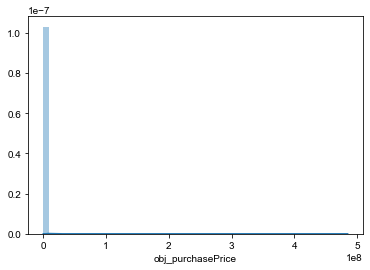

In [14]:
ax = sns.distplot(df_full['obj_purchasePrice'])
sns.set(rc={'figure.figsize':(10,10)})

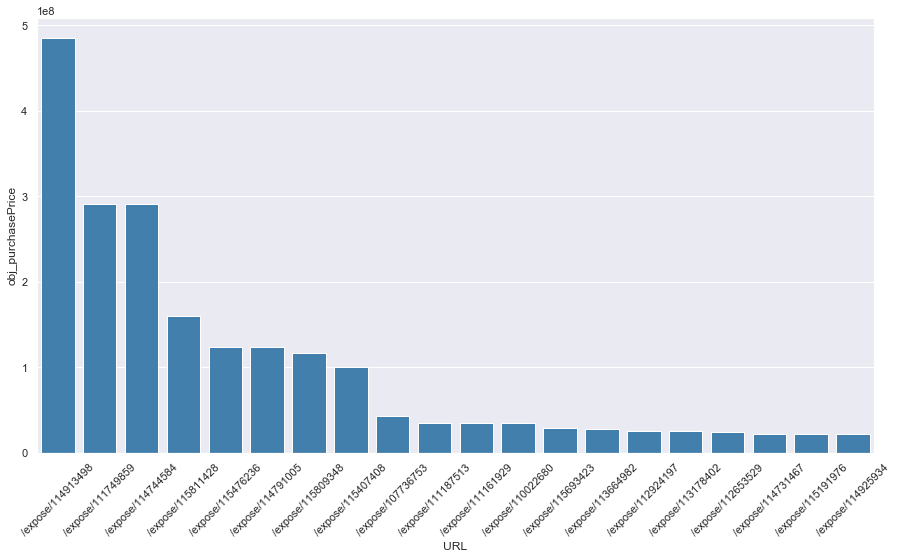

In [15]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
List_filtered = df_full.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")[:20]
ax= sns.barplot(x = 'URL', y = 'obj_purchasePrice', data=List_filtered, color = "#3182bd", ci=None)
ax.set(ylim=(0))
plt.show()

In [16]:
df_full.loc[df_full.URL == '/expose/114913498'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung            geo_bln  \
169945  ['BESTE QUALITÄT für einen unschlagbar GÜNSTIG...  Baden_Württemberg   

                   geo_krs  geo_plz  obj_cellar   obj_condition  \
169945  Freudenstadt_Kreis    72250        True  no_information   

                      URL obj_heatingType obj_interiorQual  obj_lastRefurbish  \
169945  /expose/114913498            None    sophisticated                nan   

        obj_livingSpace  obj_newlyConst  obj_noParkSpaces  obj_noRooms  \
169945           187.00            True               nan         4.50   

        obj_yearConstructed  obj_purchasePrice  
169945              2020.00       484900000.00

In [17]:
df_full.loc[df_full.URL == '/expose/111749859'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung            geo_bln  \
38472  ['DHH   mit Keller EINZUGSBEREIT  !\n\nDiese h...  Baden_Württemberg   

               geo_krs  geo_plz  obj_cellar   obj_condition  \
38472  Göppingen_Kreis    73098        True  first_time_use   

                     URL obj_heatingType obj_interiorQual  obj_lastRefurbish  \
38472  /expose/111749859       heat_pump           normal                nan   

       obj_livingSpace  obj_newlyConst  obj_noParkSpaces  obj_noRooms  \
38472           140.00            True              1.00         5.00   

       obj_yearConstructed  obj_purchasePrice  
38472              2019.00       290500000.00

In [18]:
df_full.loc[df_full.URL == '/expose/114744584'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung            geo_bln  \
158136  ['DHH   mit Keller EINZUGSBEREIT  !\n\nDiese h...  Baden_Württemberg   

                geo_krs  geo_plz  obj_cellar   obj_condition  \
158136  Göppingen_Kreis    73098        True  first_time_use   

                      URL obj_heatingType obj_interiorQual  obj_lastRefurbish  \
158136  /expose/114744584       heat_pump           normal                nan   

        obj_livingSpace  obj_newlyConst  obj_noParkSpaces  obj_noRooms  \
158136           140.00            True              1.00         5.00   

        obj_yearConstructed  obj_purchasePrice  
158136              2019.00       290500000.00

In [19]:
df_full.loc[df_full.URL == '/expose/114791005'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung        geo_bln  \
162360  ['* Bungalow, EFH, Einfamilienhaus, Immobilie,...  Niedersachsen   

           geo_krs  geo_plz  obj_cellar   obj_condition                URL  \
162360  Leer_Kreis    26817       False  no_information  /expose/114791005   

       obj_heatingType obj_interiorQual  obj_lastRefurbish  obj_livingSpace  \
162360            None   no_information                nan           167.00   

        obj_newlyConst  obj_noParkSpaces  obj_noRooms  obj_yearConstructed  \
162360           False               nan         5.00              1962.00   

        obj_purchasePrice  
162360       123456789.00

## ↑ There are houses with a very high price. This is an outlier and will be removed.

In [20]:
df_full.loc[df_full.URL == '/expose/107736753'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung geo_bln  \
54153  ['Vierseitgutshof in unvergleichlicher Weitbli...  Bayern   

                             geo_krs  geo_plz  obj_cellar   obj_condition  \
54153  Bad_Tölz_Wolfratshausen_Kreis    82541       False  no_information   

                     URL obj_heatingType obj_interiorQual  obj_lastRefurbish  \
54153  /expose/107736753            None   no_information                nan   

       obj_livingSpace  obj_newlyConst  obj_noParkSpaces  obj_noRooms  \
54153          3650.00           False               nan        32.00   

       obj_yearConstructed  obj_purchasePrice  
54153                  nan        42500000.00

In [21]:
df_full = df_full[df_full.URL != '/expose/114913498']
sum(df_full.URL=='/expose/114913498')

0

In [22]:
df_full = df_full[df_full.URL != '/expose/111749859']
sum(df_full.URL=='/expose/111749859')

0

In [23]:
df_full = df_full[df_full.URL != '/expose/114744584']
sum(df_full.URL=='/expose/114744584')

0

In [24]:
df_full = df_full[df_full.URL != '/expose/114791005']
sum(df_full.URL=='/expose/114791005')

0

In [25]:
sum(df_full.obj_purchasePrice==0)

480

In [26]:
df_full = df_full[df_full.obj_purchasePrice != 0]
sum(df_full.obj_purchasePrice==0)

0

## ↑ We remove the zero values as well.

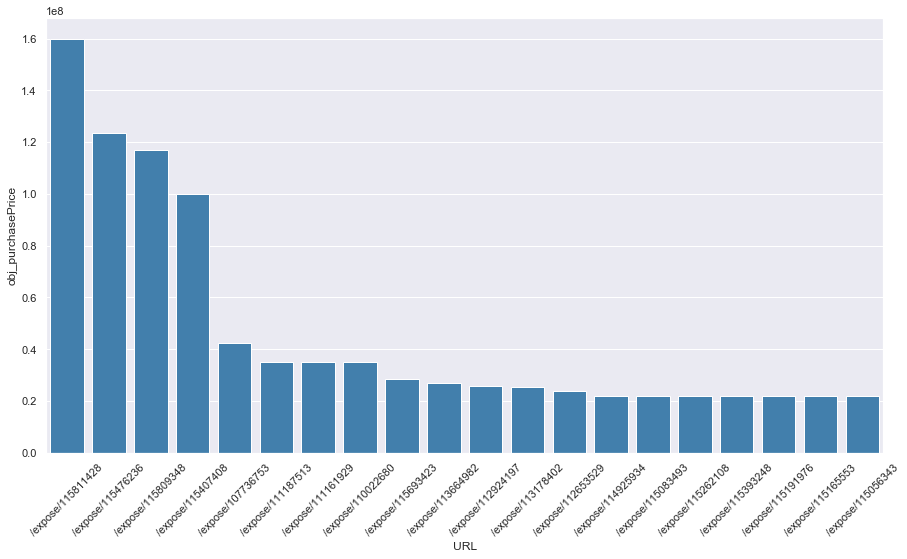

In [27]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
List_filtered = df_full.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")[:20]
ax= sns.barplot(x = 'URL', y = 'obj_purchasePrice', data=List_filtered, color = "#3182bd", ci=None)
ax.set(ylim=(0))
plt.show()

In [28]:
sum(df_full.obj_purchasePrice <= 10000)

933

## ↑ And the ones which are less than 10,000€

In [29]:
df_full.shape

(238004, 85)

In [30]:
df_full = df_full[df_full.obj_purchasePrice > 10000]
sum(df_full.obj_purchasePrice <= 10000)

0

In [31]:
sum(df_full.obj_livingSpace <= 20)

314

In [32]:
df_full = df_full[df_full.obj_livingSpace > 20]
sum(df_full.obj_livingSpace <= 20)

0

## ↑ And the ones which have less than 20 m² livingspace

In [33]:
sum(df_full['obj_lotArea'] <= 20)

1569

In [34]:
df_full = df_full[df_full['obj_lotArea'] > 20]
sum(df_full.obj_lotArea <= 20)

0

## ↑ And the ones which have less than 20 m² property size

In [35]:
df_full.shape

(235187, 85)

In [36]:
df_full['word_count'] = df_full['beschreibung'].apply(lambda x: len(str(x).split(" ")))
df_full[['word_count','beschreibung']].head()

word_count                                       beschreibung
0         249  ['Das im Jahr 1964 in massiver Bauweise erstel...
1         431  ['Man betritt das Haus über den Windfang mit a...
2         240  ['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3         382  ['Dieses hochwertige, teilunterkellerte Zweifa...
4         242  ['Nur einen Katzensprung von Neunkirchen entfe...

In [37]:
df_full['word_count_upper'] = df_full['beschreibung'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_full[['word_count_upper','beschreibung']].head()

word_count_upper                                       beschreibung
0                 5  ['Das im Jahr 1964 in massiver Bauweise erstel...
1                 1  ['Man betritt das Haus über den Windfang mit a...
2                 3  ['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3                 3  ['Dieses hochwertige, teilunterkellerte Zweifa...
4                 4  ['Nur einen Katzensprung von Neunkirchen entfe...

In [38]:
df_full['beschreibung_length'] = df_full['beschreibung'].str.len() ## this also includes spaces
df_full[['beschreibung_length','beschreibung']].head()

beschreibung_length                                       beschreibung
0                 1948  ['Das im Jahr 1964 in massiver Bauweise erstel...
1                 3166  ['Man betritt das Haus über den Windfang mit a...
2                 1838  ['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3                 3334  ['Dieses hochwertige, teilunterkellerte Zweifa...
4                 1930  ['Nur einen Katzensprung von Neunkirchen entfe...

In [39]:
df_full['price_per_m²_living'] = df_full['obj_purchasePrice'] / df_full['obj_livingSpace'] 
df_full['price_per_m²_living'] = df_full['price_per_m²_living'].replace(np.inf, np.nan)
df_full['price_per_m²_property'] = df_full['obj_purchasePrice'] / df_full['obj_lotArea'] 
df_full['price_per_m²_property'] = df_full['price_per_m²_property'].replace(np.inf, np.nan)

## ↑ Above we added some features: Word count, word count upper, length of text, price per m² living and property

In [40]:
df_full.obj_zipCode = df_full.obj_zipCode.astype(str)
df_full.geo_plz = df_full.geo_plz.astype(str)
df_full.obj_cId = df_full.obj_cId.astype(str)
df_full.obj_scoutId = df_full.obj_scoutId.astype(str)

In [41]:
#Taken from https://www.suche-postleitzahl.org/download_v1/data/plz-5stellig-daten.xls - 17th of November 2019
plz = pd.ExcelFile("plz-5stellig-daten.xlsx").parse(0)
plz.plz = plz.plz.astype(int)
plz.plz = plz.plz.astype(str)
df_full = df_full.merge(plz[["plz","qkm","einwohner"]],left_on="geo_plz",right_on="plz",how="left")
df_full["bev_pro_km2"] = df_full.einwohner/df_full.qkm

In [42]:
#Taken from www.fa-technik.adfc.de/code/opengeodb/DE.tab - 17th of November 2019
geo = pd.read_csv("DE.tab",sep="\t")
geo_split = pd.concat([geo.lat,geo.lon,geo.plz.str.split(",",expand=True)],axis=1)
geo_split_melt = geo_split.melt(id_vars=["lat","lon"],value_name="plz").drop("variable",axis=1)
geo_split_melt = geo_split_melt.loc[geo_split_melt.plz.isnull()==0]
geo_split_melt = geo_split_melt.loc[geo_split_melt.plz!=""]
geo_split_melt.plz = geo_split_melt.plz.astype(int)
geo_split_melt.plz = geo_split_melt.plz.astype(str)
geo_split_melt_grouped = geo_split_melt.groupby("plz").agg({"lat":["mean"],"lon":["mean"]}).reset_index()
geo_split_melt_grouped.columns = geo_split_melt_grouped.columns.get_level_values(0)
df_full = df_full.merge(geo_split_melt_grouped[["plz","lat","lon"]],left_on="geo_plz",right_on="plz",how="left")

## ↑ We added the PLZ and Lat lon data. Also we added the amount of capita per km²

In [43]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.astype(str)
df_full.obj_telekomDownloadSpeed = df_full.obj_telekomDownloadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomHybridDownloadSpeed = df_full.obj_telekomHybridDownloadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomHybridUploadSpeed = df_full.obj_telekomHybridUploadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomUploadSpeed = df_full.obj_telekomUploadSpeed.str.replace(" MBit/s","").str.replace(",",".").astype(float)
df_full.obj_telekomInternet = df_full.obj_telekomInternet.str.replace(" MBit/s","").str.replace(" kBit/s","")
df_full.obj_telekomInternet = df_full.obj_telekomInternet.astype(float)
df_full.obj_telekomHdTelephone = (df_full.obj_telekomHdTelephone*1).fillna(0)
df_full.obj_telekomInternetProductAvailable = (df_full.obj_telekomInternetProductAvailable*1).fillna(0)

In [44]:
df_full.drop(columns =["plz_x"], inplace = True) 
df_full.drop(columns =["plz_y"], inplace = True) 

In [45]:
df_full['obj_firingTypes'] = df_full['obj_firingTypes'].str.split(":", n = 1, expand = True)[0]

## ↑ Some more information for example internet speed and firing types fixed.

In [46]:
df_full_article = df_full[['obj_constructionPhase','geo_bln','Generated_index','obj_purchasePrice']]
df_full_article.info(verbose=True)
df_full_article.to_csv('df_full.CSV',sep=',')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235187 entries, 0 to 235186
Data columns (total 4 columns):
obj_constructionPhase    235187 non-null object
geo_bln                  235187 non-null object
Generated_index          235187 non-null int64
obj_purchasePrice        235187 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.0+ MB


# Exploratory Data Analysis

## Location

In [47]:
grouped = df_full.groupby('geo_bln').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_bln').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_bln','URL']], left_on='geo_bln', right_on='geo_bln')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

geo_bln  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0      Nordrhein_Westfalen          446608.28           203.52      1275.62   
1                   Bayern          699899.95           211.35      1224.77   
2            Niedersachsen          336892.83           197.62      2203.12   
3        Baden_Württemberg          580316.80           196.21      1039.73   
4          Rheinland_Pfalz          324853.09           255.04      1132.04   
5                   Hessen          566302.84           217.33       897.98   
6                  Sachsen          330964.69           235.98      1451.62   
7              Brandenburg          409984.12           186.46      2262.10   
8       Schleswig_Holstein          472913.83           169.15      2111.76   
9           Sachsen_Anhalt          206256.54           198.02      1614.35   
10  Mecklenburg_Vorpommern          298971.06           195.97      2797.75   
11                  Berlin         1116792.69           236.58       914.80   
12               Thüringen          226406.44           203.20      1159.07   
13                Saarland          247506.90           185.94       910.44   
14                 Hamburg         1034071.86           184.72       822.11   
15                  Bremen          358403.45           166.67       513.86   

    obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0               2.33         6.73                2.20             13.50   
1               4.22         6.38                2.37             14.16   
2               2.31         6.42                1.97             13.55   
3               2.46         6.91                2.50             14.15   
4               2.58         6.38                2.19             13.77   
5               2.47         6.96                2.37             13.10   
6               2.81         7.81                2.15             11.79   
7               2.52         6.06                1.97             11.87   
8               2.21         5.77                1.98             14.78   
9               2.79         6.80                1.97             11.71   
10              2.67         6.44                1.87             13.01   
11              1.70         7.19                2.32             10.49   
12              2.57         7.40                2.12             11.11   
13             12.19         6.39                2.19             12.88   
14              4.63         5.92                2.27             12.34   
15              1.60         5.86                2.43             14.13   

    obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                 4.29           156.38  ...            2011.07   
1                 3.87           136.47  ...            2010.50   
2                 3.96           156.20  ...            2010.21   
3                 4.36           153.04  ...            2009.46   
4                 3.73           153.30  ...            2009.88   
5                 3.15           157.19  ...            2009.82   
6                 5.02           141.46  ...            2005.69   
7                 7.00           139.06  ...            2009.74   
8                 4.87           152.44  ...            2011.14   
9                 1.96           154.89  ...            2007.47   
10                3.51           139.89  ...            2008.52   
11                7.24           135.03  ...            2011.70   
12               -0.03           127.86  ...            2006.13   
13               -2.05           177.97  ...            2008.37   
14                3.77           147.35  ...            2008.62   
15                1.41           172.00  ...            2010.14   

    obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0               1968.07      360.01              4.73              2841.78   
1               1978.76      354.98              5.40              2821.82   
2               1969.20  

## ↑ A first glance at the data. Berlin and Hamburg have the most expensive houses, Sachsen-Anhalt and Thüringen the cheapest.

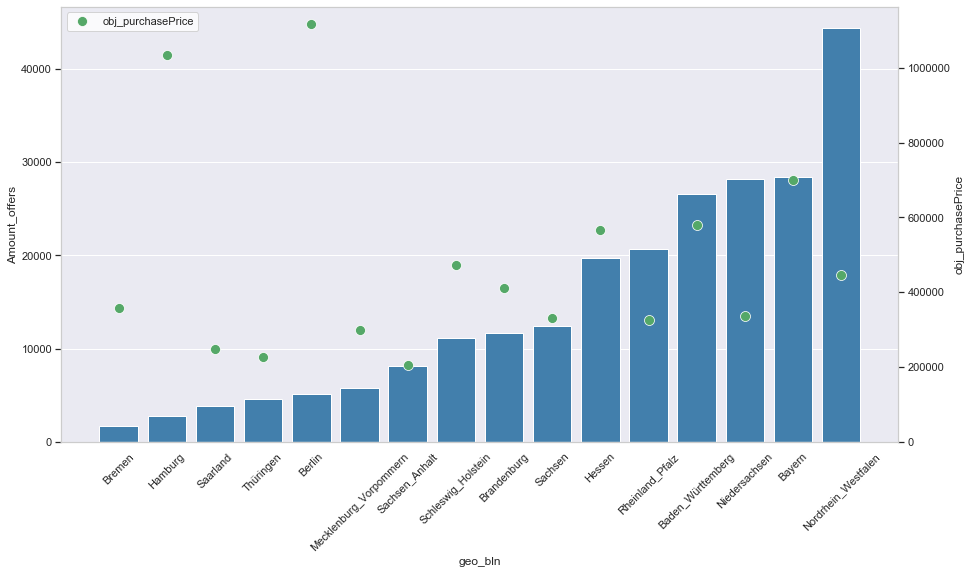

In [48]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('Amount_offers')
ax= sns.barplot(x = 'geo_bln', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Amount of offers and average price
Nordrhein Westfalen has the most offers in the database. Bremen has the fewest. Looking at average price and amount of offers shows that Bavaria is the highest. 

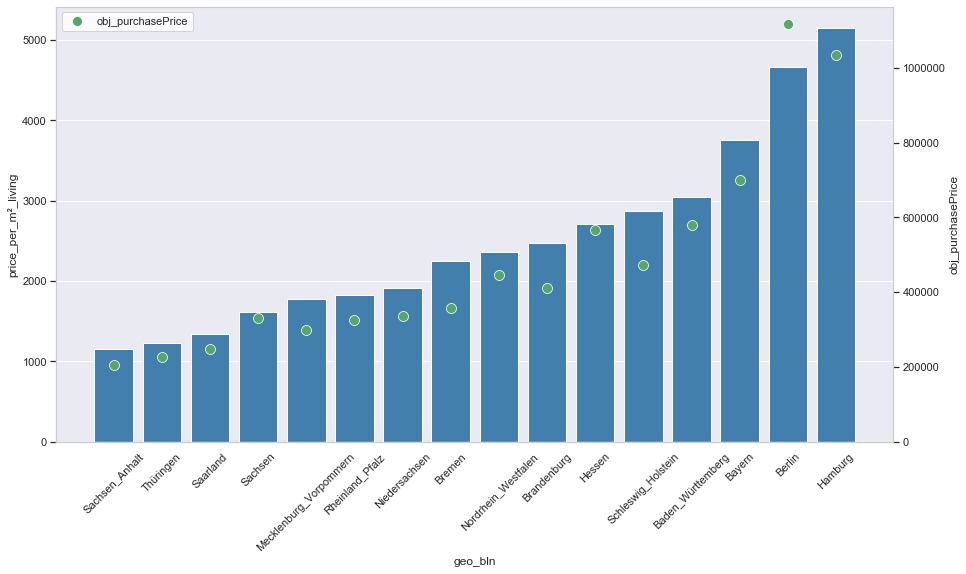

In [49]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Price per living m² and average price

Hamburg has the highest price per m². Lowest county is Sachsen-Anhalt with 1,100 per m² and an average price of 206 KEUR.

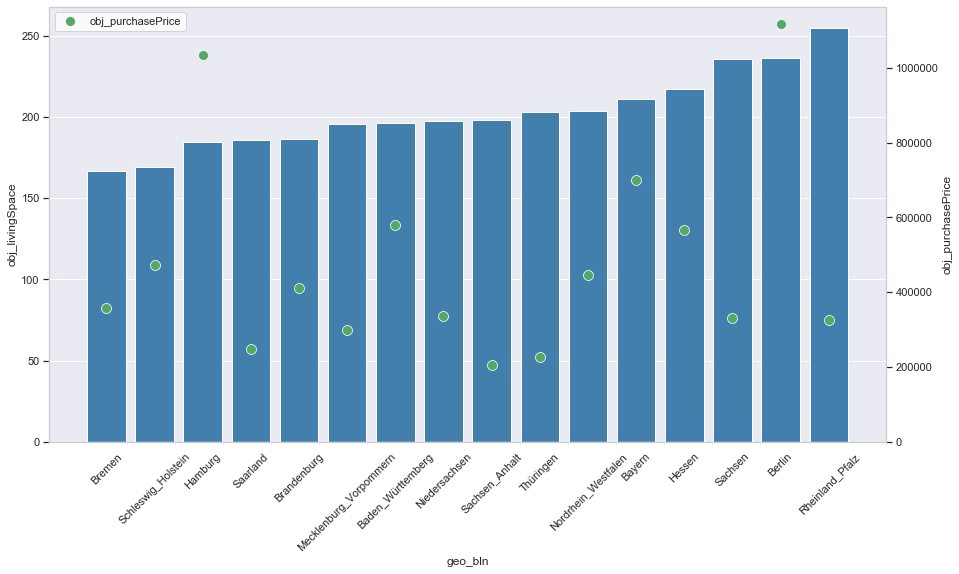

In [50]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_livingSpace')
ax= sns.barplot(x = 'geo_bln', y = 'obj_livingSpace',  label='obj_livingSpace', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Living space and average price

Rheinland Pfalz has the biggest houses, Bremen the smallest.

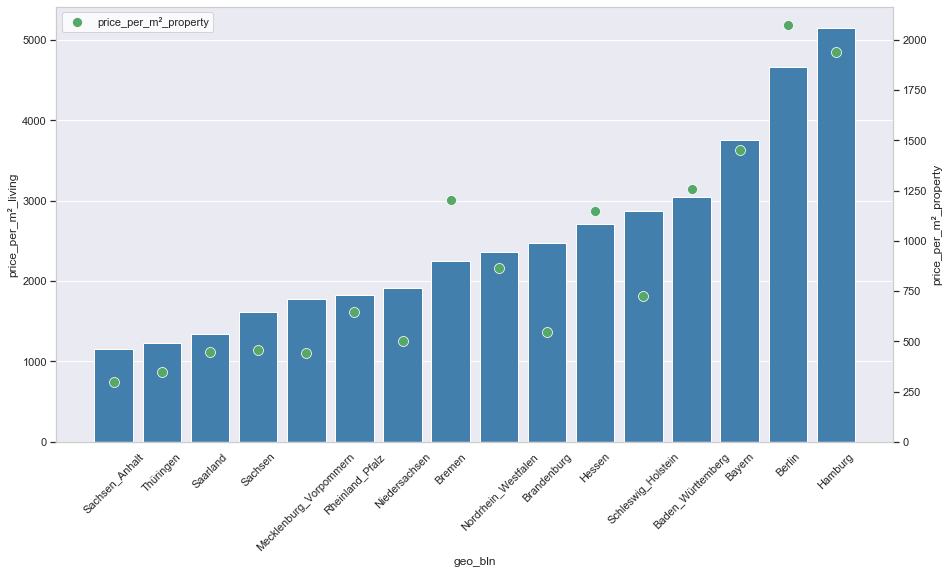

In [51]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'price_per_m²_property', marker="o",  label='price_per_m²_property', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Price per m² living and price per m² property

Hamburg and Berlin are the most expensive cities. Sachsen-Anhalt and Thüringen are the cheapest.

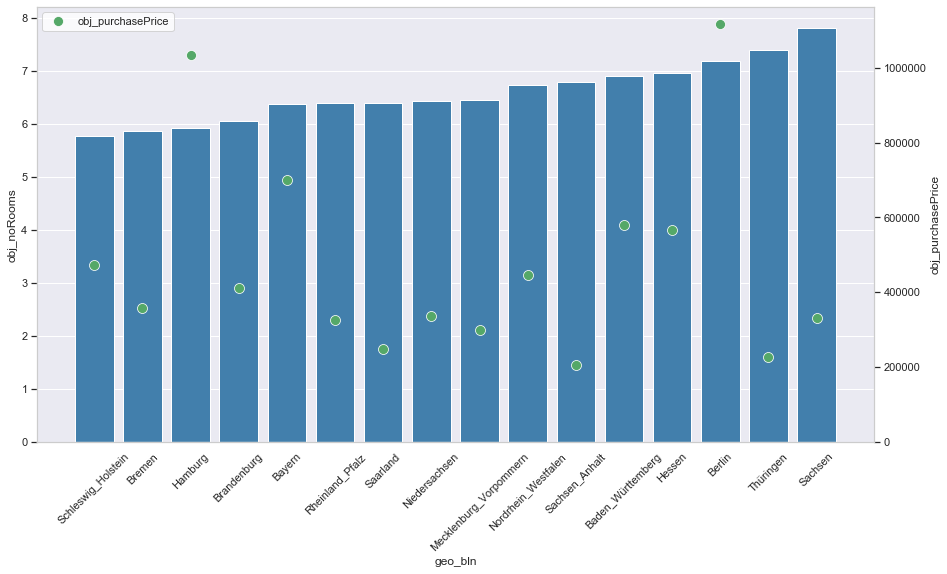

In [52]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_noRooms')
ax= sns.barplot(x = 'geo_bln', y = 'obj_noRooms',  label='obj_noRooms', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average number of rooms and average price

In Sachsen you get most rooms for your money. Schleswig Holstein has the smallest amount of rooms per house.

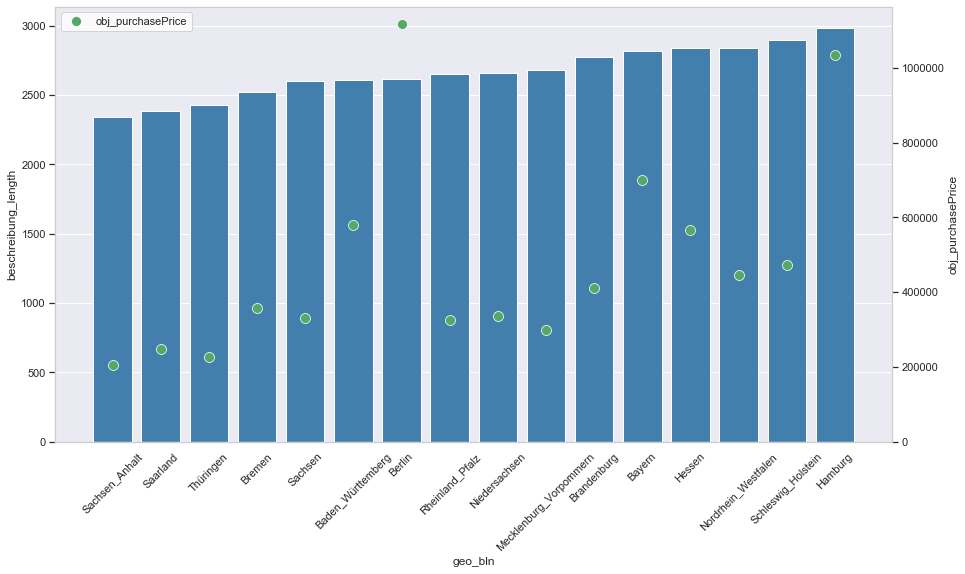

In [53]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('beschreibung_length')
ax= sns.barplot(x = 'geo_bln', y = 'beschreibung_length',  label='beschreibung_length', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average length of description text and average price

People in Hamburg seem to write the longest texts. Berlin is in the upper half. Sachsen-Anhalt has the shortest texts per Expose.

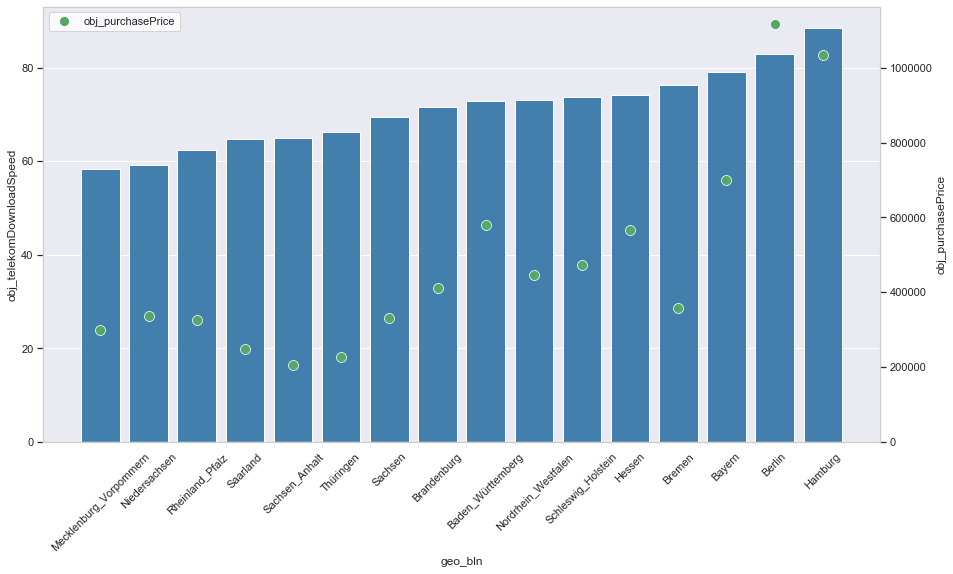

In [54]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_telekomDownloadSpeed')
ax= sns.barplot(x = 'geo_bln', y = 'obj_telekomDownloadSpeed',  label='obj_telekomDownloadSpeed', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average download speed and average price

Fastest internet is being offered in Hamburg and Berlin. Mecklenburg-Vorpommern and Niedersachsen have the slowest.

In [55]:
grouped = df_full.groupby('geo_krs').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_krs').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_krs','URL']], left_on='geo_krs', right_on='geo_krs')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")
grouped.head(10)

geo_krs  obj_purchasePrice  obj_livingSpace  \
0                        München         2012476.68           195.92   
1              Frankfurt_am_Main         1875913.64           322.94   
2                  München_Kreis         1746894.94           195.18   
3                Starnberg_Kreis         1717894.12           206.89   
4                 Miesbach_Kreis         1715992.07           234.50   
5                     Heidelberg         1714709.37           287.14   
6  Bad_Tölz_Wolfratshausen_Kreis         1544541.64           223.48   
7                    Baden_Baden         1443460.07           283.76   
8   Garmisch_Partenkirchen_Kreis         1362115.46           284.84   
9                     Düsseldorf         1309243.13           280.36   

   obj_lotArea  obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  \
0       417.93              1.50         6.39                2.78   
1       504.17              2.44        10.90                2.94   
2       537.60              1.86         5.89                2.58   
3      1444.48             46.88         6.03                2.66   
4      1899.88              2.72         7.33                2.48   
5       672.42              2.35         9.86                3.01   
6      1183.96              2.20         6.50                2.57   
7      1378.88              2.52         7.88                2.78   
8      1199.19              3.01         8.63                2.44   
9       855.10              2.14         8.80                2.42   

   obj_picturecount  obj_pricetrendrent  obj_thermalChar  ...  \
0             11.83                4.06           112.17  ...   
1             10.68                3.47           163.32  ...   
2             13.87                4.42           114.81  ...   
3             12.53                3.44           101.12  ...   
4             11.81                4.16           132.45  ...   
5             14.11               17.53           150.69  ...   
6             14.97                2.78           117.92  ...   
7             13.59                8.53           112.03  ...   
8             14.96                1.08           148.03  ...   
9             11.55                5.27           160.91  ...   

   obj_lastRefurbish  obj_yearConstructed  word_count  word_count_upper  \
0            2010.57              1989.99      401.31              5.96   
1            2010.09              1960.30      380.10              5.43   
2            2012.79              1994.30      446.13              6.31   
3            2012.70              1996.80      417.62              6.40   
4            2011.10              1979.71      327.01              4.45   
5            2009.16              1948.39      376.05              4.28   
6            2010.93              1983.93      388.23              4.20   
7            2010.59              1959.37      335.73              3.49   
8            2009.12              1963.66      423.71              4.77   
9            2011.79              1961.00      350.75              6.20   

   beschreibung_length  price_per_m²_living  price_per_m²_property  \
0              3165.98             10094.67                6112.06   
1              2951.77              5868.33                4495.18   
2              3517.26              8380.77                3542.92   
3              3313.20              8106.93                3147.67   
4              2515.50              7036.56                2257.52   
5              2909.71              5841.88                3718.78   
6              3020.95              6479.83                2218.49   
7              2669.96              4626.01                1941.26   
8              3285.61              5481.34                1871.31   
9              2749.90              4783.95                2987.81   

   obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                     89.47      4129.83           1404  
1                     87.51      3524.61   

## ↑ The most expensive 10 places in Germany to live

Munich, Frankfurt (Main) and the area around Munich are the most expensive with an average price of 1.8 MEUR. 

In [56]:
grouped = df_full.groupby('geo_krs').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_krs').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_krs','URL']], left_on='geo_krs', right_on='geo_krs')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=True).reset_index(drop="True")
grouped.head(10)

geo_krs  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0     Mansfeld_Südharz_Kreis           93536.57           150.69      1929.52   
1            Kyffhäuserkreis          122919.89           256.54       759.75   
2              Salzlandkreis          130303.15           189.18      1046.61   
3           Holzminden_Kreis          131330.18           216.55       970.59   
4      Unstrut_Hainich_Kreis          132157.97           165.05      1112.21   
5            Sonneberg_Kreis          141723.85           159.36      1288.08   
6    Anhalt_Bitterfeld_Kreis          153160.36           162.09      1198.47   
7  Saalfeld_Rudolstadt_Kreis          154919.00           206.39       948.31   
8           Saale_Orla_Kreis          159140.51           178.86       924.45   
9        Uecker_Randow_Kreis          160264.65           190.22      3420.37   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              1.87         5.57                1.85              9.97   
1              2.09         7.61                2.00              7.31   
2              3.65         6.52                1.94              9.06   
3              2.14         8.24                1.91             12.08   
4              2.58         5.86                1.99             11.17   
5              2.68         6.03                2.40             10.32   
6              2.79         5.59                1.88             11.54   
7              3.08         6.99                1.89              7.57   
8              2.00         5.97                1.64              8.93   
9              2.57         6.10                1.79             12.82   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                1.69           211.16  ...            2007.06   
1                2.66           164.47  ...            2004.87   
2                3.56           191.75  ...            2006.89   
3               -5.01           214.04  ...            2010.65   
4               -6.29           118.89  ...            2006.05   
5                0.78           134.95  ...            2006.23   
6                6.89           157.67  ...            2007.32   
7              -15.25           123.14  ...            2006.75   
8              -16.40           149.44  ...            2007.71   
9                8.43           188.18  ...            2006.47   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1929.87      222.22              3.75              1780.23   
1              1922.21      243.37              6.84              2001.62   
2              1932.79      267.71              3.78              2124.16   
3              1936.47      299.56              4.92              2386.48   
4              1936.09      286.20              3.59              2295.02   
5              1941.57      331.75              5.47              2601.31   
6              1949.15      280.10              3.31              2256.11   
7              1935.71      279.15              3.54              2277.87   
8              1939.98      265.28              3.52              2121.02   
9              1937.46      366.67              4.69              2813.67   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0               658.69                 145.62                     66.61   
1               568.06                 162.38                     56.64   
2               793.85                 215.93                     51.80   
3               766.95                 190.98                     67.75   
4               841.92                 244.64                     36.86   
5               930.20                 212.68                     85.51   
6              1015.43                 217.11                     62.62   
7               834.57                 211.95                     47.36   
8               942.01                 254.15                   

## ↑ The least expensive 10 places in Germany to live

Kyffhäuserkreis, Südharz and Salzlandkreis. In Kyffhäuserkreis you get a house for an average of 94 KEUR. That is 5% of the average price in Munich!

## Condition

In [57]:
grouped = df_full.groupby('obj_buildingType').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_buildingType').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_buildingType','URL']], left_on='obj_buildingType', right_on='obj_buildingType')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_buildingType  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0   single_family_house          435171.13           168.97      1097.65   
1     other_real_estate          294078.96           211.55      2358.37   
2    multi_family_house          662134.58           363.99      1101.88   
3    semidetached_house          457439.61           139.36       473.38   
4        no_information          536697.47           316.72      1681.34   
5     mid_terrace_house          376445.75           131.22       312.05   
6              bungalow          374085.69           129.84       946.68   
7     end_terrace_house          441543.78           135.42       366.53   
8                 villa         1476945.15           317.22      3018.07   
9   special_real_estate          782402.76           324.96      5158.11   
10            farmhouse          398525.94           224.80     11048.86   
11   castle_manor_house         1885463.93          1168.13     29543.93   

    obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0               2.32         5.62                2.02             15.43   
1               3.12         6.58                2.20              3.69   
2               3.82        11.97                2.68             15.25   
3               1.71         5.02                2.35             13.87   
4               2.91         7.27                2.31             14.23   
5               1.51         4.94                2.58             14.59   
6               1.90         4.30                1.15             14.22   
7               5.29         5.07                2.55             14.73   
8              10.96         8.53                2.43             15.56   
9               4.57         9.08                2.35             17.58   
10              3.70         7.74                2.11             17.44   
11             12.80        20.93                2.89             16.81   

    obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                 4.16           150.36  ...            2010.00   
1                 3.83           170.23  ...            2007.11   
2                 3.86           166.54  ...            2008.68   
3                 4.17           134.80  ...            2010.71   
4                 4.08           153.16  ...            2010.36   
5                 4.14           135.15  ...            2011.19   
6                 4.34           138.62  ...            2011.03   
7                 4.10           145.86  ...            2011.24   
8                 4.13           126.85  ...            2011.01   
9                 4.27           163.94  ...            2009.98   
10                3.94           224.23  ...            2005.49   
11                4.97           135.04  ...            2006.56   

    obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0               1977.46      373.77              4.44              2950.69   
1               1946.91      234.73              5.56              1943.09   
2               1947.69      346.00              4.65              2674.89   
3               1984.27      359.76              4.37              2823.55   
4               1963.62      339.99              4.22              2664.26   
5               1974.28      346.13              4.18              2675.08   
6               1993.19      373.92              4.00              2970.85   
7               1980.17      354.63              4.32              2756.51   
8               1969.17      446.21              5.16              3515.83   
9               1931.27      355.09              5.15              2749.42   
10              1892.83      329.13              4.17              2495.81   
11              1760.23      389.94              4.93              3026.58   

    price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0               2612.50                 670.95                     68.74   
1  

## ↑ Houses by type

Most houses are single_family_house, followed by other real estate and multi_family_house

In [58]:
grouped = df_full.groupby(['obj_buildingType','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_buildingType','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_buildingType','geo_bln'], right_on=['obj_buildingType','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_buildingType','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_buildingType', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_buildingType        bungalow  castle_manor_house  end_terrace_house  \
geo_bln                                                                   
Baden_Württemberg         438.00               13.00             898.00   
Bayern                    621.00               11.00            1182.00   
Berlin                    169.00                0.00             141.00   
Brandenburg               656.00               12.00              96.00   
Bremen                     23.00                0.00             158.00   
Hamburg                    55.00                0.00             157.00   
Hessen                    533.00                6.00             586.00   
Mecklenburg_Vorpommern    311.00               19.00             120.00   
Niedersachsen            1416.00                3.00             644.00   
Nordrhein_Westfalen      1367.00               17.00            1470.00   
Rheinland_Pfalz           788.00                6.00             369.00   
Saarland                  103.00                0.00              96.00   
Sachsen                   389.00               17.00             216.00   
Sachsen_Anhalt            288.00               15.00             117.00   
Schleswig_Holstein        518.00                4.00             405.00   
Thüringen                 154.00                1.00              55.00   

obj_buildingType        farmhouse  mid_terrace_house  multi_family_house  \
geo_bln                                                                    
Baden_Württemberg          317.00            1186.00             4276.00   
Bayern                     373.00            1487.00             3277.00   
Berlin                       2.00             344.00              488.00   
Brandenburg                170.00             225.00             1029.00   
Bremen                       1.00             436.00              216.00   
Hamburg                      0.00             351.00              154.00   
Hessen                     165.00             822.00             2726.00   
Mecklenburg_Vorpommern     115.00             206.00              603.00   
Niedersachsen              394.00            1038.00             3051.00   
Nordrhein_Westfalen        383.00            2440.00             5988.00   
Rheinland_Pfalz            350.00             579.00             2428.00   
Saarland                    41.00             168.00              571.00   
Sachsen                    169.00             413.00             1943.00   
Sachsen_Anhalt             185.00             315.00              974.00   
Schleswig_Holstein         135.00             657.00              829.00   
Thüringen                   64.00              93.00              517.00   

obj_buildingType        no_information  other_real_estate  semidetached_house  \
geo_bln                                                                         
Baden_Württemberg              1576.00            2632.00             3420.00   
Bayern                         1657.00            3001.00             4590.00   
Berlin                          304.00             431.00              748.00   
Brandenburg                    1064.00            1417.00              859.00   
Bremen                           79.00             108.00              179.00   
Hamburg                         110.00             300.00              467.00   
Hessen                         1321.00            3323.00             1748.00   
Mecklenburg_Vorpommern          379.00            1072.00              623.00   
Niedersachsen                  1461.00            4639.00             2445.00   
Nordrhein_Westfalen            2335.00            8251.00             5261.00   
Rheinland_Pfalz                1164.00            3572.00             1242.00   
Saarland                        346.00             799.00              229.00   
Sachsen                         429.00            1932.00              664.00   
Sachsen_Anhalt                  293.00            2141.00        

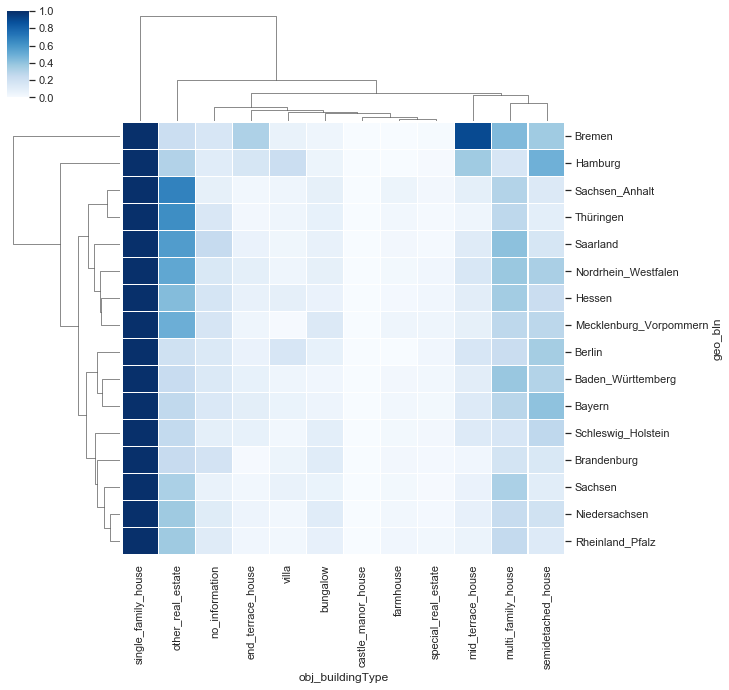

In [59]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, method="average")

## ↑ Clustermap: Amount of houses by Region and type

## That is a new chart. It does the following: 
        -Scale the data by row (standard_scale=1) or column (standard_scale=0) to 0-1
        -Show the data as map - the higher, the darker
        -Cluster the data by column and row

Looking on the chart we see that:

         -Most of the houses are single family house
         -Bremen has the highest proportion of mid terrace houses
         
The chart will be used more frequently in the analysis

If you want to know more about this chart and its possibilities, please have a look at my article: https://blog.tdwi.eu/hierarchical-clustering-in-python/

In [60]:
grouped = df_full.groupby(['obj_buildingType','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_buildingType', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_buildingType        bungalow  castle_manor_house  end_terrace_house  \
geo_bln                                                                   
Baden_Württemberg      586792.73          2187538.46          495819.99   
Bayern                 485832.86          2037045.45          717582.20   
Berlin                 637867.09                0.00          637363.83   
Brandenburg            280627.74          1288333.33          371232.46   
Bremen                 418239.57                0.00          334706.60   
Hamburg                817346.42                0.00          549981.75   
Hessen                 462630.86          1065000.00          511274.54   
Mecklenburg_Vorpommern 227523.64          1715842.11          230137.50   
Niedersachsen          312981.43          1149666.67          302637.16   
Nordrhein_Westfalen    422587.72          2525470.59          353279.69   
Rheinland_Pfalz        330715.93          1914337.83          295347.75   
Saarland               288316.01                0.00          177611.04   
Sachsen                251343.65           859176.47          267361.68   
Sachsen_Anhalt         221850.38          3185800.00          130768.07   
Schleswig_Holstein     385996.91          1957500.00          387125.46   
Thüringen              217016.89           410000.00          132367.84   

obj_buildingType        farmhouse  mid_terrace_house  multi_family_house  \
geo_bln                                                                    
Baden_Württemberg       429461.42          444204.70           781287.11   
Bayern                  784734.72          601508.23           844971.69   
Berlin                 3775000.00          606634.09          2768861.21   
Brandenburg             293047.35          315050.03           651685.77   
Bremen                  399000.00          292615.33           502190.00   
Hamburg                      0.00          497748.39          1434846.92   
Hessen                  249618.42          471495.70           742998.50   
Mecklenburg_Vorpommern  334546.09          191603.11           456002.85   
Niedersachsen           324212.89          274019.35           461981.04   
Nordrhein_Westfalen     496315.74          315036.21           600688.94   
Rheinland_Pfalz         248602.09          283677.40           457467.46   
Saarland                216024.39          153657.74           314944.96   
Sachsen                 165263.91          237841.31           604797.51   
Sachsen_Anhalt          225278.91          125860.67           308956.75   
Schleswig_Holstein      590047.41          345261.98           622908.33   
Thüringen               189796.11          134331.94           381922.26   

obj_buildingType        no_information  other_real_estate  semidetached_house  \
geo_bln                                                                         
Baden_Württemberg            613291.11          445347.77           480850.72   
Bayern                       650491.04          496982.81           729514.12   
Berlin                       980457.46         1080256.86           560825.93   
Brandenburg                  416624.62          221587.09           345352.59   
Bremen                       421908.86          251467.59           266262.08   
Hamburg                     1511081.82          899186.38           601870.24   
Hessen                       758475.94          355413.59           526340.57   
Mecklenburg_Vorpommern       396445.56          167951.43           245107.58   
Niedersachsen                432168.51          210200.97           285140.99   
Nordrhein_Westfalen          537927.36          311481.98           372800.91   
Rheinland_Pfalz              355813.48          193525.65           344185.17   
Saarland                     239997.50          164452.27           202604.24   
Sachsen                      341776.71          185834.51           269737.81   
Sachsen_Anhalt               267433.32           94321.12        

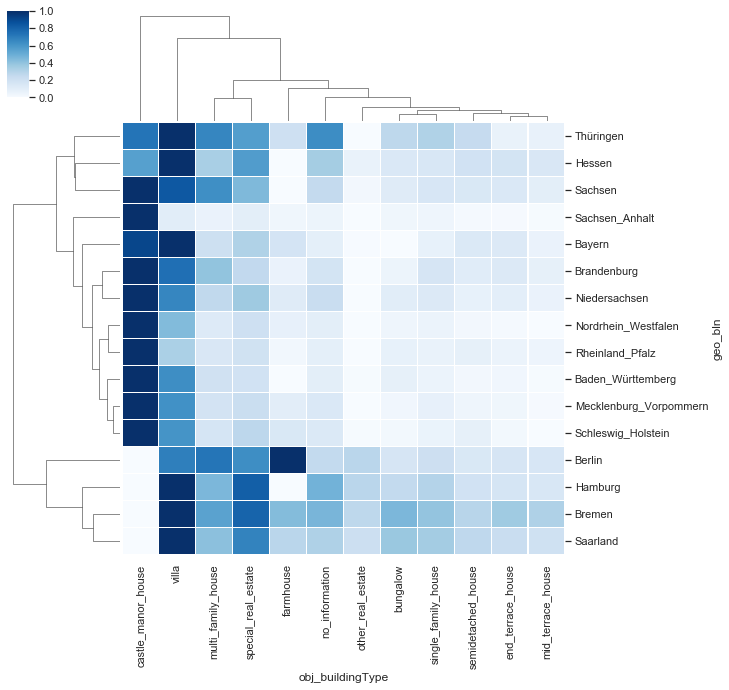

In [61]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average prices of houses by Region and type

## The same chart as before just with average prices

We see that the castles are the most expensives. Also Villa types stand out. Rheinland Pfalz and Sachsen Anhalt seem to be on the lower scale in terms of pricing. 

In [62]:
grouped = df_full.groupby('obj_condition').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_condition').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_condition','URL']], left_on='obj_condition', right_on='obj_condition')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_condition  obj_purchasePrice  obj_livingSpace  \
0                       no_information          406445.26           214.85   
1                            well_kept          512807.94           207.65   
2                       first_time_use          494484.02           158.24   
3                   need_of_renovation          320349.73           207.93   
4                       mint_condition          781088.23           203.09   
5                           modernized          577839.97           247.66   
6                          refurbished          690270.63           269.34   
7                      fully_renovated          586305.96           221.86   
8   first_time_use_after_refurbishment          792967.40           231.88   
9                           negotiable          501436.21           223.17   
10                 ripe_for_demolition          259111.37           165.96   

    obj_lotArea  obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  \
0       1766.28              4.08         6.55                2.12   
1       1286.14              2.59         7.15                2.30   
2        652.55              2.17         5.17                2.05   
3       1320.22              2.25         7.11                2.26   
4       1231.53              2.46         6.12                2.23   
5       1297.18              2.63         7.56                2.40   
6       1778.64              2.87         8.99                2.47   
7       1822.46              2.85         7.63                2.33   
8       1082.48              2.46         7.80                2.44   
9       1211.63              2.71         7.84                2.13   
10      2038.45              2.08         5.65                1.90   

    obj_picturecount  obj_pricetrendrent  obj_thermalChar  ...  \
0               9.65                3.99           168.22  ...   
1              17.72                4.15           158.13  ...   
2              12.63                4.34            32.79  ...   
3              15.03                3.84           240.14  ...   
4              17.85                4.28            76.14  ...   
5              18.40                3.96           156.49  ...   
6              17.59                4.05           153.40  ...   
7              17.74                3.86           155.73  ...   
8              17.52                4.11           133.68  ...   
9              15.00                3.95           177.42  ...   
10             10.07                4.74           307.60  ...   

    obj_lastRefurbish  obj_yearConstructed  word_count  word_count_upper  \
0             2006.53              1960.43      297.58              4.59   
1             2010.20              1965.37      373.87              4.42   
2             2019.03              2019.26      413.71              5.43   
3             2000.96              1935.24      321.15              3.51   
4             2014.43              1999.88      414.84              5.11   
5             2012.95              1953.08      389.71              4.80   
6             2012.31              1932.10      374.25              4.42   
7             2013.06              1944.81      353.62              3.93   
8             2016.49              1947.77      367.24              3.75   
9             2008.68              1963.54      363.72              5.39   
10            1986.31              1921.78      255.86              2.98   

    beschreibung_length  price_per_m²_living  price_per_m²_property  \
0               2385.14              2183.05                 718.16   
1               2863.27              2611.51                 950.89   
2               3378.99              3139.49                1156.69   
3               2457.46              1918.89                 605.60   
4               3245.42              3752.74                1420.61   
5               3002.65              2687.85                1043.38   
6               2889.41              2633.16

In [63]:
grouped = df_full.groupby(['obj_condition','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_condition','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_condition','geo_bln'], right_on=['obj_condition','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_condition','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_condition', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_condition           first_time_use  first_time_use_after_refurbishment  \
geo_bln                                                                      
Baden_Württemberg              3446.00                              105.00   
Bayern                         5350.00                              125.00   
Berlin                          556.00                               39.00   
Brandenburg                    1894.00                               24.00   
Bremen                          129.00                               16.00   
Hamburg                         394.00                               17.00   
Hessen                         2377.00                               60.00   
Mecklenburg_Vorpommern          547.00                               18.00   
Niedersachsen                  2755.00                               80.00   
Nordrhein_Westfalen            5400.00                              177.00   
Rheinland_Pfalz                3551.00                               56.00   
Saarland                        266.00                               15.00   
Sachsen                        2423.00                              103.00   
Sachsen_Anhalt                 1368.00                               18.00   
Schleswig_Holstein             1248.00                               21.00   
Thüringen                       661.00                                9.00   

obj_condition           fully_renovated  mint_condition  modernized  \
geo_bln                                                               
Baden_Württemberg                568.00         1435.00     1194.00   
Bayern                           529.00         1824.00     1086.00   
Berlin                           100.00          345.00      236.00   
Brandenburg                      122.00          607.00      329.00   
Bremen                            32.00           79.00       86.00   
Hamburg                           29.00          211.00      181.00   
Hessen                           328.00         1117.00      986.00   
Mecklenburg_Vorpommern            85.00          360.00      201.00   
Niedersachsen                    442.00         1539.00     1215.00   
Nordrhein_Westfalen              704.00         2062.00     2280.00   
Rheinland_Pfalz                  338.00          822.00      764.00   
Saarland                         107.00          114.00      145.00   
Sachsen                          163.00          447.00      324.00   
Sachsen_Anhalt                   112.00          243.00      285.00   
Schleswig_Holstein               207.00          679.00      601.00   
Thüringen                         43.00          115.00      128.00   

obj_condition           need_of_renovation  negotiable  no_information  \
geo_bln                                                                  
Baden_Württemberg                  2216.00      178.00        10819.00   
Bayern                             1836.00      106.00        10657.00   
Berlin                              312.00       14.00         2254.00   
Brandenburg                         600.00       44.00         5699.00   
Bremen                              140.00        1.00          718.00   
Hamburg                             151.00        9.00         1168.00   
Hessen                             1528.00       73.00         8341.00   
Mecklenburg_Vorpommern              415.00       18.00         2626.00   
Niedersachsen                      1929.00       71.00        12551.00   
Nordrhein_Westfalen                3070.00      166.00        19490.00   
Rheinland_Pfalz                    1652.00       61.00         8803.00   
Saarland                            451.00       10.00         1887.00   
Sachsen                             932.00       28.00         6221.00   
Sachsen_Anhalt                      654.00       13.00         3976.00   
Schleswig_Holstein                  710.00       39.00         4355.00   
Thüringen                           321.00       24.00    

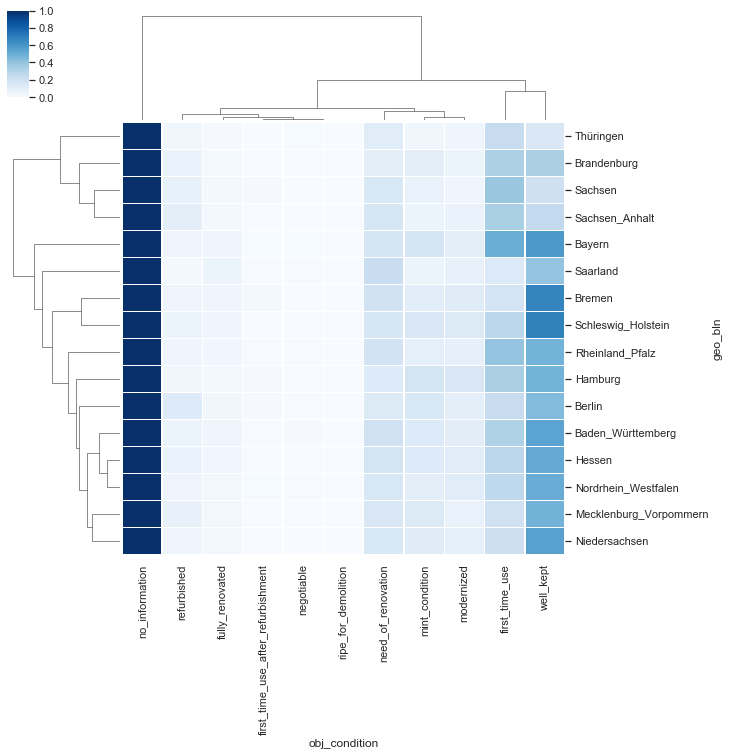

In [64]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and condition

We see that the most of the houses have no information. We also see that Bremen and Schleswig Hollstein have well-kept homes. Bayern has the highest proportion of first-time usage homes.

In [65]:
grouped = df_full.groupby(['obj_condition','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_condition', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_condition           first_time_use  first_time_use_after_refurbishment  \
geo_bln                                                                      
Baden_Württemberg            558743.99                           853374.71   
Bayern                       715996.27                          1173411.98   
Berlin                       817520.93                          1821025.62   
Brandenburg                  390497.37                           539370.83   
Bremen                       389170.90                           457562.50   
Hamburg                      810990.18                          1761470.59   
Hessen                       577903.93                           901223.33   
Mecklenburg_Vorpommern       367809.55                           380036.22   
Niedersachsen                372753.04                           495483.72   
Nordrhein_Westfalen          425091.52                           616312.55   
Rheinland_Pfalz              346712.23                           492848.89   
Saarland                     333172.49                           213333.33   
Sachsen                      505923.51                           443711.65   
Sachsen_Anhalt               296846.17                          1362753.33   
Schleswig_Holstein           499246.84                          1394571.43   
Thüringen                    320712.79                           302333.33   

obj_condition           fully_renovated  mint_condition  modernized  \
geo_bln                                                               
Baden_Württemberg             701948.50       878728.86   677121.86   
Bayern                        825736.01      1086050.79   767727.62   
Berlin                        904188.98      1322909.02  1423980.08   
Brandenburg                   428838.36       678783.98   506813.62   
Bremen                        322434.38       567983.86   455937.09   
Hamburg                       881981.59      1445858.37  1610208.28   
Hessen                        778643.62       950100.07   669424.19   
Mecklenburg_Vorpommern        513596.59       479986.02   335198.68   
Niedersachsen                 422082.33       505902.02   377477.01   
Nordrhein_Westfalen           548559.26       720641.16   548875.51   
Rheinland_Pfalz               421281.57       540181.98   403234.73   
Saarland                      283653.27       524670.07   300640.00   
Sachsen                       443346.83       580078.61   416033.43   
Sachsen_Anhalt                308816.96       414009.98   218475.01   
Schleswig_Holstein            541799.20       727412.14   515494.29   
Thüringen                     329532.56       484490.30   237202.35   

obj_condition           need_of_renovation  negotiable  no_information  \
geo_bln                                                                  
Baden_Württemberg                450964.57   696788.59       515487.09   
Bayern                           481778.29   648707.31       613655.37   
Berlin                          1009697.19  1075691.07      1069487.52   
Brandenburg                      284390.87   376348.75       348605.60   
Bremen                           279127.43   459000.00       315654.71   
Hamburg                          593047.02   937233.33      1037680.38   
Hessen                           412193.07   387361.33       497766.56   
Mecklenburg_Vorpommern           158125.54   203385.67       232738.28   
Niedersachsen                    212812.58   338854.52       308475.25   
Nordrhein_Westfalen              306643.92   526439.04       387464.07   
Rheinland_Pfalz                  204887.47   299026.23       271664.37   
Saarland                         151124.35   212700.00       213473.00   
Sachsen                          157879.39   419424.11       246316.14   
Sachsen_Anhalt                   105794.53   169653.85       151741.62   
Schleswig_Holstein               289438.40   337865.38       458179.29   
Thüringen                        141292.39   189329.04    

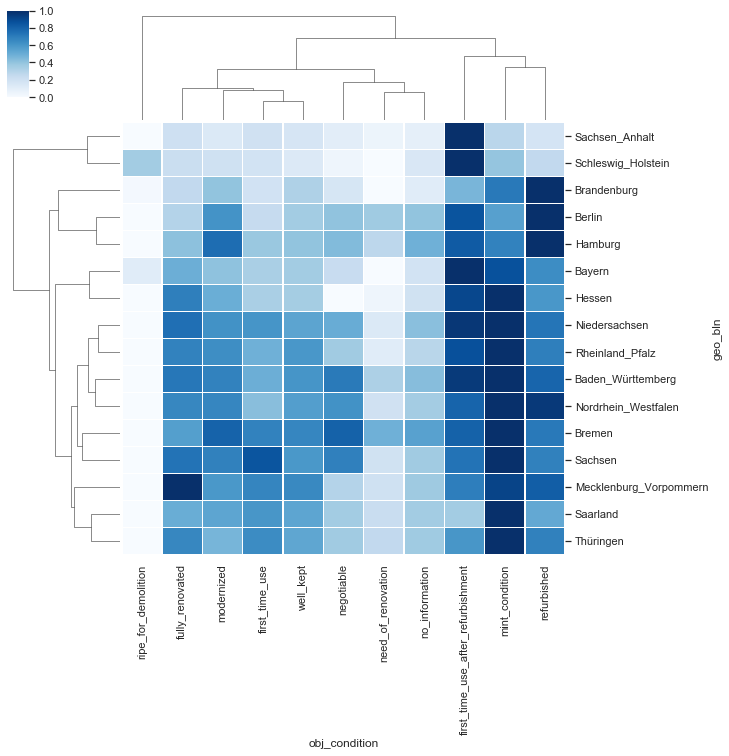

In [66]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and condition

The most expensive homes are in mint-condition. 

In [67]:
grouped = df_full.groupby('obj_constructionPhase').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_constructionPhase').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_constructionPhase','URL']], left_on='obj_constructionPhase', right_on='obj_constructionPhase')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_constructionPhase  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0        no_information          477888.37           221.98      1710.91   
1             completed          499137.30           207.36      1200.48   
2             projected          419572.04           159.85       758.22   
3    under_construction          662256.87           169.52       516.75   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              2.96         7.01                2.30             12.28   
1              2.57         6.93                2.28             17.29   
2              3.40         5.09                1.95             12.90   
3              1.79         5.51                2.52             10.90   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                4.00           160.00  ...            2008.84   
1                4.15           162.96  ...            2010.55   
2                4.24            31.77  ...            2019.01   
3                4.44            50.61  ...            2017.74   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1957.34      319.97              4.71              2502.65   
1              1962.43      365.42              3.98              2822.76   
2              2019.47      406.25              4.92              3345.85   
3              2011.14      363.40              5.03              2860.35   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              2390.97                 866.47                     71.09   
1              2597.66                 957.66                     71.49   
2              2766.11                 831.26                     69.50   
3              3955.93                2269.06                     68.41   

   bev_pro_km2  Amount_offers  
0       775.14         145380  
1       740.10          45005  
2       503.97          42400  
3       933.15           2402  

[4 rows x 21 columns]

In [68]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_constructionPhase','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_constructionPhase','geo_bln'], right_on=['obj_constructionPhase','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_constructionPhase','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase   completed  no_information  projected  \
geo_bln                                                        
Baden_Württemberg            5787           15117       5465   
Bayern                       5407           16221       6163   
Berlin                       1060            3499        537   
Brandenburg                  2161            6317       3008   
Bremen                        331            1277         88   
Hamburg                       312            2043        369   
Hessen                       3993           12279       3240   
Mecklenburg_Vorpommern       1124            3991        587   
Niedersachsen                5492           19352       3120   
Nordrhein_Westfalen          8525           28071       7469   
Rheinland_Pfalz              4322           11601       4636   
Saarland                      729            2672        399   
Sachsen                      1875            6678       3800   
Sachsen_Anhalt               1112            5358       1644   
Schleswig_Holstein           2302            7657       1032   
Thüringen                     473            3247        843   

obj_constructionPhase   under_construction  
geo_bln                                     
Baden_Württemberg                      207  
Bayern                                 623  
Berlin                                  64  
Brandenburg                            153  
Bremen                                  29  
Hamburg                                 46  
Hessen                                 225  
Mecklenburg_Vorpommern                  54  
Niedersachsen                          219  
Nordrhein_Westfalen                    340  
Rheinland_Pfalz                        136  
Saarland                                 8  
Sachsen                                118  
Sachsen_Anhalt                          35  
Schleswig_Holstein                     128  
Thüringen                               17

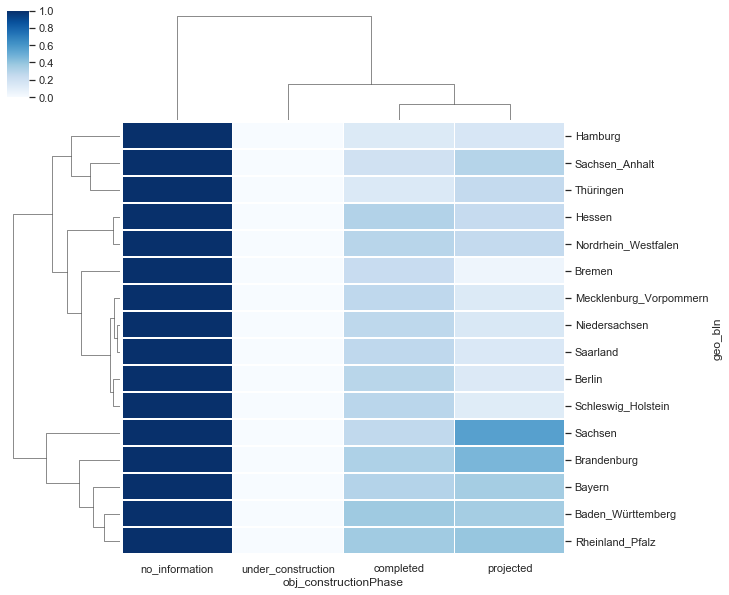

In [69]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and construction phase

Most of the homes are finished but we see that Sachsen and Brandenburg have more projected than completed houses.

In [70]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase   completed  no_information  projected  \
geo_bln                                                        
Baden_Württemberg       599355.99       598278.18  504713.30   
Bayern                  751390.18       733848.30  537784.38   
Berlin                  967707.70      1176224.28 1059753.18   
Brandenburg             491633.21       414035.90  338617.45   
Bremen                  366555.65       354302.39  383888.08   
Hamburg                 813815.42      1113609.75  792043.78   
Hessen                  606886.29       569460.12  495233.89   
Mecklenburg_Vorpommern  349998.20       285282.96  284012.38   
Niedersachsen           338069.48       334899.03  342895.34   
Nordrhein_Westfalen     481045.14       449854.81  393603.17   
Rheinland_Pfalz         359444.64       305795.67  336592.91   
Saarland                258321.24       237973.74  292229.21   
Sachsen                 320677.50       349134.85  303627.97   
Sachsen_Anhalt          228976.38       177638.25  283269.41   
Schleswig_Holstein      425945.24       482904.11  459885.17   
Thüringen               246233.33       204728.28  298316.59   

obj_constructionPhase   under_construction  
geo_bln                                     
Baden_Württemberg                732351.57  
Bayern                           972828.43  
Berlin                           815373.42  
Brandenburg                      492547.46  
Bremen                           368611.38  
Hamburg                          936951.20  
Hessen                           697171.63  
Mecklenburg_Vorpommern           411109.04  
Niedersachsen                    398052.44  
Nordrhein_Westfalen              479513.10  
Rheinland_Pfalz                  450991.24  
Saarland                         215601.25  
Sachsen                          346453.72  
Sachsen_Anhalt                   248061.89  
Schleswig_Holstein               825036.60  
Thüringen                        249382.41

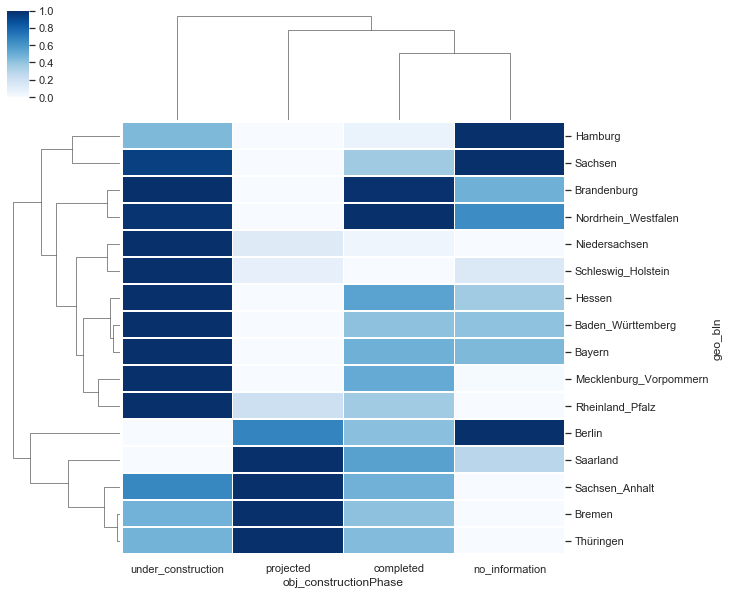

In [71]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and construction phase

Interestingly, the projected houses in Bremen, Sachsen-Anhalt, Thüringen and Saarland are more expensive.

In [72]:
grouped = df_full.groupby('obj_interiorQual').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_interiorQual').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_interiorQual','URL']], left_on='obj_interiorQual', right_on='obj_interiorQual')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_interiorQual  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0   no_information          431739.12           215.47      1687.14   
1    sophisticated          532088.53           181.32      1016.12   
2           normal          422009.06           213.22      1207.04   
3           simple          274006.42           211.99      1351.96   
4           luxury         1464124.13           286.10      2237.80   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              2.44         6.79                2.23             10.78   
1              2.29         5.87                2.13             15.49   
2              3.26         7.25                2.30             16.76   
3              2.27         6.89                2.23             14.79   
4             10.29         7.26                2.38             18.34   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                4.00           164.90  ...            2007.90   
1                4.26            86.81  ...            2014.24   
2                4.05           172.67  ...            2009.26   
3                3.77           253.27  ...            2000.55   
4                4.26            80.19  ...            2014.51   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1957.10      309.19              4.55              2446.08   
1              1999.45      406.20              4.84              3255.14   
2              1958.27      350.58              4.36              2683.26   
3              1926.35      307.07              4.01              2348.41   
4              1993.48      445.98              6.10              3517.83   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              2261.81                 785.44                     70.59   
1              3048.73                1059.18                     71.04   
2              2302.21                 876.12                     71.56   
3              1661.46                 646.99                     68.43   
4              5002.01                1892.18                     73.37   

   bev_pro_km2  Amount_offers  
0       730.53         119772  
1       666.46          62511  
2       764.75          38370  
3       655.53           9347  
4       972.52           5187  

[5 rows x 21 columns]

In [73]:
grouped = df_full.groupby(['obj_interiorQual','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_interiorQual','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_interiorQual','geo_bln'], right_on=['obj_interiorQual','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_interiorQual','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_interiorQual', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_interiorQual        luxury  no_information  normal  simple  sophisticated
geo_bln                                                                      
Baden_Württemberg          538           12221    4993    1166           7658
Bayern                     954           12162    4423     893           9982
Berlin                     222            2714     598     175           1451
Brandenburg                157            5889    1573     374           3646
Bremen                      23            1049     333      81            239
Hamburg                    131            1606     302      44            687
Hessen                     580            9979    3362     788           5028
Mecklenburg_Vorpommern      70            3253    1082     315           1036
Niedersachsen              395           16525    4561    1080           5622
Nordrhein_Westfalen       1373           22036    7577    1417          12002
Rheinland_Pfalz            270           10432    3587     876           5530
Saarland                    28            2506     509     191            574
Sachsen                    138            5940    1735     733           3925
Sachsen_Anhalt              49            4177    1372     581           1970
Schleswig_Holstein         229            6584    1906     354           2046
Thüringen                   30            2699     457     279           1115

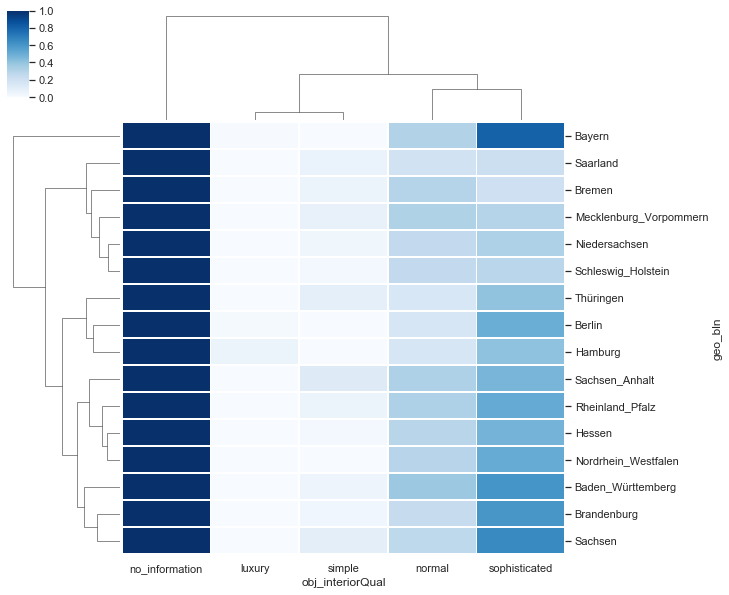

In [74]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and interior quality

Bayern tends to have more sophisticated interior quality.

In [75]:
grouped = df_full.groupby(['obj_interiorQual','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_interiorQual', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_interiorQual           luxury  no_information    normal     simple  \
geo_bln                                                                  
Baden_Württemberg      1382183.21       543542.65 560085.74  389227.54   
Bayern                 1772449.82       668203.37 600476.48  425104.63   
Berlin                 2568739.41      1143365.06 777733.05 1925692.79   
Brandenburg            1283907.52       393605.84 366997.93  216489.09   
Bremen                 1058826.00       338146.97 334717.42  280390.00   
Hamburg                2241576.93      1012873.27 635589.74  535284.09   
Hessen                 1868335.21       522570.99 461554.40  280838.63   
Mecklenburg_Vorpommern 1000232.63       257577.42 286782.02  143638.54   
Niedersachsen           850239.98       319613.00 291250.29  176928.08   
Nordrhein_Westfalen    1079766.48       398819.80 442538.92  267306.13   
Rheinland_Pfalz         834272.45       283533.64 316696.23  173153.99   
Saarland                889078.84       223714.68 245828.24  133448.95   
Sachsen                3202834.93       271462.59 304152.21  115118.25   
Sachsen_Anhalt          543691.08       174242.00 202676.59   89309.29   
Schleswig_Holstein     1580795.81       458506.34 356871.95  256775.45   
Thüringen               574999.67       199450.82 226798.15   81399.42   

obj_interiorQual        sophisticated  
geo_bln                                
Baden_Württemberg           624954.65  
Bayern                      704650.85  
Berlin                      887123.89  
Brandenburg                 437200.29  
Bremen                      439348.50  
Hamburg                    1060491.11  
Hessen                      617681.42  
Mecklenburg_Vorpommern      441522.72  
Niedersachsen               419374.96  
Nordrhein_Westfalen         485655.55  
Rheinland_Pfalz             407248.82  
Saarland                    359525.73  
Sachsen                     372202.78  
Sachsen_Anhalt              302727.85  
Schleswig_Holstein          540774.40  
Thüringen                   318400.49

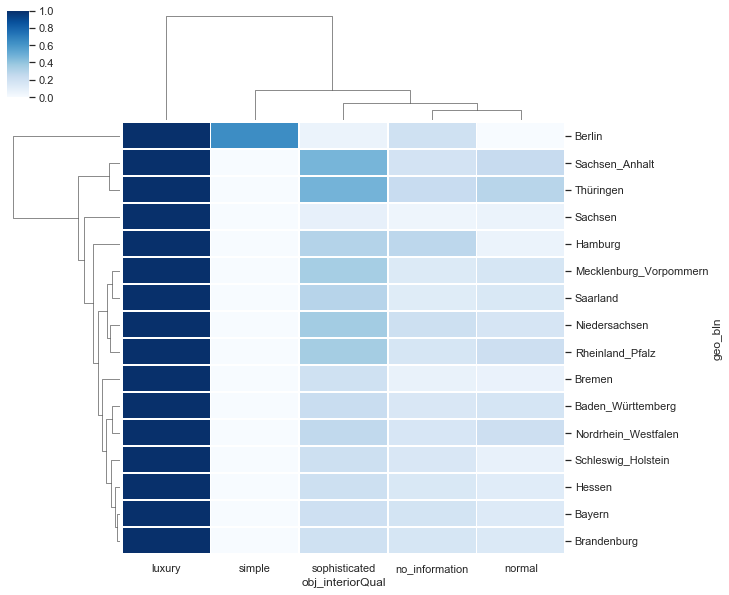

In [76]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and interior quality

Ok, clearly the luxury sector is the most expensive. Berlin has more expensive prices in the simple category. 

## Accessories

In [77]:
grouped = df_full.groupby('obj_firingTypes').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_firingTypes').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_firingTypes','URL']], left_on='obj_firingTypes', right_on='obj_firingTypes')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_firingTypes  obj_purchasePrice  \
0                                no_information          395342.22   
1                                           gas          524174.83   
2                                           oil          473847.40   
3                                   electricity          428706.08   
4                                 solar_heating          532966.79   
5                                    geothermal          603078.10   
6                              district_heating          706288.66   
7                             natural_gas_light          620920.18   
8                                pellet_heating          579346.22   
9                  environmental_thermal_energy          556270.37   
10                                         wood          323072.69   
11                                   liquid_gas          368587.34   
12                            natural_gas_heavy          605510.04   
13                                         coal          142135.43   
14                                local_heating          522408.55   
15                                   bio_energy          506227.75   
16                                  heat_supply          694856.95   
17                                   wood_chips          626136.36   
18         combined_heat_and_power_fossil_fuels          814389.58   
19  combined_heat_and_power_regenerative_energy          497639.56   
20                                    coal_coke          356705.47   
21                       steam_district_heating          812353.33   
22     combined_heat_and_power_renewable_energy          962944.11   
23                                 hydro_energy         1267963.59   
24                                  wind_energy          797762.50   
25           combined_heat_and_power_bio_energy          545850.00   

    obj_livingSpace  obj_lotArea  obj_noParkSpaces  obj_noRooms  \
0            210.00      1792.68              4.38         6.36   
1            206.38       995.48              2.48         6.97   
2            215.13      1806.02              2.59         7.22   
3            192.03       924.35              2.04         5.80   
4            177.44      1069.52              6.34         5.72   
5            169.29      1252.54              2.24         5.68   
6            217.52       602.18              2.21         7.21   
7            210.38      1126.45              2.43         7.23   
8            215.22      1586.02              2.85         7.16   
9            156.90       620.04              1.77         5.78   
10           176.25      3123.30              2.72         6.60   
11           196.60      3501.62              2.62         6.92   
12           216.05       735.67              2.58         7.50   
13           199.51      2109.74              2.69         7.08   
14           153.81       365.60              1.83         5.31   
15           175.10       976.14              2.31         5.74   
16           173.25       594.19              1.72         5.33   
17           254.09      7791.33              5.70         8.23   
18           194.61       443.42              2.18         6.46   
19           165.08       663.24              2.32         5.17   
20           356.11      1469.69              2.27        13.34   
21           232.77       474.37              1.86         7.74   
22           192.78       589.31              2.05         6.53   
23           191.56       594.83              1.85         5.53   
24           194.36       476.88              3.00         5.75   
25           150.16       409.25              1.67         5.25   

    obj_numberOfFloors  obj_picturecount  obj_pricetrendrent  obj_thermalChar  \
0                 2.06              7.92                3.96           100.64   
1                 2.30             16.09                4.14           156.87   
2                 2.26             17.56                3.91           192.87   
3      

In [78]:
grouped = df_full.groupby(['obj_firingTypes','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_firingTypes','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_firingTypes','geo_bln'], right_on=['obj_firingTypes','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_firingTypes','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_firingTypes', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_firingTypes         bio_energy   coal  coal_coke  \
geo_bln                                                
Baden_Württemberg            21.00  15.00       3.00   
Bayern                       62.00  18.00       1.00   
Berlin                        2.00   3.00       0.00   
Brandenburg                   0.00  76.00       9.00   
Bremen                        0.00   0.00       1.00   
Hamburg                       0.00   0.00       0.00   
Hessen                       11.00   6.00       2.00   
Mecklenburg_Vorpommern        4.00  61.00       6.00   
Niedersachsen                20.00   8.00       0.00   
Nordrhein_Westfalen          25.00  66.00      18.00   
Rheinland_Pfalz              19.00  19.00       1.00   
Saarland                      0.00   8.00       3.00   
Sachsen                       4.00 145.00       9.00   
Sachsen_Anhalt                7.00  65.00       6.00   
Schleswig_Holstein           21.00   3.00       0.00   
Thüringen                     0.00  43.00       5.00   

obj_firingTypes         combined_heat_and_power_bio_energy  \
geo_bln                                                      
Baden_Württemberg                                     0.00   
Bayern                                                1.00   
Berlin                                                0.00   
Brandenburg                                           0.00   
Bremen                                                0.00   
Hamburg                                               0.00   
Hessen                                                1.00   
Mecklenburg_Vorpommern                                0.00   
Niedersachsen                                         0.00   
Nordrhein_Westfalen                                   1.00   
Rheinland_Pfalz                                       0.00   
Saarland                                              0.00   
Sachsen                                               1.00   
Sachsen_Anhalt                                        0.00   
Schleswig_Holstein                                    0.00   
Thüringen                                             0.00   

obj_firingTypes         combined_heat_and_power_fossil_fuels  \
geo_bln                                                        
Baden_Württemberg                                       3.00   
Bayern                                                 10.00   
Berlin                                                 42.00   
Brandenburg                                             0.00   
Bremen                                                  2.00   
Hamburg                                                 2.00   
Hessen                                                  5.00   
Mecklenburg_Vorpommern                                  0.00   
Niedersachsen                                           8.00   
Nordrhein_Westfalen                                    14.00   
Rheinland_Pfalz                                         4.00   
Saarland                                                0.00   
Sachsen                                                 1.00   
Sachsen_Anhalt                                          0.00   
Schleswig_Holstein                                      5.00   
Thüringen                                               0.00   

obj_firingTypes         combined_heat_and_power_regenerative_energy  \
geo_bln                                                               
Baden_Württemberg                                              1.00   
Bayern                                                         9.00   
Berlin                                                         8.00   
Brandenburg                                                   19.00   
Bremen                                                         1.00   
Hamburg                                                        0.00   
Hessen                                                         4.00   
Mecklenburg_Vorpommern                                         0.00   
Niedersachs

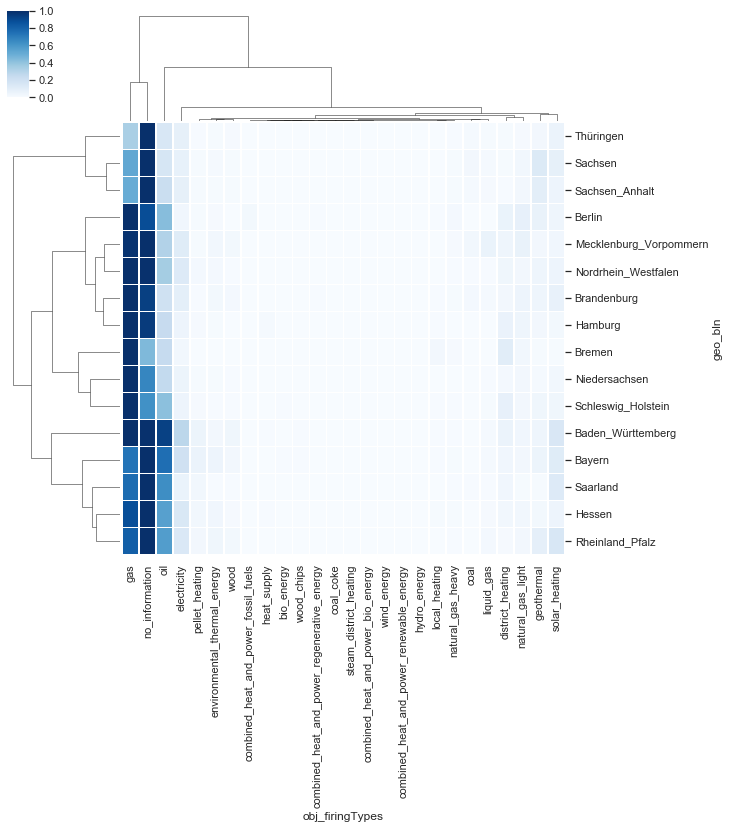

In [79]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and firing types

Clearly there is a clear tendency to gas but in the Hessen, Rheinland Pfalz, Saarland, Baden-Württemberg and Bayern people use more Oil-heating. That is not so much used in the other regions. 

In [80]:
grouped = df_full.groupby(['obj_firingTypes','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_firingTypes', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_firingTypes         bio_energy      coal  coal_coke  \
geo_bln                                                   
Baden_Württemberg        644642.86 198533.33  391550.00   
Bayern                   631403.23 310572.22  378000.00   
Berlin                  1187500.00 223000.00       0.00   
Brandenburg                   0.00 156980.25  148866.67   
Bremen                        0.00      0.00  550000.00   
Hamburg                       0.00      0.00       0.00   
Hessen                   576521.82 178583.33  299750.00   
Mecklenburg_Vorpommern   242500.00  71955.74   75833.33   
Niedersachsen            340550.00 109062.50       0.00   
Nordrhein_Westfalen      493123.96 320300.76  891277.78   
Rheinland_Pfalz          364489.47 112568.42  118500.00   
Saarland                      0.00  70750.00  168666.67   
Sachsen                  620000.00 106087.72   95877.78   
Sachsen_Anhalt           356142.86  78663.06   64483.33   
Schleswig_Holstein       276761.90 327666.67       0.00   
Thüringen                     0.00  78140.12   82980.00   

obj_firingTypes         combined_heat_and_power_bio_energy  \
geo_bln                                                      
Baden_Württemberg                                     0.00   
Bayern                                           950000.00   
Berlin                                                0.00   
Brandenburg                                           0.00   
Bremen                                                0.00   
Hamburg                                               0.00   
Hessen                                           495000.00   
Mecklenburg_Vorpommern                                0.00   
Niedersachsen                                         0.00   
Nordrhein_Westfalen                              307500.00   
Rheinland_Pfalz                                       0.00   
Saarland                                              0.00   
Sachsen                                          430900.00   
Sachsen_Anhalt                                        0.00   
Schleswig_Holstein                                    0.00   
Thüringen                                             0.00   

obj_firingTypes         combined_heat_and_power_fossil_fuels  \
geo_bln                                                        
Baden_Württemberg                                  530633.33   
Bayern                                            2036850.00   
Berlin                                             581066.43   
Brandenburg                                             0.00   
Bremen                                             298950.00   
Hamburg                                           1174000.00   
Hessen                                            1727400.00   
Mecklenburg_Vorpommern                                  0.00   
Niedersachsen                                      710842.50   
Nordrhein_Westfalen                                457183.57   
Rheinland_Pfalz                                    463500.00   
Saarland                                                0.00   
Sachsen                                            415000.00   
Sachsen_Anhalt                                          0.00   
Schleswig_Holstein                                1175400.00   
Thüringen                                               0.00   

obj_firingTypes         combined_heat_and_power_regenerative_energy  \
geo_bln                                                               
Baden_Württemberg                                         597000.00   
Bayern                                                    610127.78   
Berlin                                                    659375.00   
Brandenburg                                               467442.25   
Bremen                                                    450000.00   
Hamburg                                                        0.00   
Hessen                                                    544500.00   
Mecklenburg_Vorpommern      

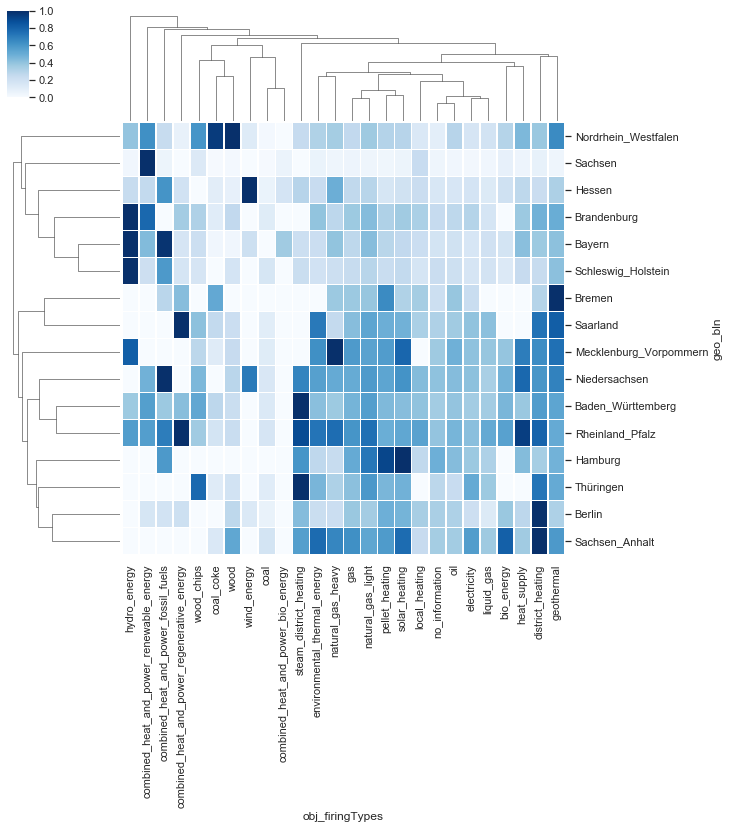

In [81]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and firing types

No clear pattern visible.

In [82]:
grouped = df_full.groupby('obj_heatingType').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_heatingType').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_heatingType','URL']], left_on='obj_heatingType', right_on='obj_heatingType')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_heatingType  obj_purchasePrice  obj_livingSpace  \
0                  central_heating          507295.99           212.17   
1                    floor_heating          598487.71           173.91   
2                      gas_heating          513710.96           209.63   
3                   no_information          487827.54           232.07   
4                        heat_pump          562046.63           159.11   
5                      oil_heating          488645.20           209.26   
6                    stove_heating          241277.06           163.17   
7   self_contained_central_heating          574402.57           268.65   
8                 district_heating          744763.36           235.85   
9                 electric_heating          319475.78           364.34   
10            night_storage_heater          300002.65           164.46   
11   combined_heat_and_power_plant          584044.06           183.05   
12             wood_pellet_heating          732435.99           204.26   
13                   solar_heating          711103.71           197.96   

    obj_lotArea  obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  \
0       1329.53              3.03         7.08                2.28   
1        809.12              4.00         5.49                2.12   
2       1063.65              2.22         6.77                2.25   
3       1518.13              2.35         6.27                2.09   
4        795.92              1.86         5.27                2.06   
5       2233.61              2.52         7.37                2.25   
6       1561.35              2.42         6.38                2.12   
7        778.17              2.87         9.88                2.64   
8        799.84              2.35         7.67                2.57   
9       1087.46              2.18         6.36                2.17   
10      1412.80              2.03         6.56                2.28   
11       657.10              2.32         6.13                2.70   
12      1659.15              2.66         6.94                2.85   
13       913.49              2.49         6.33                2.25   

    obj_picturecount  obj_pricetrendrent  obj_thermalChar  ...  \
0              16.72                4.04           162.85  ...   
1              14.51                4.40            60.47  ...   
2              15.74                4.25           146.97  ...   
3              12.91                4.43           150.55  ...   
4              11.95                4.22            30.03  ...   
5              17.51                3.90           188.54  ...   
6              15.31                3.75           243.38  ...   
7              15.47                3.82           178.12  ...   
8              14.17                4.22           124.01  ...   
9              15.07                3.90           175.77  ...   
10             16.57                4.03           191.07  ...   
11             14.04                3.92            78.33  ...   
12             16.28                3.95           148.27  ...   
13             15.42                3.83            78.26  ...   

    obj_lastRefurbish  obj_yearConstructed  word_count  word_count_upper  \
0             2009.64              1962.39      379.26              4.34   
1             2014.31              2009.69      427.98              4.84   
2             2010.86              1968.23      337.60              4.52   
3             2010.60              1983.41      326.58              5.07   
4             2016.05              2015.84      379.74              5.30   
5             2011.15              1955.64      326.61              4.34   
6             2002.83              1924.56      319.17              3.65   
7             2009.27              1937.57      351.63              4.48   
8             2014.09              1981.72      349.80              4.15   
9             2007.41              1947.04      303.54              4.37   
10            2003.77         

In [83]:
grouped = df_full.groupby(['obj_heatingType','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_heatingType','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_heatingType','geo_bln'], right_on=['obj_heatingType','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_heatingType','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_heatingType', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_heatingType         central_heating  combined_heat_and_power_plant  \
geo_bln                                                                  
Baden_Württemberg               9780.00                         154.00   
Bayern                         10316.00                          94.00   
Berlin                          1700.00                          17.00   
Brandenburg                     2847.00                          15.00   
Bremen                           716.00                          29.00   
Hamburg                          911.00                          42.00   
Hessen                          7179.00                         100.00   
Mecklenburg_Vorpommern          2066.00                           2.00   
Niedersachsen                  11222.00                          63.00   
Nordrhein_Westfalen            14634.00                         159.00   
Rheinland_Pfalz                 7756.00                          25.00   
Saarland                        1531.00                           6.00   
Sachsen                         2678.00                          33.00   
Sachsen_Anhalt                  1838.00                           4.00   
Schleswig_Holstein              4855.00                          46.00   
Thüringen                        913.00                           0.00   

obj_heatingType         district_heating  electric_heating  floor_heating  \
geo_bln                                                                     
Baden_Württemberg                 280.00            313.00        3564.00   
Bayern                            151.00            248.00        3969.00   
Berlin                            218.00             11.00         692.00   
Brandenburg                        78.00             52.00        1457.00   
Bremen                             66.00              5.00          78.00   
Hamburg                            69.00             10.00         333.00   
Hessen                            151.00            156.00        1370.00   
Mecklenburg_Vorpommern             55.00             56.00         425.00   
Niedersachsen                     206.00            147.00        1850.00   
Nordrhein_Westfalen               513.00            227.00        3731.00   
Rheinland_Pfalz                    61.00            161.00        1487.00   
Saarland                           35.00             14.00         122.00   
Sachsen                            38.00             89.00        1630.00   
Sachsen_Anhalt                     32.00             44.00         634.00   
Schleswig_Holstein                259.00             55.00         648.00   
Thüringen                          18.00             30.00         408.00   

obj_heatingType         gas_heating  heat_pump  night_storage_heater  \
geo_bln                                                                
Baden_Württemberg           1440.00    1468.00                248.00   
Bayern                      1418.00    2208.00                135.00   
Berlin                       355.00     150.00                  5.00   
Brandenburg                  985.00     442.00                 20.00   
Bremen                       223.00       6.00                  9.00   
Hamburg                      316.00      52.00                  8.00   
Hessen                      1444.00    1356.00                 84.00   
Mecklenburg_Vorpommern       479.00     111.00                 35.00   
Niedersachsen               2805.00     526.00                118.00   
Nordrhein_Westfalen         3428.00    1878.00                266.00   
Rheinland_Pfalz             1225.00    1086.00                144.00   
Saarland                     181.00      50.00                 14.00   
Sachsen                      742.00     670.00                 42.00   
Sachsen_Anhalt               626.00     428.00                 37.00   
Schleswig_Holstein          1179.00     201.00                 38.00   
Thüringen                    211.00     250.00          

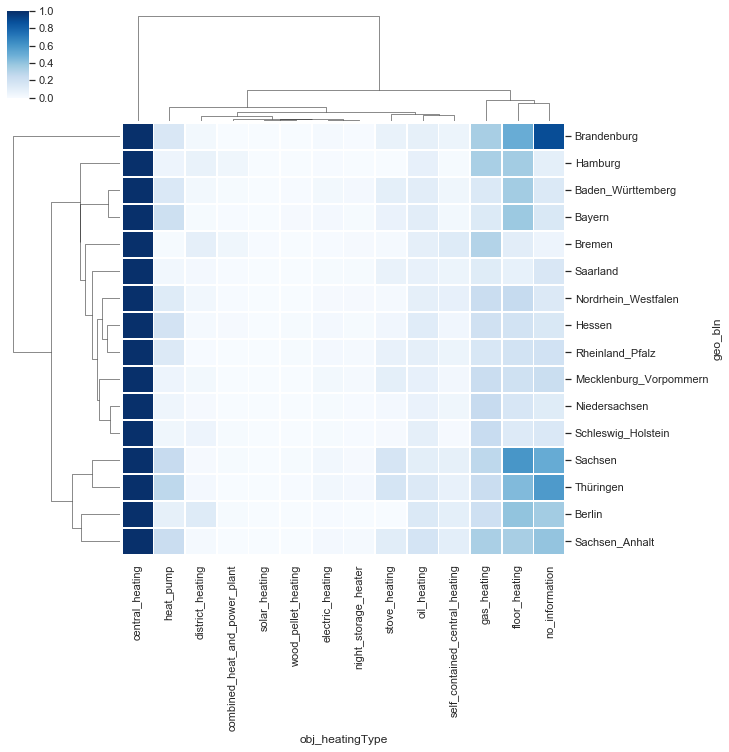

In [84]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and heating types

Most of the homes use central heating. Sachsen and Brandenburg do use also more floor heating.

In [85]:
grouped = df_full.groupby(['obj_heatingType','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_heatingType', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_heatingType         central_heating  combined_heat_and_power_plant  \
geo_bln                                                                  
Baden_Württemberg             628850.11                      628359.94   
Bayern                        717563.93                      795280.96   
Berlin                       1202206.16                      534987.65   
Brandenburg                   504756.09                      515884.00   
Bremen                        388901.94                      352007.59   
Hamburg                      1044098.20                      649914.76   
Hessen                        619817.42                      532107.16   
Mecklenburg_Vorpommern        336486.69                      200000.00   
Niedersachsen                 345780.23                      652806.76   
Nordrhein_Westfalen           467241.33                      563917.72   
Rheinland_Pfalz               347268.24                      597766.40   
Saarland                      261247.93                      266633.33   
Sachsen                       355172.24                      368559.39   
Sachsen_Anhalt                256277.12                      397125.00   
Schleswig_Holstein            444207.40                      440301.09   
Thüringen                     288702.71                           0.00   

obj_heatingType         district_heating  electric_heating  floor_heating  \
geo_bln                                                                     
Baden_Württemberg              860284.13         529359.36      589912.91   
Bayern                        1203578.99         480311.69      802598.27   
Berlin                        1751478.85         441808.18      770833.25   
Brandenburg                    776439.48         147682.61      523570.46   
Bremen                         326775.76         208360.00      463654.82   
Hamburg                        671829.00         533950.00      909259.92   
Hessen                         698014.64         275760.56      724657.74   
Mecklenburg_Vorpommern         470505.53         184005.34      409324.81   
Niedersachsen                  426556.20         155448.29      424459.51   
Nordrhein_Westfalen            566894.89         291638.77      556466.92   
Rheinland_Pfalz                651857.38         190229.19      465847.68   
Saarland                       482600.00         208750.00      458337.18   
Sachsen                        518480.68         149610.10      620317.83   
Sachsen_Anhalt                 244923.75          93589.77      304139.15   
Schleswig_Holstein             468009.42         257110.89      582761.68   
Thüringen                      695555.56         189491.67      302405.29   

obj_heatingType         gas_heating  heat_pump  night_storage_heater  \
geo_bln                                                                
Baden_Württemberg         658429.97  573490.96             410326.01   
Bayern                    868257.65  745524.77             492759.26   
Berlin                    956852.16  723632.33            1294800.00   
Brandenburg               438750.41  461309.42             173650.00   
Bremen                    411689.19  329770.83             243222.22   
Hamburg                  1367606.42  867630.77             311475.00   
Hessen                    599008.83  655099.30             262621.43   
Mecklenburg_Vorpommern    326365.45  428980.99             221437.14   
Niedersachsen             354878.79  450457.95             174484.75   
Nordrhein_Westfalen       495235.42  510380.10             300657.06   
Rheinland_Pfalz           373820.84  425583.67             190720.14   
Saarland                  304002.21  380839.40             193428.57   
Sachsen                   374634.32  411375.61             192895.24   
Sachsen_Anhalt            255267.51  330831.23              85254.35   
Schleswig_Holstein        473070.56  692549.28             262657.89   
Thüringen                 304910.78  398548.16          

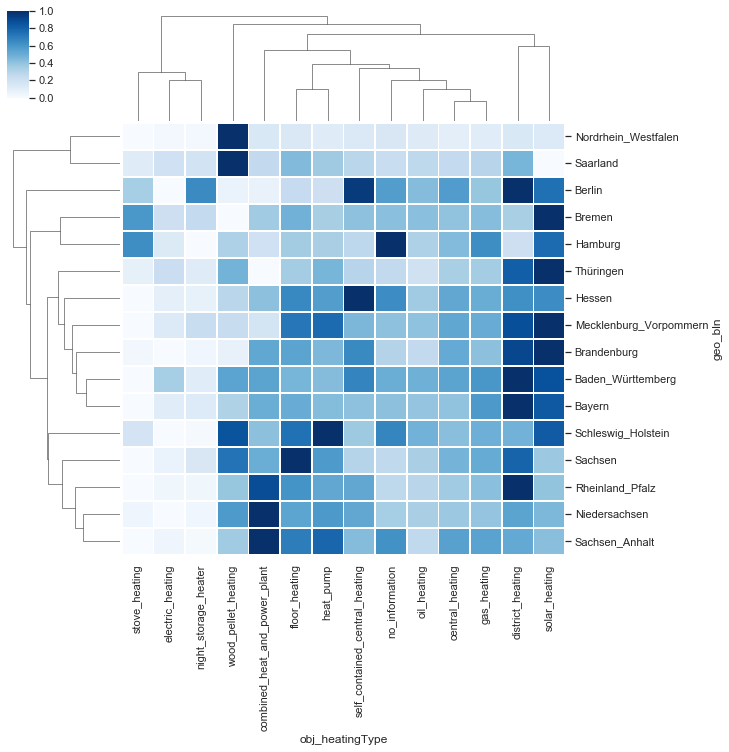

In [86]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and heating types

District heating is by far the most expensive. Solar heating seems to be expensive as well. Stove heating is interesting, since it is being used in Saarland, Mecklenburg Vorpommern, Hamburg and Bremen. It is most expensive in Hamburg. 

In [87]:
grouped = df_full.groupby('obj_cellar').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_cellar').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_cellar','URL']], left_on='obj_cellar', right_on='obj_cellar')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_cellar  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0      False          417800.26           204.03      1584.95   
1       True          567665.32           213.25      1164.80   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              2.86         6.34                2.06             11.45   
1              2.85         7.13                2.39             16.54   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                4.10           133.22  ...            2010.11   
1                4.03           167.46  ...            2009.64   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1971.54      331.09              4.67              2648.98   
1              1961.02      367.72              4.51              2839.52   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              2308.16                 757.62                     68.97   
1              2864.10                1120.06                     73.23   

   bev_pro_km2  Amount_offers  
0       623.83         148052  
1       887.25          87135  

[2 rows x 21 columns]

In [88]:
grouped = df_full.groupby(['obj_cellar','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_cellar','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_cellar','geo_bln'], right_on=['obj_cellar','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_cellar','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_cellar', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_cellar              False  True 
geo_bln                             
Baden_Württemberg       13402  13174
Bayern                  15791  12623
Berlin                   2939   2221
Brandenburg              8961   2678
Bremen                    992    733
Hamburg                  1572   1198
Hessen                  10792   8945
Mecklenburg_Vorpommern   4600   1156
Niedersachsen           20301   7882
Nordrhein_Westfalen     26274  18131
Rheinland_Pfalz         13211   7484
Saarland                 2313   1495
Sachsen                  9415   3056
Sachsen_Anhalt           6065   2084
Schleswig_Holstein       7807   3312
Thüringen                3617    963

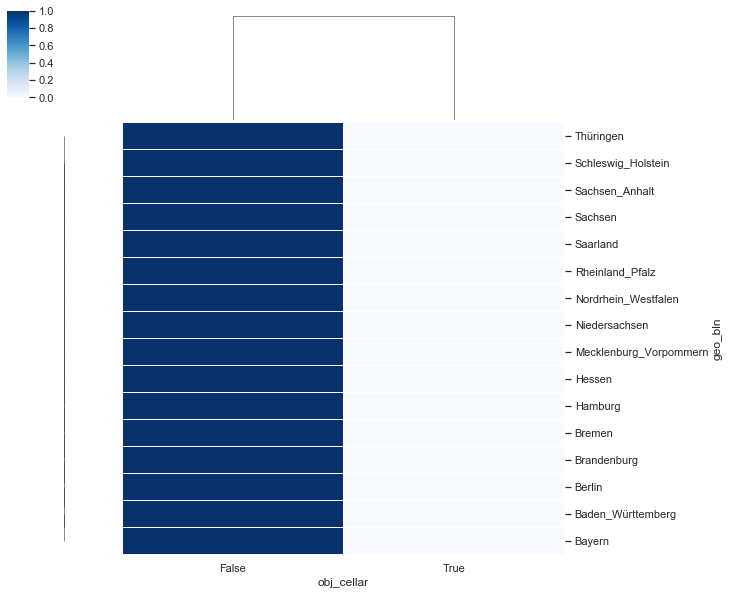

In [89]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and cellar

A cellar seems to be something special, since the houses without a cellar outnumber the houses with a cellar in all states.

In [90]:
grouped = df_full.groupby(['obj_cellar','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_cellar', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_cellar                  False      True 
geo_bln                                     
Baden_Württemberg       532558.85  628901.29
Bayern                  589001.43  838630.72
Berlin                 1193410.50 1015406.03
Brandenburg             383974.51  497016.30
Bremen                  371600.94  340542.73
Hamburg                1007100.02 1069463.95
Hessen                  485559.02  663718.98
Mecklenburg_Vorpommern  294459.97  316921.77
Niedersachsen           330213.57  354096.02
Nordrhein_Westfalen     398322.31  516580.45
Rheinland_Pfalz         298296.24  371732.11
Saarland                225733.49  281193.79
Sachsen                 291264.91  453272.77
Sachsen_Anhalt          196571.62  234442.26
Schleswig_Holstein      461072.87  500825.18
Thüringen               209300.45  290656.04

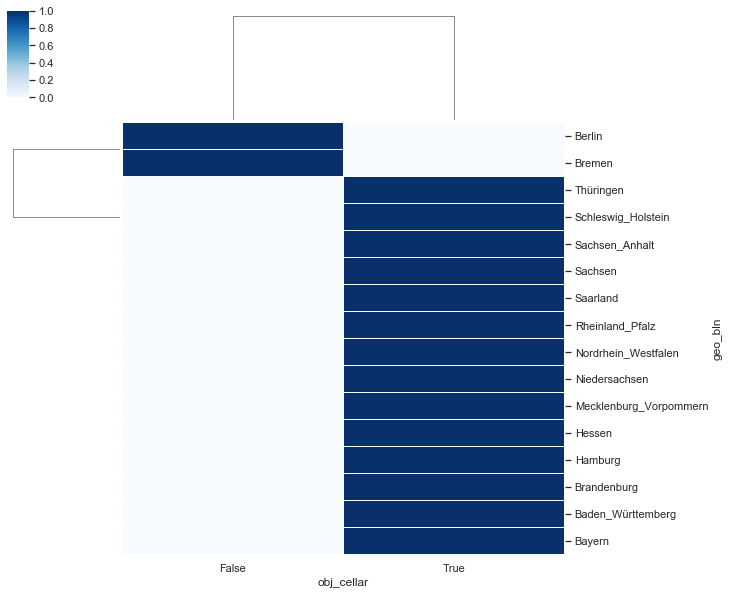

In [91]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and cellar

The cellar has also implications on the price, since it is usually more expensive (except in Berlin and Bremen). The difference in pricing is very small in Berlin and Bremen.

In [92]:
grouped = df_full.groupby('obj_barrierFree').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_barrierFree').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_barrierFree','URL']], left_on='obj_barrierFree', right_on='obj_barrierFree')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_barrierFree  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0           False          468814.19           208.14      1435.69   
1            True          567998.61           192.87      1294.86   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              2.88         6.66                2.23             13.20   
1              2.49         6.09                2.02             16.14   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                4.07           152.54  ...            2009.63   
1                4.23           106.97  ...            2012.51   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1965.99      343.51              4.60              2708.23   
1              1994.61      368.92              4.91              2957.70   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              2492.38                 886.79                     70.93   
1              2970.89                 999.18                     69.93   

   bev_pro_km2  Amount_offers  
0       724.52         224493  
1       658.08          10694  

[2 rows x 21 columns]

In [93]:
grouped = df_full.groupby(['obj_barrierFree','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_barrierFree','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_barrierFree','geo_bln'], right_on=['obj_barrierFree','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_barrierFree','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_barrierFree', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_barrierFree         False  True 
geo_bln                             
Baden_Württemberg       25523   1053
Bayern                  26803   1611
Berlin                   4903    257
Brandenburg             11136    503
Bremen                   1677     48
Hamburg                  2673     97
Hessen                  18909    828
Mecklenburg_Vorpommern   5554    202
Niedersachsen           26889   1294
Nordrhein_Westfalen     42535   1870
Rheinland_Pfalz         19719    976
Saarland                 3698    110
Sachsen                 11652    819
Sachsen_Anhalt           7833    316
Schleswig_Holstein      10632    487
Thüringen                4357    223

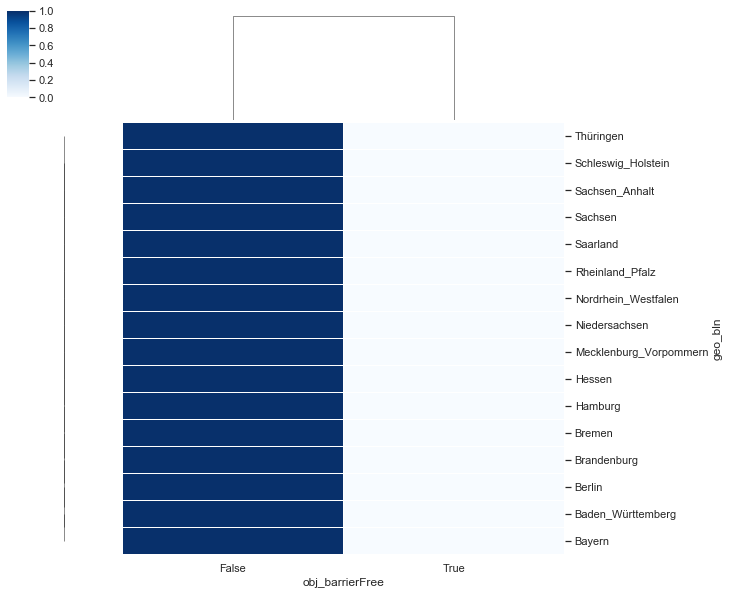

In [94]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and barrier free

Most of the houses are not barrier free. 

## Time

In [95]:
#Transform method taking points as param
def transform_years(years):
    if years < 1500:
        return "Before 1500"
    elif years >= 1500 and years < 1600:
        return "1500-1599" 
    elif years >= 1600 and years < 1700:
        return "1600-1699"  
    elif years >= 1700 and years < 1800:
        return "1700-1799" 
    elif years >= 1800 and years < 1850:
        return "1800-1849" 
    elif years >= 1850 and years < 1900:
        return "1850-1899" 
    elif years >= 1900 and years < 1910:
        return "1900-1909" 
    elif years >= 1910 and years < 1920:
        return "1910-1919" 
    elif years >= 1920 and years < 1930:
        return "1920-1929" 
    elif years >= 1920 and years < 1930:
        return "1920-1929" 
    elif years >= 1930 and years < 1940:
        return "1930-1939" 
    elif years >= 1940 and years < 1950:
        return "1940-1949" 
    elif years >= 1950 and years < 1960:
        return "1950-1959" 
    elif years >= 1960 and years < 1970:
        return "1960-1969" 
    elif years >= 1970 and years < 1980:
        return "1970-1979" 
    elif years >= 1980 and years < 1990:
        return "1980-1989" 
    elif years >= 1990 and years < 2000:
        return "1990-1999" 
    elif years >= 2000 and years < 2010:
        return "2000-2009" 
    elif years >= 2010 and years <= 2019:
        return "2010-2019"
    elif years > 2019:
        return "Future"
    else:
        return "Not known"

#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(Constructed_years_category = df_full['obj_yearConstructed'].apply(transform_years))
df_full[['obj_yearConstructed','Constructed_years_category']].head(10)

obj_yearConstructed Constructed_years_category
0              1964.00                  1960-1969
1              1975.00                  1970-1979
2              1962.00                  1960-1969
3              1973.00                  1970-1979
4              1994.00                  1990-1999
5              2019.00                  2010-2019
6                  nan                  Not known
7              1900.00                  1900-1909
8              1955.00                  1950-1959
9              1973.00                  1970-1979

## ↑ For construction year, we need to categorize the data first

In [96]:
grouped = df_full.groupby('Constructed_years_category').mean()
grouped = grouped[['obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('Constructed_years_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['Constructed_years_category','URL']], left_on='Constructed_years_category', right_on='Constructed_years_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_yearConstructed', ascending=False).reset_index(drop="True")
grouped

Constructed_years_category  obj_yearConstructed  obj_purchasePrice  \
0                      Future              2021.22          483181.40   
1                   2010-2019              2017.02          573955.09   
2                   2000-2009              2003.82          608730.39   
3                   1990-1999              1994.96          529226.15   
4                   1980-1989              1983.78          509789.44   
5                   1970-1979              1974.41          476752.76   
6                   1960-1969              1964.22          467685.71   
7                   1950-1959              1954.53          403949.76   
8                   1940-1949              1945.48          330255.41   
9                   1930-1939              1933.90          387520.86   
10                  1920-1929              1923.73          389651.61   
11                  1910-1919              1912.10          475833.94   
12                  1900-1909              1901.70          370498.47   
13                  1850-1899              1879.68          438708.65   
14                  1800-1849              1819.61          332297.04   
15                  1700-1799              1746.66          443151.02   
16                  1600-1699              1645.52          410959.74   
17                  1500-1599              1552.74          551794.08   
18                Before 1500              1313.71          845557.58   
19                  Not known                  nan          454808.07   

    obj_livingSpace  obj_lotArea  obj_noParkSpaces  obj_noRooms  \
0            165.65       768.16              5.04         5.16   
1            171.42       767.49              3.70         5.36   
2            219.44      1103.25              2.39         5.97   
3            202.11      1632.12              2.55         6.51   
4            203.14      1199.94              2.35         6.61   
5            202.12      1153.49              2.32         6.75   
6            211.06      1352.79              2.81         7.21   
7            195.91      1243.62              2.41         7.02   
8            186.06      2359.89              2.58         6.71   
9            182.68      1383.99              2.37         6.71   
10           206.17      3347.37              2.57         7.42   
11           248.21      1798.95              2.99         8.67   
12           267.42      1675.85              2.88         8.53   
13           298.26      2595.07              3.28         8.92   
14           225.14      3107.96              3.44         7.80   
15           260.30      2717.84              3.20         8.40   
16           259.18      2172.62              3.75         8.79   
17           307.45      2140.54              3.96         9.84   
18           426.05      2818.84              9.29        10.02   
19           217.98      1635.73              2.41         6.35   

    obj_numberOfFloors  obj_picturecount  obj_pricetrendrent  ...  \
0                 2.03             12.45                4.25  ...   
1                 2.16             13.14                4.33  ...   
2                 2.28             15.07                4.37  ...   
3                 2.28             15.51                4.33  ...   
4                 2.25             15.68                4.08  ...   
5                 2.15             15.25                4.01  ...   
6                 2.24             14.01                3.99  ...   
7                 2.33             13.02                3.79  ...   
8                 2.29             12.43                3.87  ...   
9                 2.29             12.72                4.25  ...   
10                2.38             12.08                3.71  ...   
11                2.50             12.45                3.69  ...   
12                2.53             11.00                3.58  ...   
13                2.44             12.31                3.44  ...   
14                2.33    

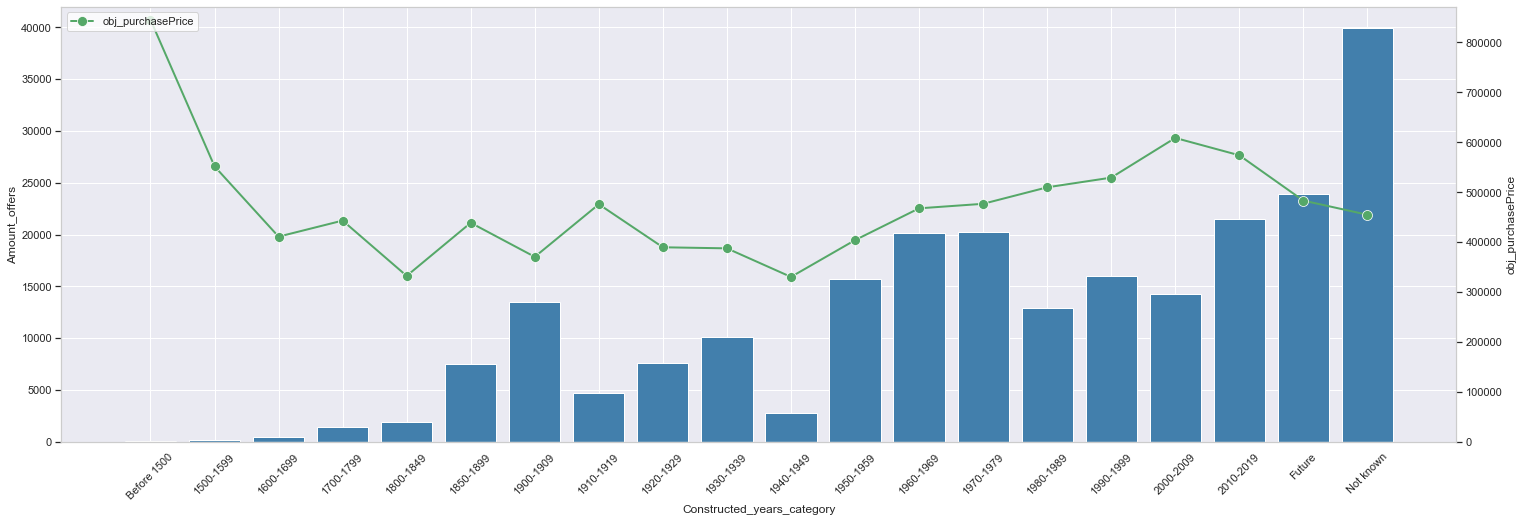

In [97]:
sns.set(font_scale = 1.2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 2, 'lines.markersize': 10})
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_yearConstructed')
ax= sns.barplot(x = 'Constructed_years_category', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'Constructed_years_category', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
ax.xaxis.grid(True)
plt.show()

(1800, 2020)

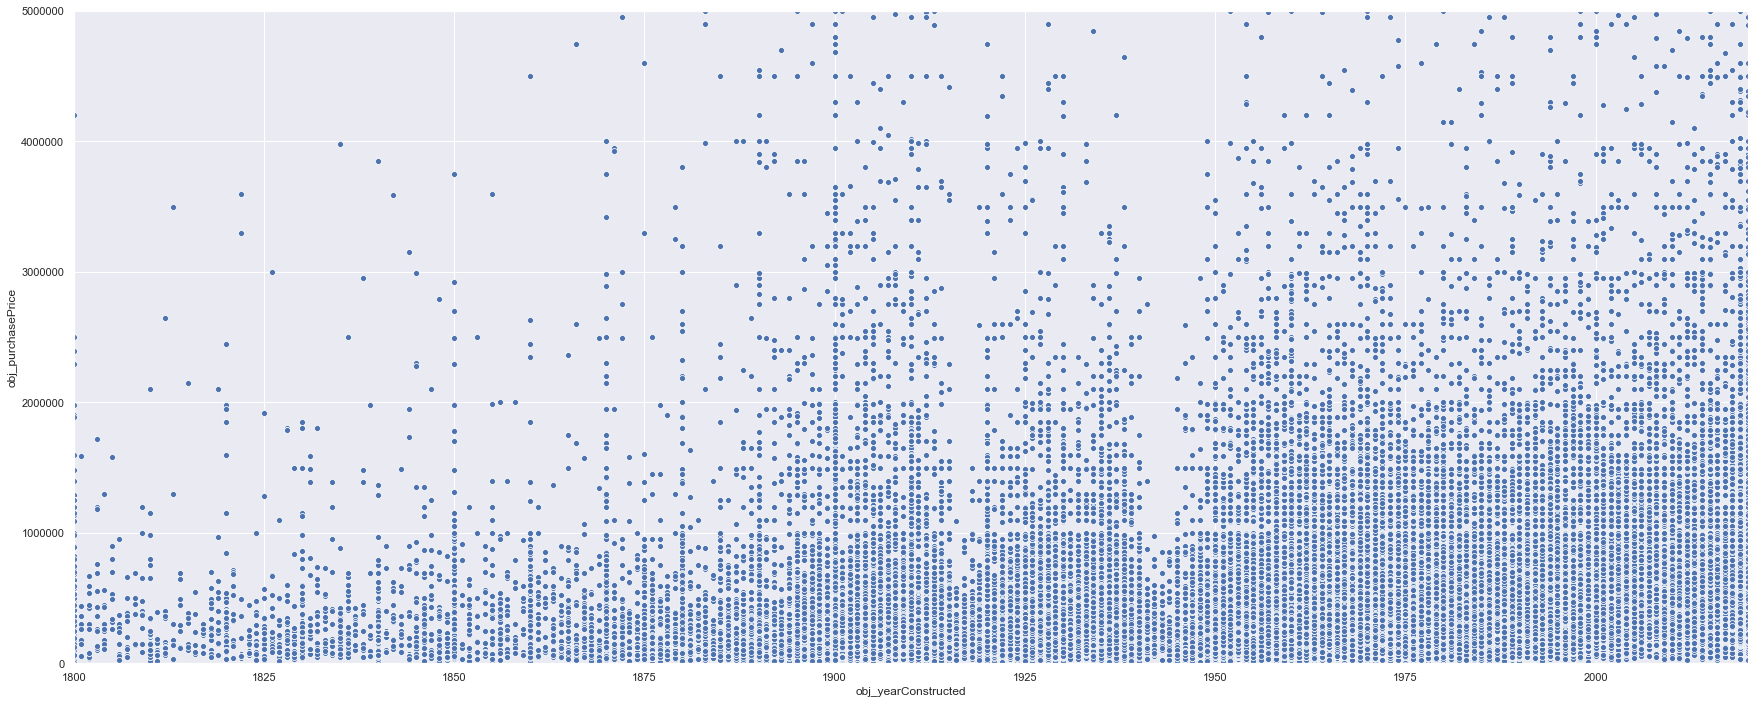

In [98]:
sns.set(font_scale = 1)
plt.figure(figsize=(30,12))
sns.scatterplot(x = 'obj_yearConstructed', y = 'obj_purchasePrice', data=df_full)
plt.ylim(0, 5000000)
plt.xlim(1800, 2020)

## ↑ Houses by construction year

Interesting! Do you see the drope between 1900-1925 and 1925-1950. That is due to the first and second World War. Also we see that many houses have been constructed in the year 1900. We dont know if this is true or just being claimed by the owner ;).

In [99]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['Constructed_years_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['Constructed_years_category','geo_bln'], right_on=['Constructed_years_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['Constructed_years_category','geo_bln','Amount_offers']]
grouped = grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='Amount_offers')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

Constructed_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                    
Baden_Württemberg                 21.00      46.00      45.00     179.00   
Bayern                            11.00      30.00      46.00     134.00   
Berlin                            10.00       0.00       1.00       2.00   
Brandenburg                        0.00       0.00       1.00      55.00   
Bremen                             0.00       0.00       1.00       2.00   
Hamburg                            0.00       0.00       0.00       6.00   
Hessen                            10.00      35.00      82.00     252.00   
Mecklenburg_Vorpommern             5.00       1.00      12.00      31.00   
Niedersachsen                      3.00      23.00      46.00     139.00   
Nordrhein_Westfalen               16.00       5.00      61.00     210.00   
Rheinland_Pfalz                    5.00      18.00      46.00     161.00   
Saarland                           0.00       0.00       0.00       6.00   
Sachsen                            5.00       4.00      28.00     132.00   
Sachsen_Anhalt                     4.00      13.00      19.00      71.00   
Schleswig_Holstein                 0.00       8.00      25.00      62.00   
Thüringen                          9.00       3.00       5.00      29.00   

Constructed_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                  
Baden_Württemberg              224.00     522.00     955.00     343.00   
Bayern                         170.00     439.00     712.00     193.00   
Berlin                           2.00      87.00     201.00     101.00   
Brandenburg                     66.00     325.00     617.00     219.00   
Bremen                          10.00      44.00     155.00      54.00   
Hamburg                         11.00      73.00      90.00      65.00   
Hessen                         146.00     521.00    1018.00     349.00   
Mecklenburg_Vorpommern          63.00     313.00     549.00     163.00   
Niedersachsen                  276.00    1019.00    1355.00     481.00   
Nordrhein_Westfalen            239.00    1012.00    2482.00    1279.00   
Rheinland_Pfalz                218.00     685.00    1526.00     302.00   
Saarland                        37.00     110.00     281.00     118.00   
Sachsen                        284.00    1176.00    1277.00     446.00   
Sachsen_Anhalt                  84.00     584.00    1271.00     258.00   
Schleswig_Holstein              73.00     365.00     448.00     229.00   
Thüringen                       26.00     233.00     583.00     145.00   

Constructed_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                  
Baden_Württemberg              681.00     826.00     251.00    2084.00   
Bayern                         480.00     792.00     257.00    1608.00   
Berlin                         202.00     544.00      33.00     145.00   
Brandenburg                    468.00     964.00     118.00     235.00   
Bremen                          84.00     137.00      30.00     259.00   
Hamburg                        108.00     159.00      43.00     251.00   
Hessen                         620.00     635.00     197.00    1393.00   
Mecklenburg_Vorpommern         165.00     388.00      98.00     271.00   
Niedersachsen                  623.00     920.00     280.00    2070.00   
Nordrhein_Westfalen           1644.00    1814.00     618.00    4260.00   
Rheinland_Pfalz                636.00     745.00     305.00    1318.00   
Saarland                       299.00     245.00     101.00     546.00   
Sachsen                        517.00     831.00     109.00     206.00   
Sachsen_Anhalt                 604.00     544.00     121.00     251.00   
Schleswig_Holstein             273.00     307.00     130.00     774.00   
Thüringen                      220.00   

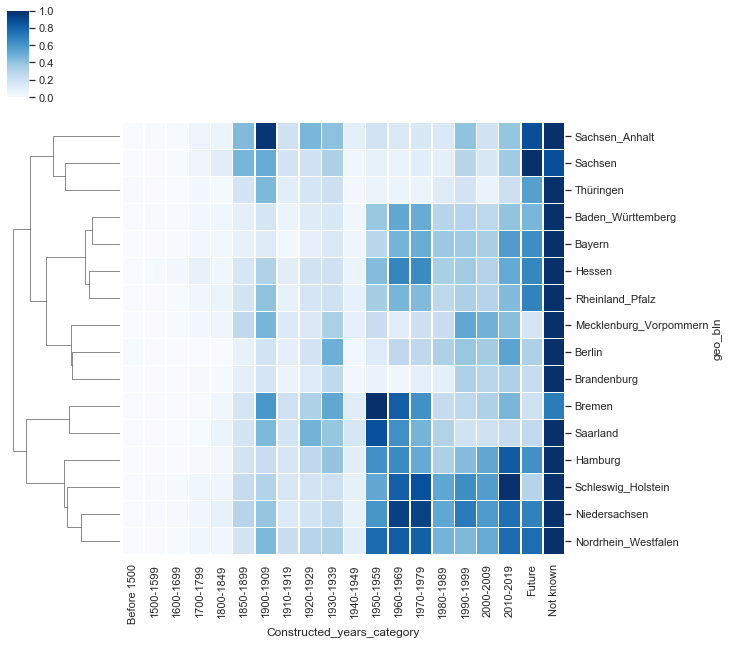

In [100]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and construction year

This confirms the previous observation, between 1910-1919 and 1940-1949 there is almost no building activity. Interestingly: After WW2 the building activity starts again, but not in all regions. Eastern Germany (Brandenburg, Sachsen, Mecklenburg-Vorpommern, Thüringen, Sachsen-Anhalt and Berlin) seems to have less activity in those years. That could be due to the fact that the GDR did not pursued in building new family-houses after the second WW2.

Also interesting is the clustering on the side: One cluster for Brandenburg, Mecklenburg-Vorpommern, Sachsen Anhalt and Sachsen and the other regions in the other cluster.

In [101]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='obj_purchasePrice')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

Constructed_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                    
Baden_Württemberg             763333.33  571149.98  439062.22  466530.16   
Bayern                        829272.73  990883.30  754989.11  717323.88   
Berlin                        362000.00       0.00  530000.00  860000.00   
Brandenburg                        0.00       0.00   48000.00 1016432.73   
Bremen                             0.00       0.00  510000.00  449000.00   
Hamburg                            0.00       0.00       0.00  479166.67   
Hessen                        674000.00  386680.00  381939.02  283272.22   
Mecklenburg_Vorpommern        637120.00   45000.00  249033.33  457706.45   
Niedersachsen                 815000.00  465521.74  388868.48  451482.88   
Nordrhein_Westfalen           852612.50  345100.00  397030.33  372711.90   
Rheinland_Pfalz               800700.00  304777.78  236756.09  271088.01   
Saarland                           0.00       0.00       0.00  279333.33   
Sachsen                       466900.00  450750.00  171214.29  303517.42   
Sachsen_Anhalt               5552000.00  359307.69  191415.42  661578.03   
Schleswig_Holstein                 0.00  801625.00  771160.00  780185.48   
Thüringen                      42200.00  750000.00  238200.00  121376.72   

Constructed_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                  
Baden_Württemberg           459726.79  611290.09  569429.66  622385.56   
Bayern                      589072.35 1252734.74  497990.98 1163918.13   
Berlin                     3349500.00 2907557.47 2521567.16 2470076.62   
Brandenburg                 494598.48  366026.50  411963.51  382528.61   
Bremen                      442993.00  619681.82  349914.77  430272.78   
Hamburg                    1649454.55 2596794.52 2619644.44 1256430.77   
Hessen                      331434.59  715372.34  483971.58  665253.87   
Mecklenburg_Vorpommern      462349.21  292518.40  206553.79  303342.82   
Niedersachsen               216840.73  251242.94  278330.37  290666.84   
Nordrhein_Westfalen         368025.94  370181.32  373036.05  421141.03   
Rheinland_Pfalz             220938.42  209674.97  211365.66  228223.74   
Saarland                    111552.43  161931.82  170509.30  173578.64   
Sachsen                     156511.00  232111.40  291251.03  346338.85   
Sachsen_Anhalt              119150.83  136769.91  118277.90  194146.78   
Schleswig_Holstein          533832.88  522349.86  391257.43  437620.09   
Thüringen                   189236.54  155326.08  141766.15  188392.41   

Constructed_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                  
Baden_Württemberg           586510.28  577495.52  488939.57  534540.24   
Bayern                      503878.75  586760.31  513623.33  550634.94   
Berlin                     1156705.72 1012142.61  602242.42  927922.76   
Brandenburg                 400322.88  360432.77  244122.92  205479.57   
Bremen                      332438.07  310015.26  260066.67  285150.81   
Hamburg                    1533961.11  668090.69  582232.56  603635.86   
Hessen                      435138.20  389618.45  280192.63  474138.60   
Mecklenburg_Vorpommern      238406.93  194891.28  187216.22  187579.07   
Niedersachsen               274997.17  243654.93  324307.60  248746.37   
Nordrhein_Westfalen         390721.99  377580.06  372772.49  444471.89   
Rheinland_Pfalz             228562.37  243079.91  193064.95  269538.37   
Saarland                    161370.16  236549.20  199906.14  201552.13   
Sachsen                     305057.08  280163.18  191093.90  217978.31   
Sachsen_Anhalt              163037.32  152189.08  141892.09  129143.19   
Schleswig_Holstein          402336.26  344569.29  364100.77  360410.66   
Thüringen                   147250.38  1

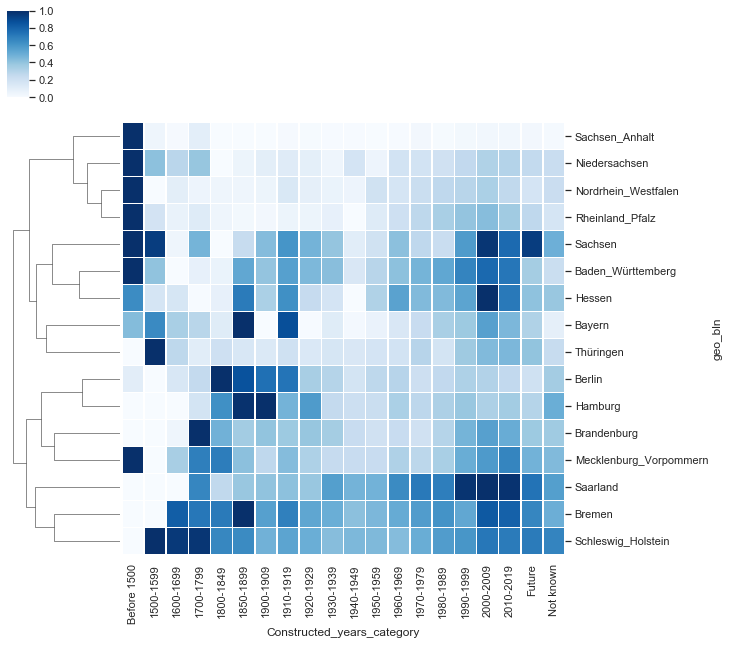

In [102]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and construction year

Older houses (<1800) are more expensive. That could be due to the fact that these houses are old castles. Newer houses build 2000-2009 seem to be expensive as well.

In [103]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_livingSpace'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='obj_livingSpace')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

Constructed_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                    
Baden_Württemberg                289.23     269.41     220.72     231.19   
Bayern                           466.73     366.48     376.13     315.77   
Berlin                           212.91       0.00     114.00     293.28   
Brandenburg                        0.00       0.00      78.00     370.03   
Bremen                             0.00       0.00      86.00     125.00   
Hamburg                            0.00       0.00       0.00     312.67   
Hessen                           472.50     301.68     237.55     228.82   
Mecklenburg_Vorpommern           218.18     220.00     209.25     408.15   
Niedersachsen                    258.34     277.87     300.09     291.84   
Nordrhein_Westfalen              505.35     277.20     281.49     235.04   
Rheinland_Pfalz                  463.60     167.83     179.36     190.63   
Saarland                           0.00       0.00       0.00     236.33   
Sachsen                          259.64     516.75     243.74     281.84   
Sachsen_Anhalt                  2123.25     515.08     232.74     363.34   
Schleswig_Holstein                 0.00     314.62     267.09     247.23   
Thüringen                        228.44     314.00     337.20     188.59   

Constructed_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                  
Baden_Württemberg              219.57     244.95     222.49     229.38   
Bayern                         254.91     257.92     233.92     295.54   
Berlin                         670.00     535.63     628.64     577.13   
Brandenburg                    316.43     320.34     278.63     251.50   
Bremen                         264.43     221.20     244.75     227.10   
Hamburg                        460.91     429.79     309.31     261.34   
Hessen                         235.08     239.93     245.71     218.92   
Mecklenburg_Vorpommern         388.39     263.97     222.08     249.10   
Niedersachsen                  205.77     238.52     446.53     239.15   
Nordrhein_Westfalen            230.50     238.69     259.31     230.12   
Rheinland_Pfalz                193.25     664.43     185.01     191.59   
Saarland                       164.32     197.00     183.67     167.98   
Sachsen                        184.75     289.96     312.47     329.23   
Sachsen_Anhalt                 198.63     258.62     225.22     252.09   
Schleswig_Holstein             218.53     230.09     220.75     210.35   
Thüringen                      302.21     263.34     229.10     243.60   

Constructed_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                  
Baden_Württemberg              205.58     189.81     187.64     182.18   
Bayern                         201.33     190.17     208.95     193.96   
Berlin                         253.29     175.19     133.88     210.56   
Brandenburg                    215.01     164.51     154.78     164.08   
Bremen                         138.41     153.73     130.27     131.76   
Hamburg                        228.33     147.45     150.47     125.89   
Hessen                         186.00     172.92     183.07     187.50   
Mecklenburg_Vorpommern         227.92     199.00     150.69     160.08   
Niedersachsen                  207.48     183.81     203.00     161.53   
Nordrhein_Westfalen            209.05     194.45     212.08     245.48   
Rheinland_Pfalz                183.02     173.42     166.51     187.86   
Saarland                       165.57     181.85     179.01     171.96   
Sachsen                        272.84     211.76     187.21     236.46   
Sachsen_Anhalt                 201.19     167.62     165.16     158.19   
Schleswig_Holstein             183.76     148.53     150.09     167.33   
Thüringen                      193.60   

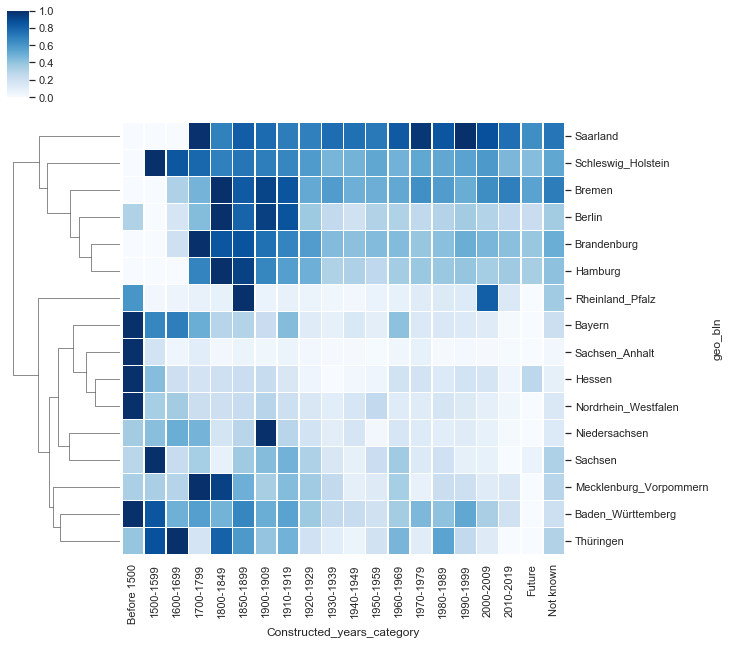

In [104]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average size of houses by Region and construction year

In the old days, houses tended to be bigger than nowadays. An exception is Saarland, were houses are big throughout all the years. 

In [105]:
#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(lastRefurbish_years_category = df_full['obj_lastRefurbish'].apply(transform_years))
df_full[['obj_lastRefurbish','lastRefurbish_years_category']].head(10)

obj_lastRefurbish lastRefurbish_years_category
0                nan                    Not known
1                nan                    Not known
2                nan                    Not known
3            2015.00                    2010-2019
4                nan                    Not known
5                nan                    Not known
6                nan                    Not known
7                nan                    Not known
8                nan                    Not known
9                nan                    Not known

In [106]:
grouped = df_full.groupby('lastRefurbish_years_category').mean()
grouped = grouped[['obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('lastRefurbish_years_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['lastRefurbish_years_category','URL']], left_on='lastRefurbish_years_category', right_on='lastRefurbish_years_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('lastRefurbish_years_category', ascending=False).reset_index(drop="True")
grouped

lastRefurbish_years_category  obj_lastRefurbish  obj_yearConstructed  \
0                     Not known                nan              1971.84   
1                        Future            2035.16              2000.97   
2                   Before 1500             820.60              1955.00   
3                     2010-2019            2015.68              1957.62   
4                     2000-2009            2004.80              1944.40   
5                     1990-1999            1994.97              1931.12   
6                     1980-1989            1984.20              1928.31   
7                     1970-1979            1974.11              1922.19   
8                     1960-1969            1963.79              1912.46   
9                     1950-1959            1953.93              1893.62   
10                    1940-1949            1943.82              1904.35   
11                    1930-1939            1934.00              1902.11   
12                    1920-1929            1925.75              1907.50   
13                    1910-1919            1912.71              1923.00   
14                    1900-1909            1902.00              1888.12   
15                    1850-1899            1883.00              1850.00   
16                    1800-1849            1800.00              1800.00   

    obj_purchasePrice  obj_livingSpace  obj_lotArea  obj_noParkSpaces  \
0           460446.75           203.79      1418.24              2.89   
1           716216.21           206.37       803.40              2.18   
2           528400.00           237.80       293.00               nan   
3           560423.13           216.83      1308.29              2.63   
4           500501.83           211.91      1508.25              2.63   
5           391612.85           219.52      2496.83              2.79   
6           412070.69           472.22      1490.40              2.68   
7           344557.15           190.01      1440.85             16.76   
8           377892.33           190.66       952.11              2.23   
9           229578.57           177.01      4367.34              1.88   
10          429431.82           224.18       974.41              5.33   
11          410666.67           365.38      1293.67              2.25   
12          262000.00           257.50       970.75              2.00   
13          303785.71           230.86      1956.43              2.33   
14          276777.78           225.22       241.33              2.86   
15          239000.00           216.00       953.00               nan   
16           80000.00           120.00      3087.00               nan   

    obj_noRooms  obj_numberOfFloors  obj_picturecount  ...  obj_thermalChar  \
0          6.42                2.16             12.33  ...           143.93   
1          6.70                2.25             11.38  ...            79.14   
2          9.20                3.00              8.20  ...              nan   
3          7.44                2.37             18.17  ...           154.72   
4          7.43                2.35             16.69  ...           177.55   
5          8.14                2.26             15.62  ...           201.80   
6          7.17                2.24             15.52  ...           238.34   
7          7.13                2.18             14.84  ...           248.86   
8          6.90                2.26             13.07  ...           287.25   
9          7.56                2.31             12.46  ...           323.18   
10         6.27                2.88              8.73  ...           251.65   
11        14.89                2.33              6.78  ...           139.75   
12        10.25                2.33             10.00  ...           178.95   
13         8.43                2.50              9.43  ...           220.17   
14         9.17                2.12              7.33  ...              nan   
15         7.00                 nan             10.00  ...              n

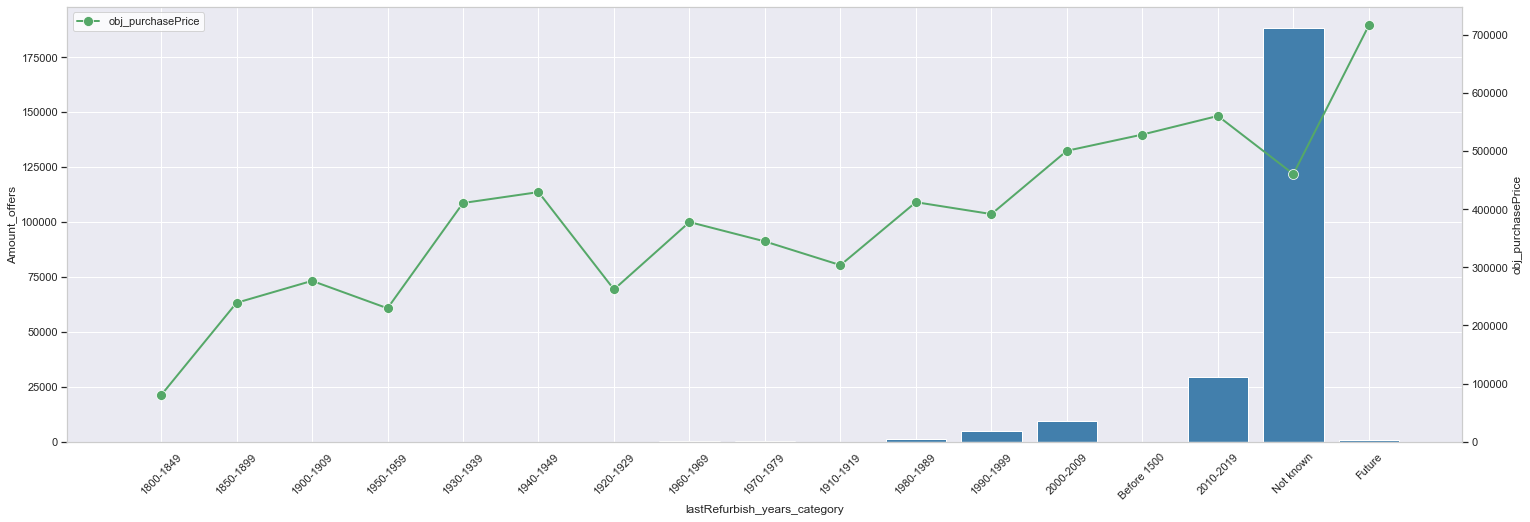

In [107]:
sns.set(font_scale = 1.2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 2, 'lines.markersize': 10})
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_yearConstructed')
ax= sns.barplot(x = 'lastRefurbish_years_category', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'lastRefurbish_years_category', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
ax.xaxis.grid(True)
plt.show()

## ↑ Average price and amount by renovation year.

no clear pattern, except that the houses become more expensive

(1900, 2020)

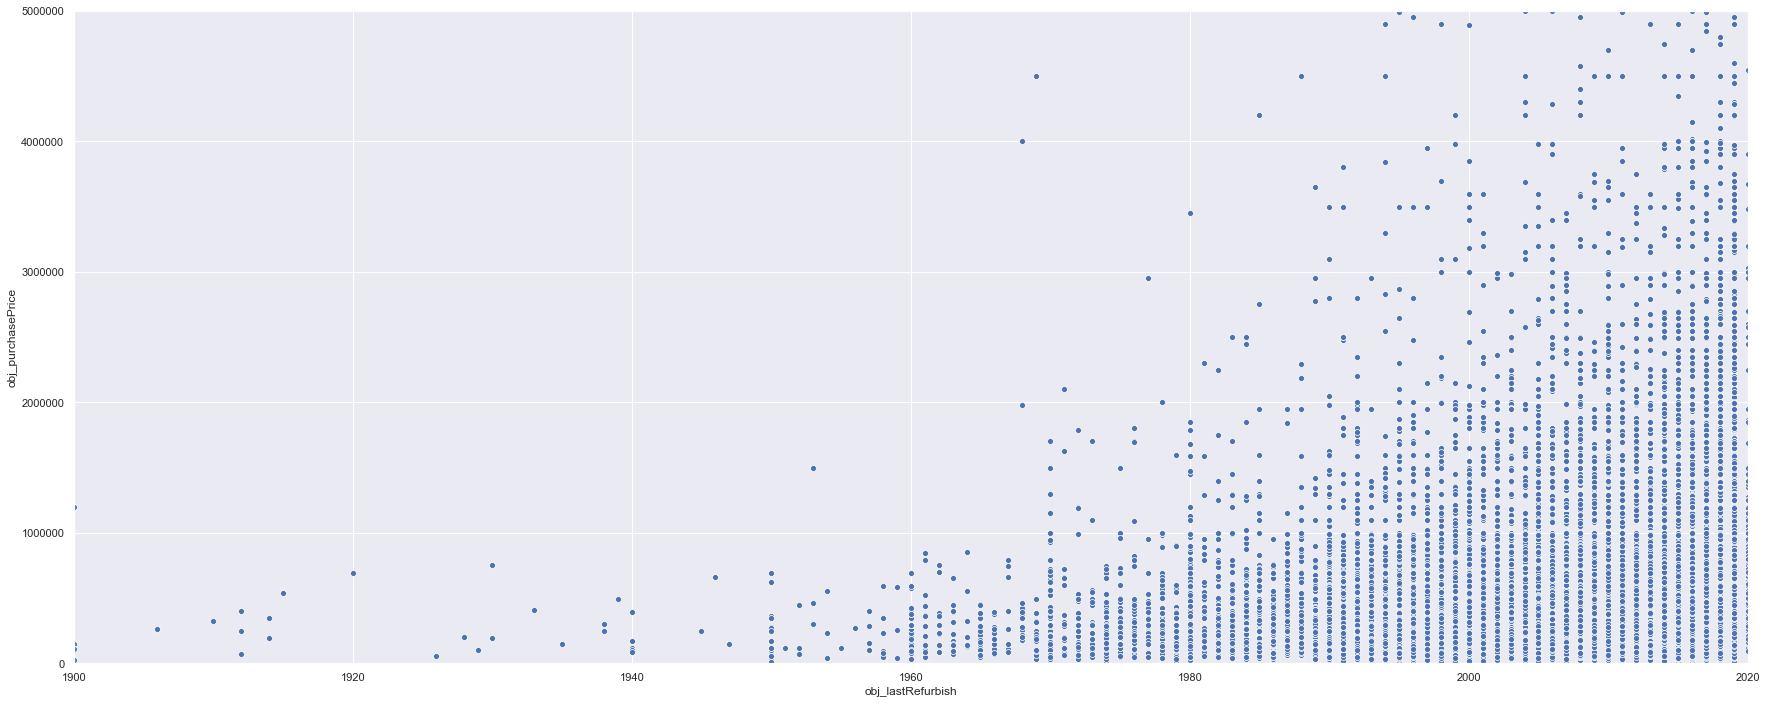

In [108]:
sns.set(font_scale = 1)
plt.figure(figsize=(30,12))
sns.scatterplot(x = 'obj_lastRefurbish', y = 'obj_purchasePrice', data=df_full)
plt.ylim(0, 5000000)
plt.xlim(1900, 2020)

In [109]:
grouped = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['lastRefurbish_years_category','geo_bln'], right_on=['lastRefurbish_years_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['lastRefurbish_years_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='lastRefurbish_years_category', values='Amount_offers')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

lastRefurbish_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                      
Baden_Württemberg                    0.00       0.00       0.00       0.00   
Bayern                               0.00       0.00       0.00       0.00   
Berlin                               0.00       0.00       0.00       0.00   
Brandenburg                          0.00       0.00       0.00       0.00   
Bremen                               0.00       0.00       0.00       0.00   
Hamburg                              0.00       0.00       0.00       0.00   
Hessen                               0.00       0.00       0.00       0.00   
Mecklenburg_Vorpommern               0.00       0.00       0.00       0.00   
Niedersachsen                        3.00       0.00       0.00       0.00   
Nordrhein_Westfalen                  1.00       0.00       0.00       0.00   
Rheinland_Pfalz                      0.00       0.00       0.00       0.00   
Saarland                             0.00       0.00       0.00       0.00   
Sachsen                              1.00       0.00       0.00       0.00   
Sachsen_Anhalt                       0.00       0.00       0.00       0.00   
Schleswig_Holstein                   0.00       0.00       0.00       0.00   
Thüringen                            0.00       0.00       0.00       0.00   

lastRefurbish_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                    
Baden_Württemberg                  0.00       0.00       0.00       2.00   
Bayern                             0.00       0.00       0.00       0.00   
Berlin                             0.00       0.00       0.00       0.00   
Brandenburg                        0.00       0.00       0.00       1.00   
Bremen                             0.00       0.00       0.00       0.00   
Hamburg                            0.00       0.00       0.00       0.00   
Hessen                             0.00       0.00       0.00       0.00   
Mecklenburg_Vorpommern             0.00       0.00       0.00       1.00   
Niedersachsen                      0.00       0.00       0.00       0.00   
Nordrhein_Westfalen                0.00       0.00       7.00       2.00   
Rheinland_Pfalz                    0.00       0.00       0.00       1.00   
Saarland                           0.00       0.00       0.00       0.00   
Sachsen                            1.00       0.00       2.00       0.00   
Sachsen_Anhalt                     0.00       0.00       0.00       0.00   
Schleswig_Holstein                 0.00       1.00       0.00       0.00   
Thüringen                          0.00       0.00       0.00       0.00   

lastRefurbish_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                    
Baden_Württemberg                  0.00       0.00       0.00      13.00   
Bayern                             1.00       1.00       2.00       5.00   
Berlin                             0.00       0.00       0.00       2.00   
Brandenburg                        0.00       0.00       0.00       0.00   
Bremen                             0.00       0.00       0.00       0.00   
Hamburg                            0.00       2.00      12.00       0.00   
Hessen                             0.00       1.00       0.00       5.00   
Mecklenburg_Vorpommern             0.00       2.00       0.00       0.00   
Niedersachsen                      0.00       0.00       0.00       1.00   
Nordrhein_Westfalen                0.00       2.00       2.00      15.00   
Rheinland_Pfalz                    0.00       0.00       1.00       4.00   
Saarland                           1.00       0.00       0.00       6.00   
Sachsen                            1.00       1.00       5.00       1.00   
Sachsen_Anhalt                     0.00       0.00       0.00       1.00   
Schleswig_

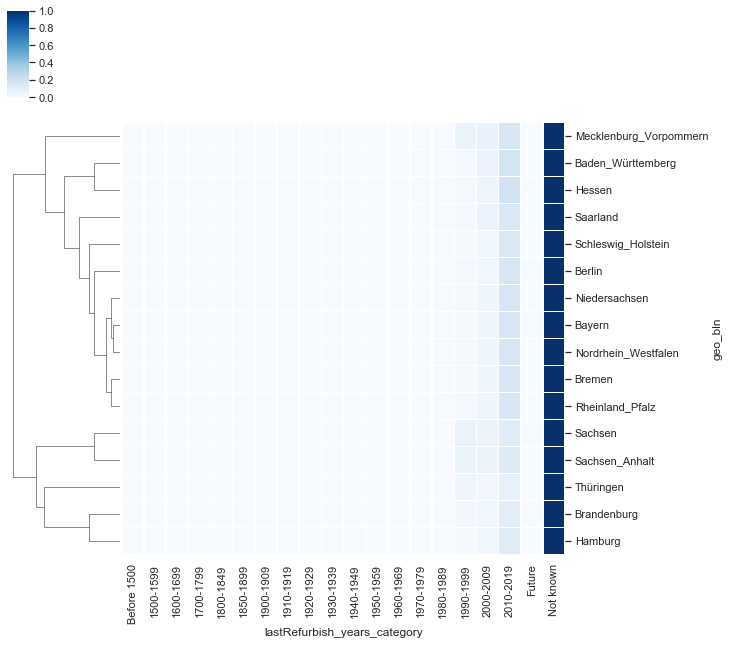

In [110]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and renovation year

For sure, houses tend to be renovated within the last 30 years. For many offers, the values are not known.

In [111]:
grouped = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='lastRefurbish_years_category', values='obj_purchasePrice')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

lastRefurbish_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                      
Baden_Württemberg                    0.00       0.00       0.00       0.00   
Bayern                               0.00       0.00       0.00       0.00   
Berlin                               0.00       0.00       0.00       0.00   
Brandenburg                          0.00       0.00       0.00       0.00   
Bremen                               0.00       0.00       0.00       0.00   
Hamburg                              0.00       0.00       0.00       0.00   
Hessen                               0.00       0.00       0.00       0.00   
Mecklenburg_Vorpommern               0.00       0.00       0.00       0.00   
Niedersachsen                   269000.00       0.00       0.00       0.00   
Nordrhein_Westfalen            1800000.00       0.00       0.00       0.00   
Rheinland_Pfalz                      0.00       0.00       0.00       0.00   
Saarland                             0.00       0.00       0.00       0.00   
Sachsen                          35000.00       0.00       0.00       0.00   
Sachsen_Anhalt                       0.00       0.00       0.00       0.00   
Schleswig_Holstein                   0.00       0.00       0.00       0.00   
Thüringen                            0.00       0.00       0.00       0.00   

lastRefurbish_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                    
Baden_Württemberg                  0.00       0.00       0.00  374500.00   
Bayern                             0.00       0.00       0.00       0.00   
Berlin                             0.00       0.00       0.00       0.00   
Brandenburg                        0.00       0.00       0.00  325500.00   
Bremen                             0.00       0.00       0.00       0.00   
Hamburg                            0.00       0.00       0.00       0.00   
Hessen                             0.00       0.00       0.00       0.00   
Mecklenburg_Vorpommern             0.00       0.00       0.00  195000.00   
Niedersachsen                      0.00       0.00       0.00       0.00   
Nordrhein_Westfalen                0.00       0.00  180428.57  159000.00   
Rheinland_Pfalz                    0.00       0.00       0.00  539000.00   
Saarland                           0.00       0.00       0.00       0.00   
Sachsen                        80000.00       0.00  614000.00       0.00   
Sachsen_Anhalt                     0.00       0.00       0.00       0.00   
Schleswig_Holstein                 0.00  239000.00       0.00       0.00   
Thüringen                          0.00       0.00       0.00       0.00   

lastRefurbish_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                    
Baden_Württemberg                  0.00       0.00       0.00  335923.08   
Bayern                        100000.00  195000.00  255000.00  236000.00   
Berlin                             0.00       0.00       0.00 1045000.00   
Brandenburg                        0.00       0.00       0.00       0.00   
Bremen                             0.00       0.00       0.00       0.00   
Hamburg                            0.00  407000.00  660000.00       0.00   
Hessen                             0.00  248000.00       0.00  194400.00   
Mecklenburg_Vorpommern             0.00  750000.00       0.00       0.00   
Niedersachsen                      0.00       0.00       0.00   29000.00   
Nordrhein_Westfalen                0.00  397000.00  209000.00  118733.33   
Rheinland_Pfalz                    0.00       0.00   98500.00  196750.00   
Saarland                      198000.00       0.00       0.00  136166.67   
Sachsen                        55000.00  145000.00  100200.00   29000.00   
Sachsen_Anhalt                     0.00       0.00       0.00   39000.00   
Schleswig_

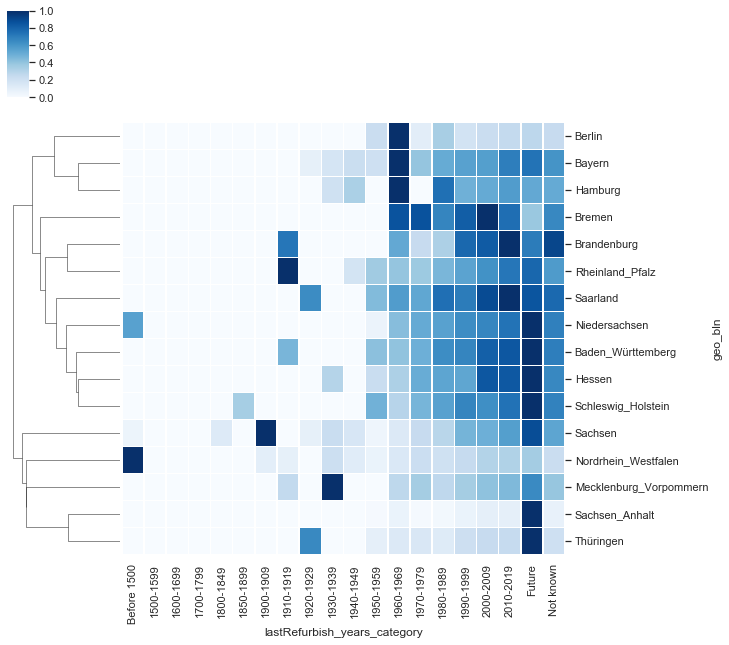

In [112]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and renovation year

And houses are getting more expensive over the years.

In [113]:
df_full['obj_pricetrend'] = pd.to_numeric(df_full['obj_pricetrend'],errors='coerce')
df_full['obj_pricetrend'].head()

0   8.28
1   7.33
2   5.64
3   6.68
4   1.85
Name: obj_pricetrend, dtype: float64

In [114]:
#Transform method taking points as param
def transform_trend(pricetrend):
    if pricetrend < 2:
        return "Below 2"
    elif pricetrend >= 2 and pricetrend < 5:
        return "2-4" 
    elif pricetrend >= 5 and pricetrend < 8:
        return "5-7"  
    elif pricetrend >= 8 and pricetrend < 11:
        return "8-10" 
    elif pricetrend >= 11 and pricetrend < 14:
        return "11-13" 
    elif pricetrend >= 14 and pricetrend < 17:
        return "14-16" 
    elif pricetrend >= 17 and pricetrend < 20:
        return "17-19" 
    elif pricetrend > 19:
        return "Above or erqual 20"
    else:
        return "Not known"

#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(obj_pricetrend_category = df_full['obj_pricetrend'].apply(transform_trend))
df_full[['obj_pricetrend','obj_pricetrend_category']].head(10)

obj_pricetrend obj_pricetrend_category
0            8.28                    8-10
1            7.33                     5-7
2            5.64                     5-7
3            6.68                     5-7
4            1.85                 Below 2
5            5.95                     5-7
6             nan               Not known
7            9.36                    8-10
8            0.78                 Below 2
9            2.03                     2-4

## ↑ For the pricetrend we need to create categories as well.

In [115]:
grouped = df_full.groupby('obj_pricetrend_category').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_pricetrend_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_pricetrend_category','URL']], left_on='obj_pricetrend_category', right_on='obj_pricetrend_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_pricetrend_category', ascending=False).reset_index(drop="True")
grouped

obj_pricetrend_category  obj_pricetrend  obj_lastRefurbish  \
0               Not known             nan            2008.03   
1                 Below 2           -0.01            2008.59   
2      Above or erqual 20           21.60            2004.30   
3                    8-10            9.25            2010.28   
4                     5-7            6.55            2010.46   
5                     2-4            3.84            2009.33   
6                   17-19           18.02            2009.16   
7                   14-16           15.01            2009.55   
8                   11-13           12.26            2010.40   

   obj_yearConstructed  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0              1968.16          349573.65           209.38      1946.44   
1              1948.89          295359.46           211.82      1467.15   
2              1967.18          347324.35           197.30       774.15   
3              1970.75          543267.06           214.33      1119.40   
4              1968.75          497811.61           201.74      1484.15   
5              1960.47          422670.38           208.68      1254.38   
6              1959.66          473462.09           190.76      1153.45   
7              1971.42          616613.59           220.22      1163.04   
8              1970.39          610432.15           198.62      1278.35   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  ...  obj_thermalChar  \
0              2.58         6.56                2.03  ...           139.00   
1              6.33         7.13                2.19  ...           167.02   
2              2.05         6.68                2.33  ...           165.41   
3              2.36         6.66                2.28  ...           151.57   
4              2.54         6.49                2.24  ...           152.02   
5              4.18         6.80                2.23  ...           160.09   
6              2.21         6.33                2.20  ...           135.24   
7              2.45         7.15                2.22  ...           137.26   
8              2.29         6.63                2.32  ...           143.92   

   obj_usableArea  word_count  word_count_upper  beschreibung_length  \
0          159.88      336.89              4.43              2691.61   
1          162.62      312.47              4.66              2479.43   
2          133.53      335.69              3.64              2629.22   
3          111.72      353.66              4.72              2775.46   
4          120.84      354.95              4.74              2794.55   
5          127.77      329.82              4.58              2605.44   
6          150.07      318.86              4.67              2487.88   
7          146.32      345.60              4.12              2713.59   
8          127.26      338.58              4.32              2655.75   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              1809.14                 571.85                     63.15   
1              1546.20                 494.76                     66.84   
2              2048.97                 624.66                     67.70   
3              2898.54                1093.75                     71.58   
4              2719.61                 962.44                     73.31   
5              2204.53                 770.37                     71.43   
6              2463.32                 874.78                     80.65   
7              3072.32                1110.71                     76.70   
8              3132.75                1135.93                     73.36   

   bev_pro_km2  Amount_offers  
0       428.85          41590  
1       372.76          11463  
2       702.66            112  
3       813.15          53878  
4       822.78          74993  
5       592.29          30249  
6      1043.21            283  
7       971.28           4379  
8      1067.19          18240  

[9 rows x 22 columns]

In [116]:
grouped = df_full.groupby(['obj_pricetrend_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_pricetrend_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_pricetrend_category','geo_bln'], right_on=['obj_pricetrend_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_pricetrend_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_pricetrend_category', values='Amount_offers')
grouped = grouped.reindex(['Below 2','2-4','5-7','8-10','11-13','14-16','17-19','Above or erqual 20','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

obj_pricetrend_category  Below 2     2-4      5-7     8-10   11-13   14-16  \
geo_bln                                                                      
Baden_Württemberg         479.00 2365.00  6571.00 10280.00 4536.00  434.00   
Bayern                   1214.00 4300.00  9605.00  7157.00 1997.00  238.00   
Berlin                      0.00    0.00     0.00   273.00 3776.00  432.00   
Brandenburg               282.00  676.00   955.00  2678.00 2826.00 1449.00   
Bremen                      1.00  339.00  1212.00    12.00    1.00    0.00   
Hamburg                     7.00  156.00  2400.00   108.00    8.00    1.00   
Hessen                   1903.00 2726.00  6480.00  6352.00  555.00   10.00   
Mecklenburg_Vorpommern    293.00  335.00   850.00  1092.00  392.00   11.00   
Niedersachsen             639.00 3462.00 10930.00  7307.00 1820.00  225.00   
Nordrhein_Westfalen       894.00 8169.00 22482.00  9874.00  229.00    7.00   
Rheinland_Pfalz          1630.00 3492.00  4148.00  3812.00  910.00  201.00   
Saarland                 1787.00 1155.00   568.00     3.00    0.00    0.00   
Sachsen                  1575.00 1893.00  2353.00   404.00   68.00  785.00   
Sachsen_Anhalt            565.00  678.00   954.00   836.00  396.00  275.00   
Schleswig_Holstein         11.00  275.00  5176.00  3435.00  522.00  286.00   
Thüringen                 183.00  228.00   309.00   255.00  204.00   25.00   

obj_pricetrend_category  17-19  Above or erqual 20  Not known  
geo_bln                                                        
Baden_Württemberg         6.00                0.00    1905.00  
Bayern                   18.00                0.00    3885.00  
Berlin                    0.00                0.00     679.00  
Brandenburg              42.00               81.00    2650.00  
Bremen                    0.00                0.00     160.00  
Hamburg                   0.00                0.00      90.00  
Hessen                    0.00                0.00    1711.00  
Mecklenburg_Vorpommern    5.00                0.00    2778.00  
Niedersachsen             0.00                0.00    3800.00  
Nordrhein_Westfalen       0.00                0.00    2750.00  
Rheinland_Pfalz           2.00                0.00    6500.00  
Saarland                  0.00                0.00     295.00  
Sachsen                 131.00               14.00    5248.00  
Sachsen_Anhalt           45.00                0.00    4400.00  
Schleswig_Holstein       13.00                0.00    1401.00  
Thüringen                21.00               17.00    3338.00

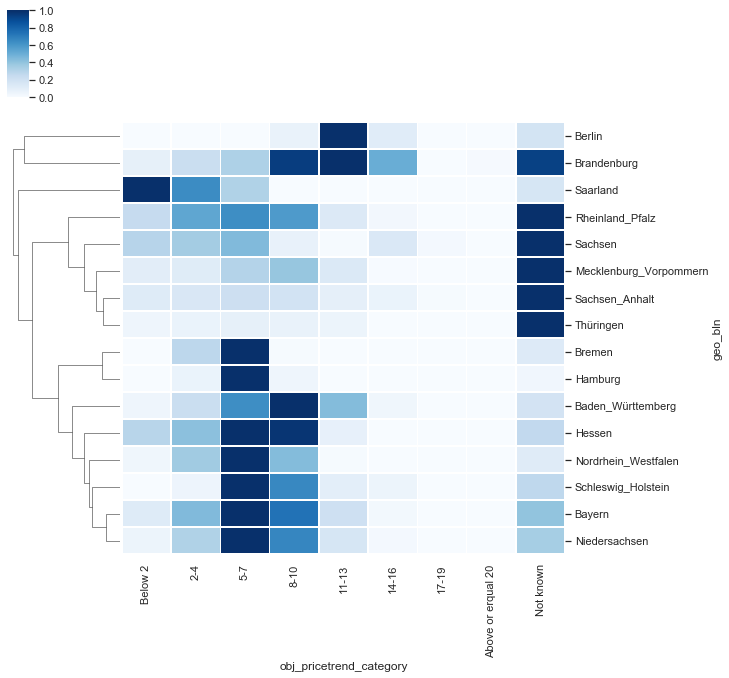

In [117]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and pricetrend

Most of the houses with a pricetrend seem to sit in the 5-7 and 8-10 category. Interestingly: Berlin and Brandenburg have most of their houses are in the 11-13 category - becoming more expensive at a faster pace over time.

In [118]:
grouped = df_full.groupby(['obj_pricetrend_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_pricetrend_category', values='obj_purchasePrice')
grouped = grouped.reindex(['Below 2','2-4','5-7','8-10','11-13','14-16','17-19','Above or erqual 20','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

obj_pricetrend_category    Below 2       2-4       5-7       8-10      11-13  \
geo_bln                                                                        
Baden_Württemberg        356563.02 481414.72 608344.62  597056.77  625271.43   
Bayern                   421944.03 832637.45 773158.42  652361.72  654941.08   
Berlin                        0.00      0.00      0.00  756050.78  953542.10   
Brandenburg              248237.38 346936.43 368843.96  462274.33  442524.50   
Bremen                   549000.00 267725.18 384067.09  606325.00  429000.00   
Hamburg                 5607857.14 511808.69 941157.34 1843453.39 1518750.00   
Hessen                   220110.03 315137.17 582881.78  758145.17  836714.51   
Mecklenburg_Vorpommern   219301.06 263516.08 315091.13  370629.86  407879.88   
Niedersachsen            269104.00 314681.64 336883.13  381329.41  321472.67   
Nordrhein_Westfalen      405031.29 392520.64 433522.64  538411.53  698031.78   
Rheinland_Pfalz          248561.61 340431.89 354152.56  419930.15  449366.52   
Saarland                 242037.70 240713.42 273560.73  153666.67       0.00   
Sachsen                  353263.30 359779.88 354601.86  401140.94  679095.15   
Sachsen_Anhalt           248437.23 183602.04 200972.51  231851.34  179007.67   
Schleswig_Holstein       379172.73 381409.68 508220.99  423285.48  292611.16   
Thüringen                202624.99 179049.79 251452.42  307765.53  384699.20   

obj_pricetrend_category      14-16      17-19  Above or erqual 20  Not known  
geo_bln                                                                       
Baden_Württemberg        694238.78 1372955.97                0.00  436858.39  
Bayern                   593544.68  601833.33                0.00  576376.50  
Berlin                   940241.92       0.00                0.00 2282016.12  
Brandenburg              600621.91  696526.38           344774.56  263773.73  
Bremen                        0.00       0.00                0.00  335899.38  
Hamburg                 4500000.00       0.00                0.00 3008458.89  
Hessen                  1764400.00       0.00                0.00  481796.20  
Mecklenburg_Vorpommern   347681.82  328420.00                0.00  262935.05  
Niedersachsen            307864.62       0.00                0.00  292212.85  
Nordrhein_Westfalen     6199285.71       0.00                0.00  362569.39  
Rheinland_Pfalz          499006.83  650000.00                0.00  238241.34  
Saarland                      0.00       0.00                0.00  258025.11  
Sachsen                  780684.64  513440.41           280421.43  221677.98  
Sachsen_Anhalt           121753.38  115295.56                0.00  209277.80  
Schleswig_Holstein       309434.84  252423.08                0.00  585446.07  
Thüringen                294023.56  332968.33           414569.88  210602.01

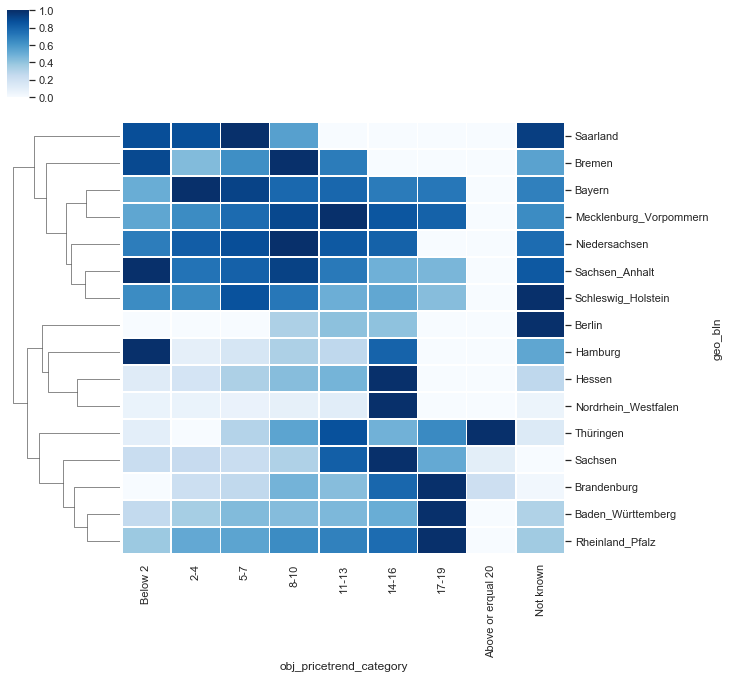

In [119]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and pricetrend

There is no clear pattern in terms of pricing: No indication that pricetrend variable has an influence on the final housing price. 

## Expose features

In [120]:
grouped = df_full.groupby('ga_cd_via').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('ga_cd_via').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['ga_cd_via','URL']], left_on='ga_cd_via', right_on='ga_cd_via')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('ga_cd_via', ascending=False).reset_index(drop="True")
grouped

ga_cd_via  obj_pricetrend  obj_lastRefurbish  obj_yearConstructed  \
0           top            7.35            2009.81              1969.51   
1      standard            7.10            2009.66              1964.26   
2  schaufenster            7.66            2010.35              1984.53   
3       premium            7.61            2010.73              1974.24   

   obj_purchasePrice  obj_livingSpace  obj_lotArea  obj_noParkSpaces  \
0          487436.73           205.88      1525.32              2.88   
1          431502.41           207.28      1370.80              2.86   
2          936361.58           229.75      1091.73              2.21   
3          668931.39           217.09      1288.04              2.79   

   obj_noRooms  obj_numberOfFloors  ...  obj_thermalChar  obj_usableArea  \
0         6.64                2.22  ...           152.71          131.48   
1         6.60                2.19  ...           152.14          126.87   
2         6.37                2.37  ...           115.27          129.35   
3         6.99                2.38  ...           136.76          120.78   

   word_count  word_count_upper  beschreibung_length  price_per_m²_living  \
0      351.69              4.46              2775.16              2607.63   
1      330.28              4.67              2608.54              2329.47   
2      447.12              4.93              3530.12              4230.57   
3      403.97              5.15              3165.30              3198.25   

   price_per_m²_property  obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                 915.10                     71.21       756.42          99858  
1                 811.62                     70.25       664.07         119539  
2                1871.30                     73.88      1093.63           1875  
3                1283.10                     72.80       914.01          13915  

[4 rows x 22 columns]

## ↑ Expose feature - type

There are four categories with different characteristics.

        -Standard: Ordinary expose
        -Top: Placed before all standard exposes
        -Premium: Bigger pictures and enhanced functions
        -Schaufenster: Similar to premium but without advertising of other companies

In [121]:
grouped = df_full.groupby(['ga_cd_via','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['ga_cd_via','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['ga_cd_via','geo_bln'], right_on=['ga_cd_via','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['ga_cd_via','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='ga_cd_via', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

ga_cd_via               premium  schaufenster  standard    top
geo_bln                                                       
Baden_Württemberg          1683           236     13027  11630
Bayern                     1719           338     14796  11561
Berlin                      425           113      1890   2732
Brandenburg                 724            98      5718   5099
Bremen                      132            19       805    769
Hamburg                     262            40      1347   1121
Hessen                     1454           219      9688   8376
Mecklenburg_Vorpommern      354            44      2979   2379
Niedersachsen              1416           108     15911  10748
Nordrhein_Westfalen        2603           340     21618  19844
Rheinland_Pfalz            1338           128     10161   9068
Saarland                    137            17      2236   1418
Sachsen                     517            60      6219   5675
Sachsen_Anhalt              221            26      4781   3121
Schleswig_Holstein          768            64      5483   4804
Thüringen                   162            25      2880   1513

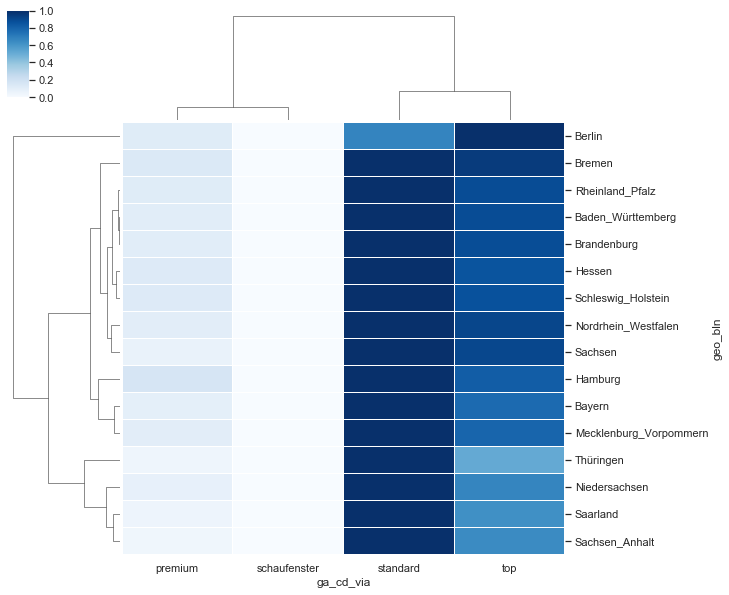

In [122]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and expose type

Modt of the offers are in the standard category. Berlin stand out since they are using the Top and premium category more.

In [123]:
grouped = df_full.groupby(['ga_cd_via','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='ga_cd_via', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

ga_cd_via                 premium  schaufenster   standard        top
geo_bln                                                              
Baden_Württemberg       703205.42     869747.04  568491.92  569905.43
Bayern                 1056274.96    1602432.44  615271.02  728833.87
Berlin                 1288105.32    1386496.16 1185236.23 1031637.98
Brandenburg             550532.08    1013502.19  371228.82  421888.68
Bremen                  423985.86     461116.84  381309.38  320630.11
Hamburg                1251654.23    1080512.25 1085741.84  919474.47
Hessen                  822930.85     835101.33  511957.61  577584.20
Mecklenburg_Vorpommern  405044.03     344089.07  290687.09  292725.97
Niedersachsen           395194.12     625549.93  314370.32  359652.97
Nordrhein_Westfalen     593892.29     786155.55  411699.04  459500.92
Rheinland_Pfalz         439867.73     512787.21  289189.25  345192.22
Saarland                312855.61     339542.24  230148.51  267461.76
Sachsen                 508719.77     455306.77  313367.43  332740.47
Sachsen_Anhalt          429211.31     342125.94  179459.43  230387.08
Schleswig_Holstein      621854.71     827833.97  440568.83  481291.46
Thüringen               411996.46     293322.90  186268.23  281832.44

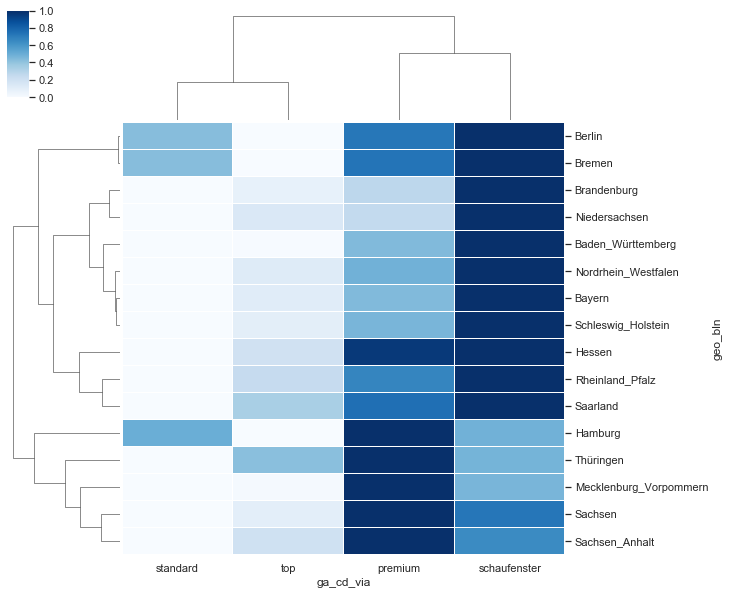

In [124]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and expose type

Clearly, the houses in the Schaufenster category are being most expensive, followed by premium, top and then standard. 

In [125]:
grouped = df_full.groupby('obj_ExclusiveExpose').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_ExclusiveExpose').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_ExclusiveExpose','URL']], left_on='obj_ExclusiveExpose', right_on='obj_ExclusiveExpose')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_ExclusiveExpose', ascending=False).reset_index(drop="True")
grouped

obj_ExclusiveExpose  obj_pricetrend  obj_lastRefurbish  obj_yearConstructed  \
0                true            7.32            2008.58              1981.22   
1               false            7.22            2010.14              1962.54   
2                None            6.95            2008.69              1968.37   

   obj_purchasePrice  obj_livingSpace  obj_lotArea  obj_noParkSpaces  \
0          443297.20           186.93      1146.30              3.44   
1          485405.81           215.68      1542.23              2.65   
2          453307.44           215.34      2019.45              2.78   

   obj_noRooms  obj_numberOfFloors  ...  obj_thermalChar  obj_usableArea  \
0         5.89                2.01  ...           144.55          119.79   
1         6.94                2.30  ...           153.97          130.91   
2         7.44                2.08  ...           129.37          152.35   

   word_count  word_count_upper  beschreibung_length  price_per_m²_living  \
0      383.14              4.23              3075.88              2579.13   
1      329.17              4.76              2576.10              2488.32   
2      385.01              3.55              3054.12              2269.67   

   price_per_m²_property  obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                 793.26                     69.38       583.13          67329  
1                 931.63                     71.57       776.84         167661  
2                 793.69                     72.01       811.82            197  

[3 rows x 22 columns]

In [126]:
grouped = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_ExclusiveExpose','geo_bln'], right_on=['obj_ExclusiveExpose','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_ExclusiveExpose','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_ExclusiveExpose', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_ExclusiveExpose     None    false     true
geo_bln                                       
Baden_Württemberg      26.00 17822.00  8728.00
Bayern                 10.00 20745.00  7659.00
Berlin                  1.00  4001.00  1158.00
Brandenburg            31.00  7385.00  4223.00
Bremen                  0.00  1287.00   438.00
Hamburg                 1.00  2052.00   717.00
Hessen                  9.00 14610.00  5118.00
Mecklenburg_Vorpommern  5.00  4393.00  1358.00
Niedersachsen          16.00 20924.00  7243.00
Nordrhein_Westfalen    67.00 32663.00 11675.00
Rheinland_Pfalz        13.00 14511.00  6171.00
Saarland                0.00  2801.00  1007.00
Sachsen                 8.00  8208.00  4255.00
Sachsen_Anhalt          4.00  5972.00  2173.00
Schleswig_Holstein      3.00  7348.00  3768.00
Thüringen               3.00  2939.00  1638.00

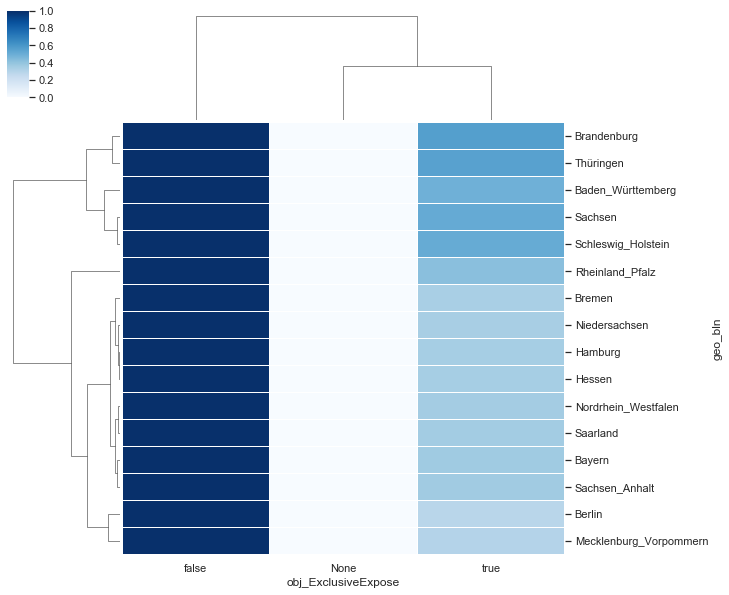

In [127]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and exclusive expose

Most of the houses have no exclusive expose. In Brandenbur is a tendency to exclusive exposes. 

In [128]:
grouped = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_ExclusiveExpose', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_ExclusiveExpose         None      false      true
geo_bln                                              
Baden_Württemberg      647801.15  619916.73 499255.34
Bayern                 607290.00  715693.82 657241.93
Berlin                 920000.00 1168271.69 939097.80
Brandenburg            214612.90  413957.30 404470.18
Bremen                      0.00  364062.55 341774.99
Hamburg                995000.00 1078353.45 907395.77
Hessen                 393683.33  593563.53 488787.20
Mecklenburg_Vorpommern 282779.80  301983.22 289286.65
Niedersachsen          340364.88  332763.42 348814.45
Nordrhein_Westfalen    552779.09  452492.96 429535.51
Rheinland_Pfalz        505846.15  324811.32 324570.03
Saarland                    0.00  248166.42 245672.44
Sachsen                226612.50  319004.60 354232.21
Sachsen_Anhalt          59500.00  197294.56 231156.67
Schleswig_Holstein     374966.67  479906.06 459356.23
Thüringen              208983.33  205243.47 264410.25

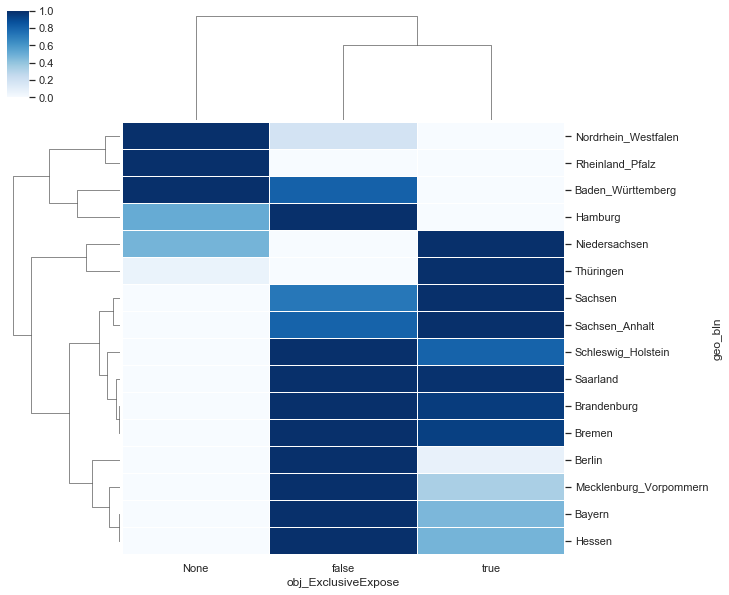

In [129]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and exclusive expose

The exclusivity of the expose has no clear influence on pricing by region.

In [130]:
grouped = df_full.groupby('obj_courtage').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_courtage').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_courtage','URL']], left_on='obj_courtage', right_on='obj_courtage')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_courtage', ascending=False).reset_index(drop="True")
grouped

obj_courtage  obj_pricetrend  obj_lastRefurbish  obj_yearConstructed  \
0         True            7.34            2009.31              1960.37   
1        False            7.07            2012.06              1976.90   

   obj_purchasePrice  obj_livingSpace  obj_lotArea  obj_noParkSpaces  \
0          536970.00           220.26      1499.81              2.83   
1          383166.01           186.71      1359.85              2.97   

   obj_noRooms  obj_numberOfFloors  ...  obj_thermalChar  obj_usableArea  \
0         7.16                2.29  ...           163.46          134.78   
1         6.01                2.12  ...            96.53          119.27   

   word_count  word_count_upper  beschreibung_length  price_per_m²_living  \
0      366.37              4.39              2828.56              2657.42   
1      311.02              4.97              2538.82              2279.67   

   price_per_m²_property  obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                 976.94                     71.14       787.16         135186  
1                 783.36                     70.13       619.73          92435  

[2 rows x 22 columns]

In [131]:
grouped = df_full.groupby(['obj_courtage','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_courtage','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_courtage','geo_bln'], right_on=['obj_courtage','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_courtage','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_courtage', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_courtage            False  True 
geo_bln                             
Baden_Württemberg        9228  16037
Bayern                  10491  17102
Berlin                   1224   3766
Brandenburg              4926   6558
Bremen                    392   1194
Hamburg                   808   1680
Hessen                   8115  10982
Mecklenburg_Vorpommern   2006   3697
Niedersachsen           10168  17459
Nordrhein_Westfalen     18145  23980
Rheinland_Pfalz          9359  10810
Saarland                 1392   2365
Sachsen                  5810   6499
Sachsen_Anhalt           4267   3870
Schleswig_Holstein       3382   7463
Thüringen                2722   1724

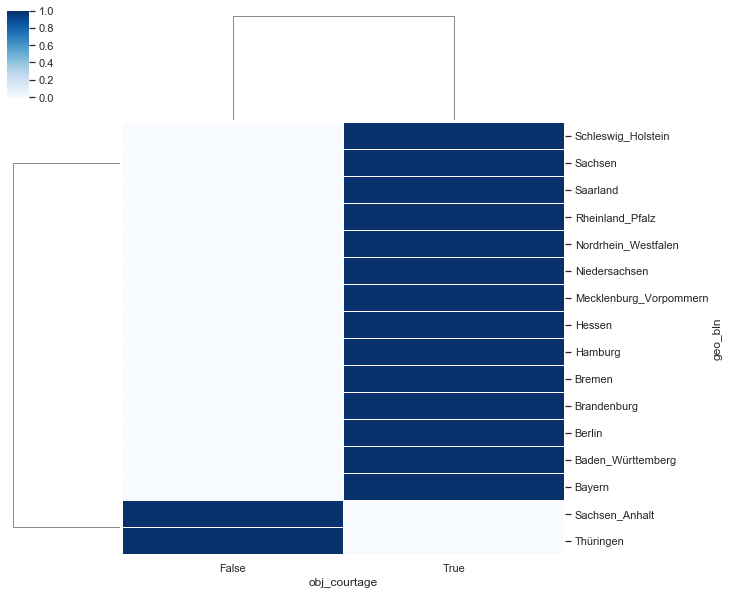

In [132]:

sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and exclusive expose

Most of the houses seem to have a fee.

In [133]:
grouped = df_full.groupby(['obj_courtage','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_courtage', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_courtage               False      True 
geo_bln                                    
Baden_Württemberg      512980.09  630736.92
Bayern                 616136.17  760731.58
Berlin                 867983.66 1224261.98
Brandenburg            310128.70  481477.70
Bremen                 354738.97  387918.69
Hamburg                774161.54 1194968.77
Hessen                 450354.22  659388.70
Mecklenburg_Vorpommern 229392.47  336122.23
Niedersachsen          294376.32  354667.92
Nordrhein_Westfalen    365347.74  515659.12
Rheinland_Pfalz        287658.28  356654.33
Saarland               210367.14  266598.58
Sachsen                262439.30  389644.44
Sachsen_Anhalt         184109.36  230597.58
Schleswig_Holstein     379217.44  512059.85
Thüringen              202224.63  262752.75

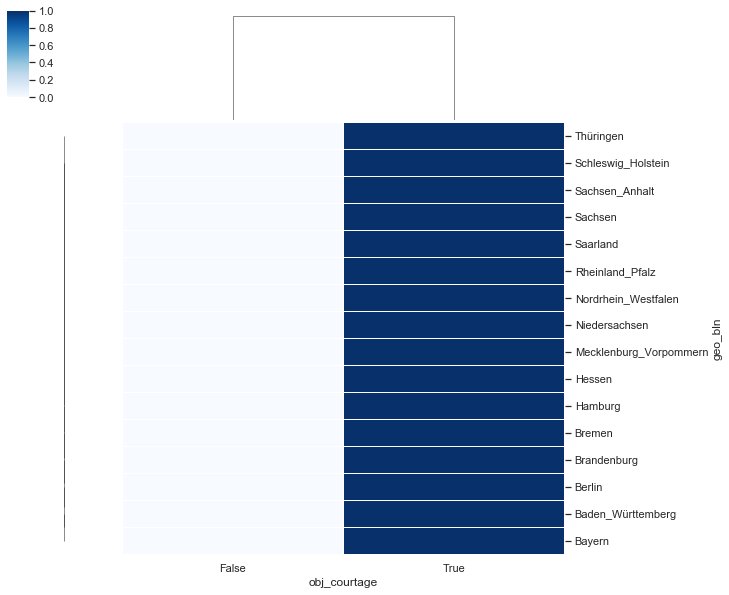

In [134]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and exclusive expose

And these houses seem to be most expensive.

# Lets map it

In [135]:
#Count first
df_full_clean=df_full.dropna(subset=['lat'])
df_full_clean=df_full_clean.dropna(subset=['lon'])
base_map = folium.Map(location=[51.1633987,10.4468737], zoom_start=6)
df_full_clean = df_full_clean.groupby(['lat', 'lon'])['URL'].count().reset_index()
HeatMap(data=df_full_clean[['lat', 'lon', 'URL']], radius=6, max_zoom=13).add_to(base_map)
base_map

In [136]:
#Count first
df_full_clean=df_full.dropna(subset=['lat'])
df_full_clean=df_full_clean.dropna(subset=['lon'])
base_map = folium.Map(location=[51.1633987,10.4468737], zoom_start=6)
df_full_clean = df_full_clean.groupby(['lat', 'lon'])['obj_purchasePrice'].mean().reset_index()
HeatMap(data=df_full_clean[['lat', 'lon', 'obj_purchasePrice']], radius=10, max_zoom=10).add_to(base_map)
base_map

In [137]:
#Purchase_price
df_full_clean=df_full.dropna(subset=['lat'])
df_full_clean=df_full_clean.dropna(subset=['lon'])
base_map = folium.Map(location=[51.1633987,10.4468737], zoom_start=6)
df_full_clean = df_full_clean.groupby(['lat', 'lon'])['obj_purchasePrice'].mean().reset_index()
HeatMap(data=df_full_clean[['lat', 'lon', 'obj_purchasePrice']], radius=10, max_zoom=4).add_to(base_map)
base_map

In [138]:
#Purchase_price
df_full_clean=df_full.dropna(subset=['lat'])
df_full_clean=df_full_clean.dropna(subset=['lon'])
base_map = folium.Map(location=[51.1633987,10.4468737], zoom_start=6)
df_full_clean = df_full_clean.groupby(['lat', 'lon'])['obj_livingSpace'].mean().reset_index()
HeatMap(data=df_full_clean[['lat', 'lon', 'obj_livingSpace']], radius=10, max_zoom=4, blur=15).add_to(base_map)
base_map

# Text Analytics

In [139]:
def clean_text(post):
    soup = BeautifulSoup(post)
    return soup.get_text()

df_full['beschreibung_clean'] = df_full['beschreibung'].apply(clean_text)

In [140]:
def language_detect(post):
    try:
        text = langid.classify(post)
        return text
    except Exception:
        pass

df_full['beschreibung_lang'] = df_full['beschreibung_clean'].apply(language_detect)

In [141]:
df_full['beschreibung_lang_name'] = df_full['beschreibung_lang'].astype(str)
df_full['beschreibung_lang_name'] = df_full['beschreibung_lang_name'].str.split("'", n = 1, expand = True)[1].str.split("'", n = 1, expand = True)[0]

In [142]:
df_full['beschreibung_lang_score'] = df_full['beschreibung_lang']
df_full['beschreibung_lang_score'] = df_full['beschreibung_lang'].astype(str).str.split(",", n = 1, expand = True)[1].str.split(")", n = 1, expand = True)[0]
df_full['beschreibung_lang_score'] = df_full['beschreibung_lang_score'].astype(float)

In [143]:
df_full['beschreibung_polarity'] = df_full.apply(lambda row: TextBlobDE(row.beschreibung_clean).sentiment.polarity if row['beschreibung_lang_name'] in ['de'] else None, axis=1)

In [144]:
df_full['beschreibung_subjectivity'] = df_full.apply(lambda row: TextBlobDE(row.beschreibung_clean).sentiment.subjectivity if row['beschreibung_lang_name'] in ['de'] else None, axis=1)

In [145]:
grouped = df_full.groupby('geo_bln').mean()
grouped = grouped[['beschreibung_polarity','beschreibung_subjectivity']]
grouped = grouped.sort_values('beschreibung_polarity', ascending=False).reset_index()
grouped

geo_bln  beschreibung_polarity  beschreibung_subjectivity
0                   Berlin                   0.29                       0.03
1        Baden_Württemberg                   0.28                       0.03
2              Brandenburg                   0.27                       0.03
3                  Hamburg                   0.27                       0.04
4                   Bayern                   0.26                       0.03
5                   Bremen                   0.26                       0.04
6       Schleswig_Holstein                   0.26                       0.03
7                   Hessen                   0.26                       0.03
8            Niedersachsen                   0.26                       0.03
9                 Saarland                   0.25                       0.03
10         Rheinland_Pfalz                   0.25                       0.03
11     Nordrhein_Westfalen                   0.25                       0.03
12                 Sachsen                   0.24                       0.03
13               Thüringen                   0.23                       0.03
14          Sachsen_Anhalt                   0.22                       0.02
15  Mecklenburg_Vorpommern                   0.21                       0.03

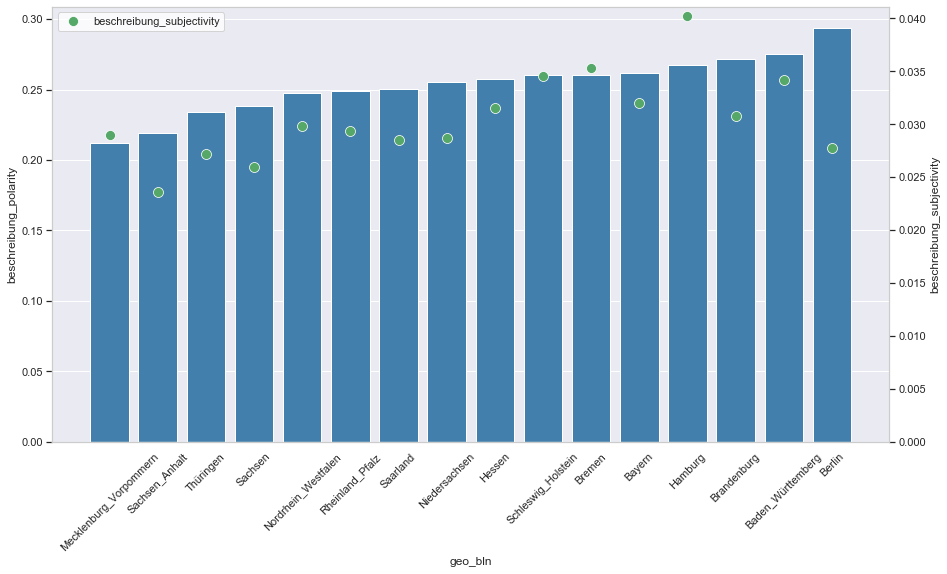

In [146]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('beschreibung_polarity')
ax= sns.barplot(x = 'geo_bln', y = 'beschreibung_polarity',  label='beschreibung_polarity', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'beschreibung_subjectivity', marker="o",  label='beschreibung_subjectivity', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Chart: Polarity and subjectivity of the descriptions

The most positive descriptions can be found in Berlin. On the other end we have Sachsen-Anhalt and Mecklenburg-Vorpommern with the most negative.

In [147]:
text = " ".join(text for text in df_full['beschreibung_clean'])
print ("There are {} words in the combination of all descriptions.".format(len(text)))

There are 639839347 words in the combination of all descriptions.


In [148]:
stop_words_de = get_stop_words('de')

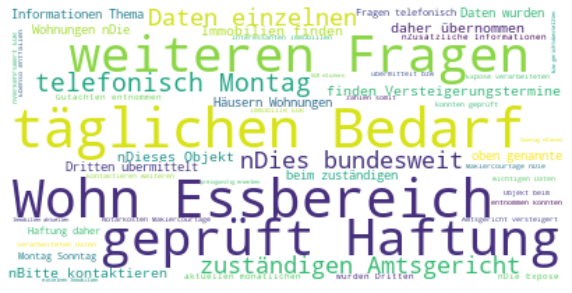

In [149]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Haus", "ca", "m²", "Uhr", "Telefonnummer", "Gäste", "WC", "Zwischenverkauf", "vorbehalten", "Irrtum", "km"])
stopwords.update(stop_words_de)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[10,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 19116826 words in the combination of all descriptions.


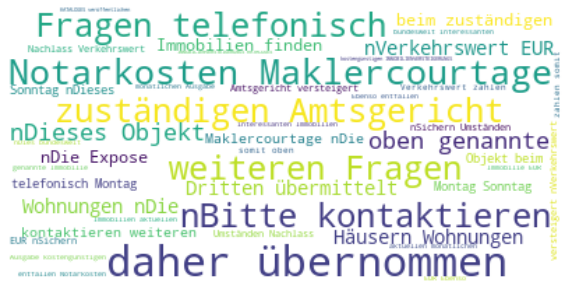

In [150]:
df_full_filter = df_full[df_full.geo_bln=='Sachsen_Anhalt']
text = " ".join(text for text in df_full_filter['beschreibung_clean'])
print ("There are {} words in the combination of all descriptions.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Haus", "ca", "m²", "Uhr", "Telefonnummer", "Gäste", "WC", "Zwischenverkauf", "vorbehalten", "Irrtum", "km"])
stopwords.update(stop_words_de)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[10,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 8275623 words in the combination of all descriptions.


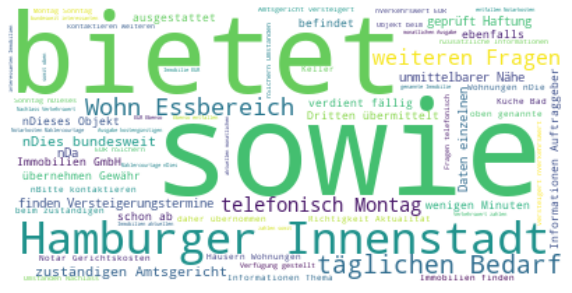

In [151]:
df_full_filter = df_full[df_full.geo_bln=='Hamburg']
text = " ".join(text for text in df_full_filter['beschreibung_clean'])
print ("There are {} words in the combination of all descriptions.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Haus", "ca", "m²", "Uhr", "Telefonnummer", "Gäste", "WC", "Zwischenverkauf", "vorbehalten", "Irrtum", "km"])
stopwords.update(stop_words_de)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[10,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 13494474 words in the combination of all descriptions.


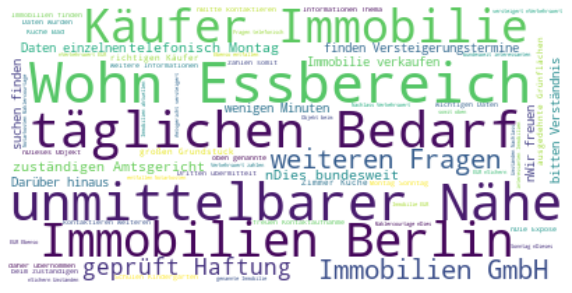

In [152]:
df_full_filter = df_full[df_full.geo_bln=='Berlin']
text = " ".join(text for text in df_full_filter['beschreibung_clean'])
print ("There are {} words in the combination of all descriptions.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Haus", "ca", "m²", "Uhr", "Telefonnummer", "Gäste", "WC", "Zwischenverkauf", "vorbehalten", "Irrtum", "km"])
stopwords.update(stop_words_de)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[10,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [153]:
df_full.to_csv('df_full.CSV',sep=',')

# Clustering

# Forecasting - baseline

## Data Preperation

In [264]:
Model_Performance = {'Model': [], 'Measure': [], 'Score': []}
Model_Performance = DataFrame(Model_Performance,columns= ['Model', 'Measure', 'Score'])
Model_Performance

Empty DataFrame
Columns: [Model, Measure, Score]
Index: []

In [265]:
Housing_ML = df_full

In [266]:
Housing_ML['Timestamp_year'] = Housing_ML['Timestamp'].dt.year
Housing_ML['Timestamp_month'] = Housing_ML['Timestamp'].dt.month
Housing_ML['Timestamp_day'] = Housing_ML['Timestamp'].dt.day
Housing_ML.drop(columns =["Timestamp"], inplace = True) 
Housing_ML.drop(columns =["Generated_index"], inplace = True) 

Housing_ML['geo_plz'] = Housing_ML['geo_plz'].astype(int)

Housing_ML['obj_houseNumber'] = pd.to_numeric(Housing_ML['obj_houseNumber'],errors='coerce')

Housing_ML['obj_pricetrendbuy'] = pd.to_numeric(Housing_ML['obj_pricetrendbuy'],errors='coerce')

Housing_ML = Housing_ML[Housing_ML.columns.difference(['URL',
                                                       'beschreibung',
                                                       'ga_cd_developer_virtualreality',
                                                       'ga_cd_application_requirements',
                                                       'ga_cd_customer_group',
                                                       'ga_cd_cxp_historicallisting',
                                                       'ga_cd_maillead_default_shown',
                                                       'geo_land',
                                                       'obj_cId',
                                                       'obj_cwId',
                                                       'obj_groupnumber',
                                                       'obj_immotype',
                                                       'obj_international',
                                                       'obj_ityp',
                                                       'obj_objectnumber',
                                                       'obj_picture',
                                                       'obj_project_id',
                                                       'obj_regio1',
                                                       'obj_regio2',
                                                       'obj_regio3',
                                                       'obj_scoutId',
                                                       'obj_street',
                                                       'obj_telekomHdTelephone',
                                                       'obj_telekomInternetProductAvailable',
                                                       'obj_telekomInternetProductName',
                                                       'obj_telekomInternetServices',
                                                       'obj_telekomInternetTechnology',
                                                       'obj_telekomInternetType',
                                                       'obj_telekomInternetUrl',
                                                       'obj_telekomInternetUrlMobile',
                                                       'obj_telekomTrackingGroup',
                                                       'obj_telekomTvOffer',
                                                       'obj_telekomUploadSpeed',
                                                       'obj_zipCode',
                                                       'evt_count_pm_sig',
                                                       'ga_cd_test_cxp_expose',
                                                       'obj_nbp',
                                                       'Constructed_years_category',
                                                       'lastRefurbish_years_category',
                                                       'obj_pricetrend_category'])]

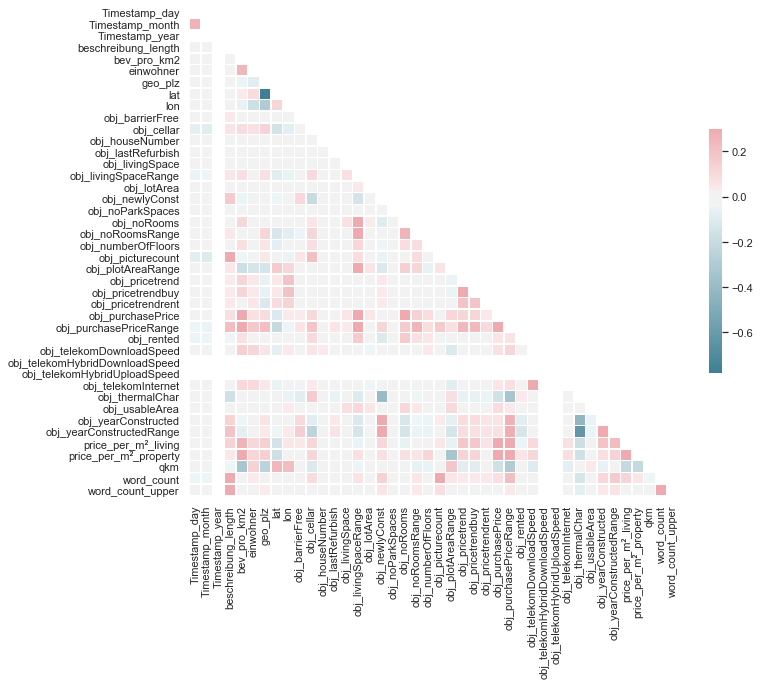

In [326]:
sns.set(font_scale = 0.5)
sns.set(style="white")

# Compute the correlation matrix
corr = Housing_ML.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [327]:
Housing_ML = pd.get_dummies(Housing_ML, columns=['ga_cd_via',
                                                 'ga_cd_via_qualified',
                                                 'geo_bln',
                                                 'geo_krs',
                                                 'obj_ExclusiveExpose',
                                                 'obj_barrierFree',
                                                 'obj_buildingType',
                                                 'obj_cellar',
                                                 'obj_condition',
                                                 'obj_constructionPhase',
                                                 'obj_courtage',
                                                 'obj_energyEfficiencyClass',
                                                 'obj_energyType',
                                                 'obj_firingTypes',
                                                 'obj_galleryAd',
                                                 'obj_heatingType',
                                                 'obj_interiorQual',
                                                 'obj_newlyConst',
                                                 'obj_rented',
                                                 'obj_streetPlain'])
Housing_ML.head()  

Timestamp_day  Timestamp_month  Timestamp_year  beschreibung_length  \
0  None              6                9            2019                 1948   
1  None              6                9            2019                 3166   
2  None              6                9            2019                 1838   
3  None              6                9            2019                 3334   
4  None              6                9            2019                 1930   

   bev_pro_km2  einwohner  geo_plz   lat   lon  ...  \
0       323.38   13891.00    86836 48.16 10.81  ...   
1      1031.56   18370.00    40670 51.27  6.66  ...   
2       405.96   49737.00    52525 51.05  6.07  ...   
3       978.19   17652.00    41468 51.18  6.74  ...   
4       382.58   13630.00    66540 49.35  7.18  ...   

   obj_streetPlain_Über_den_Höfen_  obj_streetPlain_Über_der_Mühle  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   obj_streetPlain_Überm_Hof  obj_streetPlain_Überm_Weiher  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   obj_streetPlain_Überscheid  obj_streetPlain_Überwasserstr.  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   obj_streetPlain_Ückendorfer_Straße  obj_streetPlain_Ückendorferstr  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   obj_streetPlain_Ümminger_Straße  obj_streetPlain_„An_der_Mönch_Hof_Sod“  
0                                0                                       0  
1                                0                                       0  
2                                0                                       0  
3                                0                                       0  
4                                0                                       0  

[5 rows x 12540 columns]

In [ ]:
Housing_ML.info(verbose=True)

In [329]:
Housing_ML = Housing_ML.fillna(0)

In [330]:
x = Housing_ML[Housing_ML.columns.difference(['obj_purchasePrice','obj_purchasePriceRange','price_per_m²_living','price_per_m²_property'])]
y = Housing_ML['obj_purchasePrice'] # Target variable

In [331]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

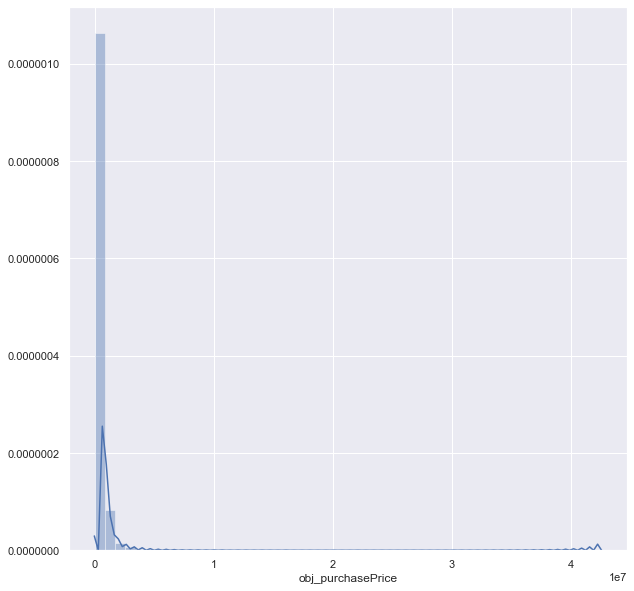

In [334]:
ax = sns.distplot(Housing_ML['obj_purchasePrice'])
sns.set(rc={'figure.figsize':(10,10)})
#plt.xlim(-100,1000000)

## Random Forest

In [335]:
forest = RandomForestRegressor(n_jobs=-1)  # use all cores
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [336]:
forest.score(X_test, y_test)

0.8149175174855076

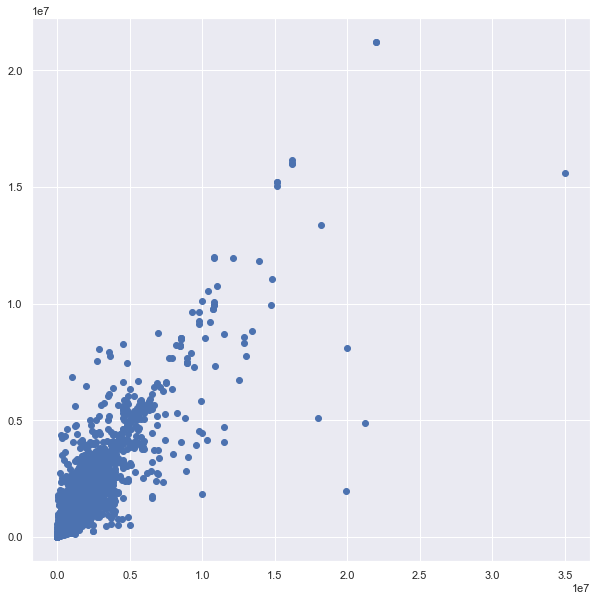

In [337]:
# Make predictions using the testing set
y_pred = forest.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)

In [338]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 95335.74502134051
Mean Squared Error: 83561001671.97635
Root Mean Squared Error: 289069.1987603943


In [339]:
Name = "Random Forest"

for i in range(1):
    Model_Performance= Model_Performance.append(pd.DataFrame([[Name,'Mean Absolute Error',metrics.mean_absolute_error(y_test, y_pred)]], columns=Model_Performance.columns))
    Model_Performance= Model_Performance.append(pd.DataFrame([[Name,'Mean Squared Error',metrics.mean_squared_error(y_test, y_pred)]], columns=Model_Performance.columns))
    Model_Performance= Model_Performance.append(pd.DataFrame([[Name,'Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test, y_pred))]], columns=Model_Performance.columns))
    Model_Performance= Model_Performance.append(pd.DataFrame([[Name,'Error Rate',1-(forest.score(X_test, y_test))]], columns=Model_Performance.columns))
    
Model_Performance = Model_Performance.reset_index(drop=True) 
Model_Performance

Model                  Measure          Score
0  Random Forest      Mean Absolute Error       95335.75
1  Random Forest       Mean Squared Error 83561001671.98
2  Random Forest  Root Mean Squared Error      289069.20
3  Random Forest               Error Rate           0.19

<Figure size 1440x720 with 0 Axes>

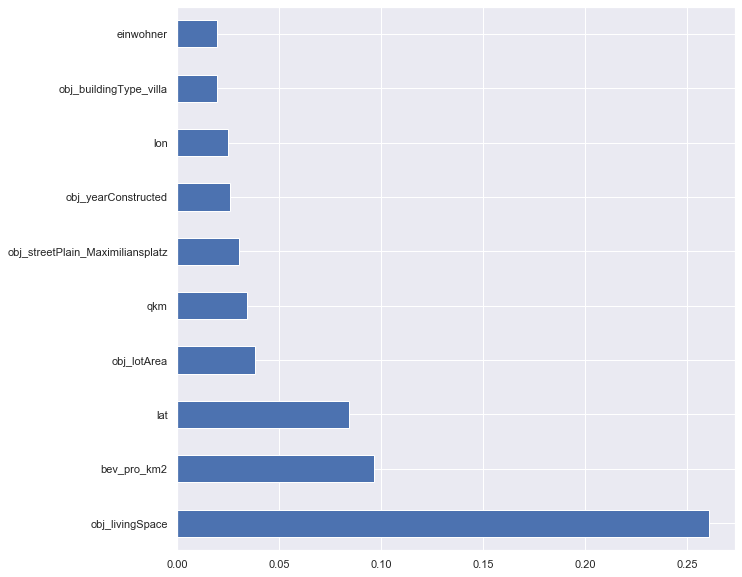

<Figure size 1440x720 with 0 Axes>

In [340]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

feat_importances = pd.Series(forest.feature_importances_, index=X_test.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.figure(figsize=(20,10))

## Add more data

In [286]:
#Taken from www.fa-technik.adfc.de/code/opengeodb/DE.tab - 17th of November 2019
#geo_ags = pd.read_csv("DE.tab",sep="\t")
#geo_split_ags = pd.concat([geo_ags.ags,geo_ags.plz.str.split(",",expand=True)],axis=1)
#geo_split_melt_ags = geo_split_ags.melt(id_vars=["ags"],value_name="plz").drop("variable",axis=1)
#geo_split_melt_ags = geo_split_melt_ags.loc[geo_split_melt_ags.plz.isnull()==0]
#geo_split_melt_ags = geo_split_melt_ags.loc[geo_split_melt_ags.plz!=""]
#geo_split_melt_ags.plz = geo_split_melt_ags.plz.astype(int)
#geo_split_melt_ags.plz = geo_split_melt_ags.plz.astype(str)
#geo_split_melt_ags.ags = geo_split_melt_ags.ags.astype(str)
#geo_split_melt_ags.ags = [w[:8] for w in geo_split_melt_ags.ags]
#geo_split_melt_grouped_ags = geo_split_melt_ags.drop_duplicates(subset=['plz', 'ags'])
#df_full = pd.merge(df_full, geo_split_melt_grouped_ags[["plz","ags"]],left_on="geo_plz",right_on="plz")